In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [3]:
pwd = os.getcwd() # Current directory

In [4]:
df = pd.read_csv(pwd+'/Encoded_dataset/df_encoded_Jsc.csv') # Loading encoded dataset for Jsc
print(df.shape) # Print shape of the dataframe
df.head()

(26457, 30)


Cell_architecture  Cell_flexible  Cell_semitransparent  \
0          18.602188              0                     0   
1          17.917749              0                     0   
2          18.602188              0                     0   
3          18.602188              0                     0   
4          18.602188              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                 18.410445           18.297473          370.0   
1                 18.455145           19.631051          279.6   
2                 18.410445           18.013051          480.0   
3                 18.455145           18.525106          279.6   
4                 18.410445           18.013051          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                 19.512870                        0   
1                 18.271921                        0   
2                 18.304941                        0   
3                 18.494272                        0   
4                 18.304941                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_thermal_annealing_temperature  \
0                                          18.562972     
1                                          19.782775     
2                                          16.893973     
3                                          18.637209     
4                                          11.802628     

   Perovskite_deposition_thermal_annealing_time  \
0                                     18.155324   
1                                     19.386968   
2                                     16.617931   
3                                     18.371850   
4                                     15.885777   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0           18.828537   
1                                        0           19.323493   
2                                        0           15.818751   
3                                        0           18.828537   
4                                        0           18.828537   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                 18.377828                   18.710466   
1                34.0                 18.377828                   18.584480   
2               218.0                 17.257697                   18.710466   
3                34.0                 18.377828                   18.584480   
4                20.0                 18.377828                   18.710466   

   Backcontact_thickness_list  Backcontact_deposition_procedure  \
0                        80.0                         18.510001   
1                       100.0                         18.510001   
2                        50.0                         18.510001   
3                       100.0                         18.510001   
4                        80.0                         18.510001   

   JV_default_Jsc  
0          18.600  
1          21.330  
2          15.300  
3          19.830  
4          11.296  

[5 rows x 30 columns]

In [5]:
X = df.iloc[:,:-1] # Features
y = df['JV_default_Jsc'] # Target Variable

In [6]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0          18.602188              0                     0   
1          17.917749              0                     0   
2          18.602188              0                     0   
3          18.602188              0                     0   
4          18.602188              0                     0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                 18.410445           18.297473          370.0   
1                 18.455145           19.631051          279.6   
2                 18.410445           18.013051          480.0   
3                 18.455145           18.525106          279.6   
4                 18.410445           18.013051          230.0   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                 19.512870                        0   
1                 18.271921                        0   
2                 18.304941                        0   
3                 18.494272                        0   
4                 18.304941                        1   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                  0                        1  ...   
1                                  0                        1  ...   
2                                  0                        1  ...   
3                                  0                        1  ...   
4                                  0                        0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                  0         
1                                                  1         
2                                                  0         
3                                                  1         
4                                                  0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                          18.562972     
1                                          19.782775     
2                                          16.893973     
3                                          18.637209     
4                                          11.802628     

   Perovskite_deposition_thermal_annealing_time  \
0                                     18.155324   
1                                     19.386968   
2                                     16.617931   
3                                     18.371850   
4                                     15.885777   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                        0           18.828537   
1                                        0           19.323493   
2                                        0           15.818751   
3                                        0           18.828537   
4                                        0           18.828537   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0               148.0                 18.377828                   18.710466   
1                34.0                 18.377828                   18.584480   
2               218.0                 17.257697                   18.710466   
3                34.0                 18.377828                   18.584480   
4                20.0                 18.377828                   18.710466   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                        80.0                         18.510001  
1                       100.0                         18.510001  
2                        50.0                         18.510001  
3                       100.0                         18.510001  
4                        80.0                         18.510001  

[5 rows x 29 columns]

In [7]:
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns]) # Scaling the features

In [8]:
X.head()

Cell_architecture  Cell_flexible  Cell_semitransparent  \
0           1.000000            0.0                   0.0   
1           0.895048            0.0                   0.0   
2           1.000000            0.0                   0.0   
3           1.000000            0.0                   0.0   
4           1.000000            0.0                   0.0   

   Substrate_stack_sequence  ETL_stack_sequence  ETL_thickness  \
0                  0.884225            0.703581       0.014780   
1                  0.891381            0.821126       0.011164   
2                  0.884225            0.678511       0.019180   
3                  0.891381            0.723645       0.011164   
4                  0.884225            0.678511       0.009180   

   ETL_deposition_procedure  Perovskite_dimension_2D  \
0                  0.816280                      0.0   
1                  0.677019                      0.0   
2                  0.680725                      0.0   
3                  0.701972                      0.0   
4                  0.680725                      1.0   

   Perovskite_dimension_2D3D_mixture  Perovskite_dimension_3D  ...  \
0                                0.0                      1.0  ...   
1                                0.0                      1.0  ...   
2                                0.0                      1.0  ...   
3                                0.0                      1.0  ...   
4                                0.0                      0.0  ...   

   Perovskite_deposition_quenching_induced_crystallisation  \
0                                                0.0         
1                                                1.0         
2                                                0.0         
3                                                1.0         
4                                                0.0         

   Perovskite_deposition_thermal_annealing_temperature  \
0                                           0.717652     
1                                           0.812388     
2                                           0.588029     
3                                           0.723418     
4                                           0.192611     

   Perovskite_deposition_thermal_annealing_time  \
0                                      0.610384   
1                                      0.716385   
2                                      0.478070   
3                                      0.629019   
4                                      0.415057   

   Perovskite_deposition_solvent_annealing  HTL_stack_sequence  \
0                                      0.0            0.757915   
1                                      0.0            0.803935   
2                                      0.0            0.478067   
3                                      0.0            0.757915   
4                                      0.0            0.757915   

   HTL_thickness_list  HTL_deposition_procedure  Backcontact_stack_sequence  \
0             0.00588                  0.746133                    0.658330   
1             0.00132                  0.746133                    0.641505   
2             0.00868                  0.584975                    0.658330   
3             0.00132                  0.746133                    0.641505   
4             0.00076                  0.746133                    0.658330   

   Backcontact_thickness_list  Backcontact_deposition_procedure  
0                    0.000650                          0.810821  
1                    0.000817                          0.810821  
2                    0.000400                          0.810821  
3                    0.000817                          0.810821  
4                    0.000650                          0.810821  

[5 rows x 29 columns]

In [9]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Test-train split

In [10]:
def parity_plot(predicted_train, predicted_test, y_train, y_test):
    """ Draw parity plot """
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y_train, predicted_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.scatter(y_test, predicted_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual Jsc $(mA/cm^2)$')
    plt.ylabel('Predicted Jsc $(mA/cm^2)$')
    plt.legend(loc='upper left')
    return plt.show()

In [11]:
def model_builder(model_name, y_train, y_test):
    model_name.fit(X_train, y_train)
    y_pred_train = model_name.predict(X_train)
    y_pred_test = model_name.predict(X_test)

    
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
    print("The mean absolute error (MAE) on test set: {:.4f}".format(mae))

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print("r2 on train set: {:.4f}".format(r2_train))
    print("r2 on test set: {:.4f}".format(r2_test))
    parity_plot(y_pred_train, y_pred_test, y_train, y_test)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
The mean squared error (MSE) on test set: 10.7510
The root mean squared error (RMSE) on test set: 3.2789
The mean absolute error (MAE) on test set: 1.7964
r2 on train set: 0.8683
r2 on test set: 0.6320


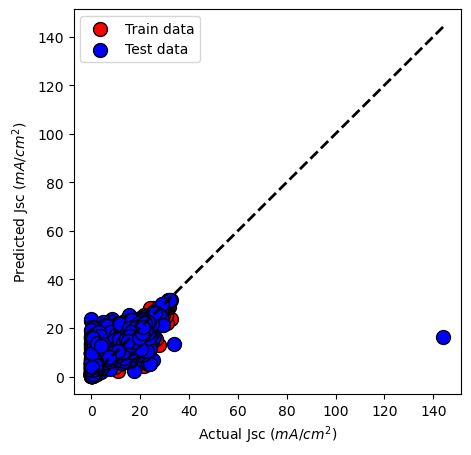

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=0)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] # Warning - 'max_features' 'auto' is deprecated. 
}

# Define the search object
search = RandomizedSearchCV(rf, param_grid, cv=5, n_iter=50, n_jobs=-1, random_state=42)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_rf = search.best_estimator_



model_builder(best_rf, y_train, y_test)

Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
The mean squared error (MSE) on test set: 11.0072
The root mean squared error (RMSE) on test set: 3.3177
The mean absolute error (MAE) on test set: 1.8414
r2 on train set: 0.8408
r2 on test set: 0.6232


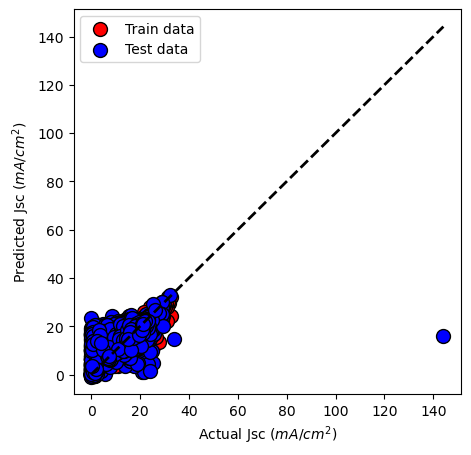

In [13]:
import xgboost as xgb

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the model
xgb = xgb.XGBRegressor(random_state = 42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Define the search object
search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')


# Get the best model
best_xgb = search.best_estimator_



model_builder(best_xgb, y_train, y_test)

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Best parameters: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}


/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


The mean squared error (MSE) on test set: 11.1764
The root mean squared error (RMSE) on test set: 3.3431
The mean absolute error (MAE) on test set: 1.8621
r2 on train set: 0.8413
r2 on test set: 0.6174


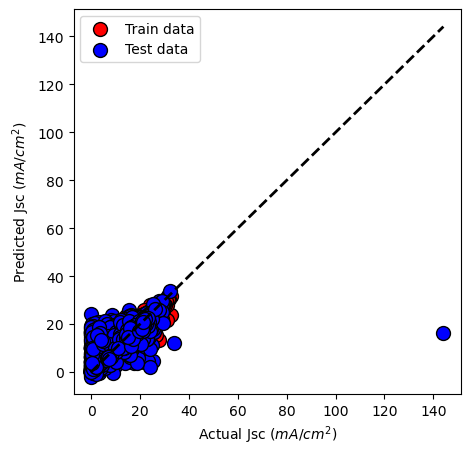

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.75, 1.0],
    'loss': ['ls', 'lad', 'huber'] 
    
    # warning 'loss' - 'ls' --> 'squared_error', 'lad' --> 'absolute_error',
    # 'loss': ['squared_error','absolute_error','huber']
}

# Define the search object
search = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_gbr = search.best_estimator_



model_builder(best_gbr, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
The mean squared error (MSE) on test set: 13.5659
The root mean squared error (RMSE) on test set: 3.6832
The mean absolute error (MAE) on test set: 2.0937
r2 on train set: 0.7974
r2 on test set: 0.5356


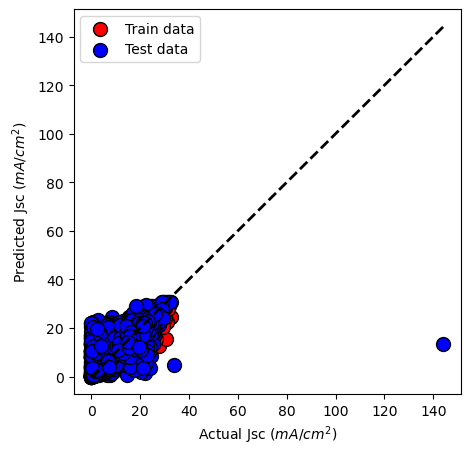

In [15]:
from sklearn.tree import DecisionTreeRegressor


# Define the model
dt = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_dt = search.best_estimator_



model_builder(best_dt, y_train, y_test)

Best parameters: {'C': 100, 'degree': 5, 'epsilon': 0.3, 'kernel': 'poly'}


/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/minic

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/minic

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/minicon

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:297: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  FutureWarning,
/home/rumman/min

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,
/home/rumman/miniconda3/

The mean squared error (MSE) on test set: 16.2045
The root mean squared error (RMSE) on test set: 4.0255
The mean absolute error (MAE) on test set: 2.3862
r2 on train set: 0.4979
r2 on test set: 0.4453


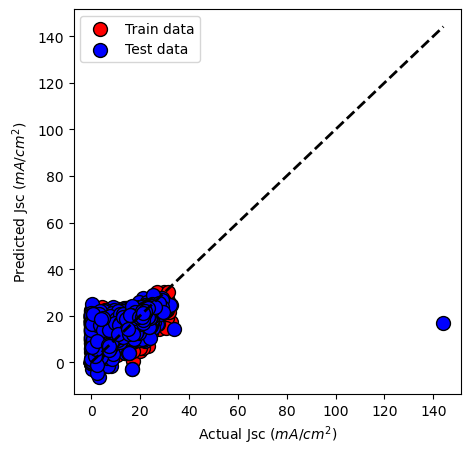

In [16]:
from sklearn.svm import SVR


# Define the model
svr = SVR()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5]
}

# Define the search object
search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_svr = search.best_estimator_




model_builder(best_svr, y_train, y_test)

Best parameters: {'bootstrap': True, 'max_features': 0.75, 'max_samples': 1.0, 'n_estimators': 40}
The mean squared error (MSE) on test set: 10.8357
The root mean squared error (RMSE) on test set: 3.2918
The mean absolute error (MAE) on test set: 1.8296
r2 on train set: 0.8560
r2 on test set: 0.6291


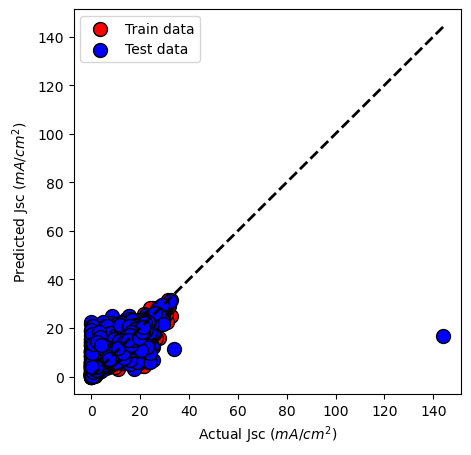

In [17]:
from sklearn.ensemble import BaggingRegressor


# Define the model
br = BaggingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False]
}

# Define the search object
search = GridSearchCV(br, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_br = search.best_estimator_




model_builder(best_br, y_train, y_test)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 40}
The mean squared error (MSE) on test set: 10.7368
The root mean squared error (RMSE) on test set: 3.2767
The mean absolute error (MAE) on test set: 1.7967
r2 on train set: 0.8508
r2 on test set: 0.6325


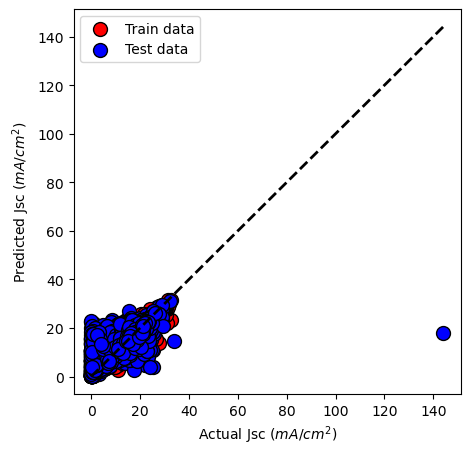

In [18]:
from sklearn.ensemble import ExtraTreesRegressor


# Define the model
et = ExtraTreesRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40],
    'max_depth': [None, 3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the search object
search = GridSearchCV(et, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_et = search.best_estimator_



model_builder(best_et, y_train, y_test)


Best parameters: {'alpha': 1, 'solver': 'lsqr'}
The mean squared error (MSE) on test set: 17.4993
The root mean squared error (RMSE) on test set: 4.1832
The mean absolute error (MAE) on test set: 2.7950
r2 on train set: 0.4079
r2 on test set: 0.4010


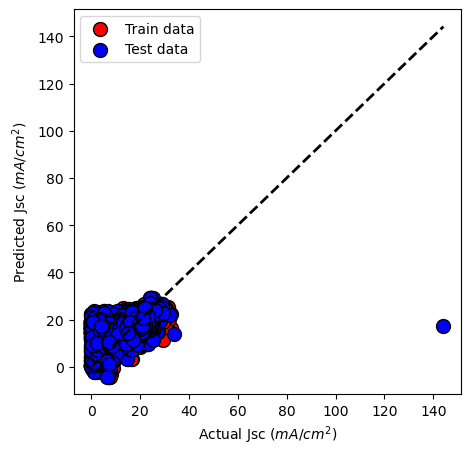

In [19]:
from sklearn.linear_model import Ridge


# Define the model
ridge = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Define the search object
search = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_ridge = search.best_estimator_


model_builder(best_ridge, y_train, y_test)

Best parameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
The mean squared error (MSE) on test set: 12.3197
The root mean squared error (RMSE) on test set: 3.5099
The mean absolute error (MAE) on test set: 1.9256
r2 on train set: 0.8878
r2 on test set: 0.5783


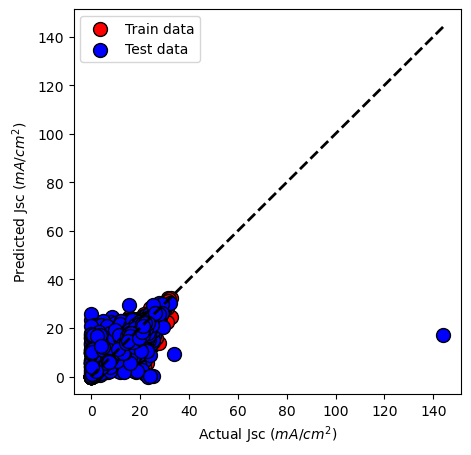

In [20]:
from sklearn.neighbors import KNeighborsRegressor


# Define the model
knr = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

# Define the search object
search = GridSearchCV(knr, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_knr = search.best_estimator_


model_builder(best_knr, y_train, y_test)

0:	learn: 5.1061089	total: 57.2ms	remaining: 5.67s
1:	learn: 4.9663294	total: 165ms	remaining: 8.09s
2:	learn: 4.8495707	total: 167ms	remaining: 5.41s
3:	learn: 4.7425619	total: 211ms	remaining: 5.07s
4:	learn: 4.6588476	total: 218ms	remaining: 4.15s
5:	learn: 4.5799130	total: 255ms	remaining: 4s
6:	learn: 4.5158117	total: 257ms	remaining: 3.41s
7:	learn: 4.4557247	total: 300ms	remaining: 3.44s
8:	learn: 4.4031251	total: 355ms	remaining: 3.59s
9:	learn: 4.3549914	total: 401ms	remaining: 3.61s
10:	learn: 4.3144600	total: 403ms	remaining: 3.26s
11:	learn: 4.2813618	total: 407ms	remaining: 2.99s
12:	learn: 4.2515794	total: 417ms	remaining: 2.79s
13:	learn: 4.2221657	total: 465ms	remaining: 2.85s
14:	learn: 4.1980793	total: 468ms	remaining: 2.65s
15:	learn: 4.1740348	total: 566ms	remaining: 2.97s
16:	learn: 4.1547048	total: 745ms	remaining: 3.64s
17:	learn: 4.1359693	total: 750ms	remaining: 3.42s
18:	learn: 4.1203757	total: 851ms	remaining: 3.63s
19:	learn: 4.1043094	total: 1.04s	remaining

0:	learn: 5.1122844	total: 51.1ms	remaining: 5.06s
1:	learn: 4.9654041	total: 90ms	remaining: 4.41s
2:	learn: 4.8435483	total: 92ms	remaining: 2.97s
3:	learn: 4.7327239	total: 108ms	remaining: 2.6s
4:	learn: 4.6451587	total: 110ms	remaining: 2.09s
5:	learn: 4.5626529	total: 192ms	remaining: 3.01s
6:	learn: 4.4935549	total: 195ms	remaining: 2.59s
7:	learn: 4.4319136	total: 283ms	remaining: 3.25s
8:	learn: 4.3787990	total: 322ms	remaining: 3.25s
9:	learn: 4.3306177	total: 333ms	remaining: 3s
10:	learn: 4.2876444	total: 524ms	remaining: 4.24s
11:	learn: 4.2518905	total: 526ms	remaining: 3.85s
12:	learn: 4.2194968	total: 528ms	remaining: 3.53s
13:	learn: 4.1907351	total: 544ms	remaining: 3.34s
14:	learn: 4.1647474	total: 546ms	remaining: 3.09s
15:	learn: 4.1389379	total: 560ms	remaining: 2.94s
16:	learn: 4.1173202	total: 564ms	remaining: 2.75s
17:	learn: 4.0979697	total: 568ms	remaining: 2.59s
18:	learn: 4.0803905	total: 668ms	remaining: 2.85s
19:	learn: 4.0630480	total: 670ms	remaining: 2

0:	learn: 5.1083896	total: 48.3ms	remaining: 4.78s
1:	learn: 4.9650946	total: 53.4ms	remaining: 2.61s
2:	learn: 4.8440290	total: 59.5ms	remaining: 1.92s
3:	learn: 4.7337655	total: 61.3ms	remaining: 1.47s
4:	learn: 4.6468587	total: 72.1ms	remaining: 1.37s
5:	learn: 4.5721094	total: 134ms	remaining: 2.1s
6:	learn: 4.5049041	total: 144ms	remaining: 1.91s
7:	learn: 4.4418099	total: 145ms	remaining: 1.67s
8:	learn: 4.3909939	total: 147ms	remaining: 1.49s
9:	learn: 4.3424715	total: 261ms	remaining: 2.35s
10:	learn: 4.3031536	total: 268ms	remaining: 2.17s
11:	learn: 4.2669454	total: 270ms	remaining: 1.98s
12:	learn: 4.2319908	total: 277ms	remaining: 1.85s
13:	learn: 4.2017300	total: 280ms	remaining: 1.72s
14:	learn: 4.1753881	total: 403ms	remaining: 2.28s
15:	learn: 4.1501925	total: 406ms	remaining: 2.13s
16:	learn: 4.1265575	total: 494ms	remaining: 2.41s
17:	learn: 4.1055262	total: 561ms	remaining: 2.56s
18:	learn: 4.0877535	total: 565ms	remaining: 2.41s
19:	learn: 4.0706893	total: 566ms	rem

0:	learn: 4.8443396	total: 74ms	remaining: 7.32s
1:	learn: 4.5652450	total: 75.9ms	remaining: 3.72s
2:	learn: 4.3867752	total: 77.6ms	remaining: 2.51s
3:	learn: 4.2686828	total: 89.1ms	remaining: 2.14s
4:	learn: 4.1850965	total: 133ms	remaining: 2.52s
5:	learn: 4.1257113	total: 135ms	remaining: 2.11s
6:	learn: 4.0755672	total: 180ms	remaining: 2.4s
7:	learn: 4.0369255	total: 184ms	remaining: 2.11s
8:	learn: 4.0039318	total: 196ms	remaining: 1.98s
9:	learn: 3.9727726	total: 199ms	remaining: 1.79s
10:	learn: 3.9491189	total: 296ms	remaining: 2.39s
11:	learn: 3.9274337	total: 380ms	remaining: 2.79s
12:	learn: 3.9110188	total: 411ms	remaining: 2.75s
13:	learn: 3.8951915	total: 415ms	remaining: 2.55s
14:	learn: 3.8798762	total: 450ms	remaining: 2.55s
15:	learn: 3.8647051	total: 582ms	remaining: 3.06s
16:	learn: 3.8543800	total: 663ms	remaining: 3.24s
17:	learn: 3.8457900	total: 665ms	remaining: 3.03s
18:	learn: 3.8319071	total: 709ms	remaining: 3.02s
19:	learn: 3.8238052	total: 761ms	remain

0:	learn: 4.8276559	total: 61.9ms	remaining: 6.12s
1:	learn: 4.5463480	total: 68.3ms	remaining: 3.35s
2:	learn: 4.3775935	total: 150ms	remaining: 4.85s
3:	learn: 4.2615500	total: 243ms	remaining: 5.82s
4:	learn: 4.1892126	total: 345ms	remaining: 6.55s
5:	learn: 4.1217971	total: 396ms	remaining: 6.2s
6:	learn: 4.0700121	total: 399ms	remaining: 5.29s
7:	learn: 4.0318911	total: 489ms	remaining: 5.62s
8:	learn: 3.9990791	total: 493ms	remaining: 4.99s
9:	learn: 3.9731556	total: 503ms	remaining: 4.52s
10:	learn: 3.9498308	total: 505ms	remaining: 4.09s
11:	learn: 3.9332088	total: 631ms	remaining: 4.63s
12:	learn: 3.9156345	total: 704ms	remaining: 4.71s
13:	learn: 3.9025017	total: 769ms	remaining: 4.72s
14:	learn: 3.8927948	total: 921ms	remaining: 5.22s
15:	learn: 3.8811054	total: 925ms	remaining: 4.85s
16:	learn: 3.8701037	total: 988ms	remaining: 4.83s
17:	learn: 3.8597392	total: 992ms	remaining: 4.52s
18:	learn: 3.8510383	total: 995ms	remaining: 4.24s
19:	learn: 3.8390832	total: 1.04s	remain

0:	learn: 3.3318133	total: 121ms	remaining: 12s
1:	learn: 3.1733556	total: 166ms	remaining: 8.12s
2:	learn: 2.9810818	total: 300ms	remaining: 9.69s
3:	learn: 2.8876006	total: 302ms	remaining: 7.25s
4:	learn: 2.8142627	total: 515ms	remaining: 9.78s
5:	learn: 2.7654218	total: 714ms	remaining: 11.2s
6:	learn: 2.7301818	total: 717ms	remaining: 9.52s
7:	learn: 2.6870419	total: 720ms	remaining: 8.28s
8:	learn: 2.6581366	total: 1.03s	remaining: 10.4s
9:	learn: 2.6307071	total: 1.03s	remaining: 9.32s
10:	learn: 2.6156736	total: 1.05s	remaining: 8.53s
11:	learn: 2.6005616	total: 1.06s	remaining: 7.79s
12:	learn: 2.5868496	total: 1.19s	remaining: 7.93s
13:	learn: 2.5737963	total: 1.19s	remaining: 7.31s
14:	learn: 2.5645265	total: 1.31s	remaining: 7.41s
15:	learn: 2.5547966	total: 1.31s	remaining: 6.89s
16:	learn: 2.5474716	total: 1.36s	remaining: 6.67s
17:	learn: 2.5422493	total: 1.47s	remaining: 6.71s
18:	learn: 2.5359481	total: 1.52s	remaining: 6.47s
19:	learn: 2.5270724	total: 1.55s	remaining

0:	learn: 3.5492417	total: 48.2ms	remaining: 4.78s
1:	learn: 3.4759749	total: 50.8ms	remaining: 2.49s
2:	learn: 3.3833727	total: 61.8ms	remaining: 2s
3:	learn: 3.3021664	total: 65.9ms	remaining: 1.58s
4:	learn: 3.2164264	total: 135ms	remaining: 2.57s
5:	learn: 3.1582387	total: 188ms	remaining: 2.95s
6:	learn: 3.1173517	total: 247ms	remaining: 3.29s
7:	learn: 3.0573523	total: 250ms	remaining: 2.87s
8:	learn: 3.0082212	total: 497ms	remaining: 5.03s
9:	learn: 2.9796277	total: 502ms	remaining: 4.51s
10:	learn: 2.9372355	total: 576ms	remaining: 4.66s
11:	learn: 2.9009525	total: 836ms	remaining: 6.13s
12:	learn: 2.8758069	total: 840ms	remaining: 5.62s
13:	learn: 2.8485523	total: 944ms	remaining: 5.8s
14:	learn: 2.8331378	total: 1.05s	remaining: 5.96s
15:	learn: 2.8136164	total: 1.05s	remaining: 5.54s
16:	learn: 2.7968624	total: 1.15s	remaining: 5.6s
17:	learn: 2.7854281	total: 1.15s	remaining: 5.24s
18:	learn: 2.7707643	total: 1.25s	remaining: 5.34s
19:	learn: 2.7560057	total: 1.26s	remainin

0:	learn: 3.5609932	total: 52.2ms	remaining: 5.16s
1:	learn: 3.4429464	total: 67.2ms	remaining: 3.29s
2:	learn: 3.3550813	total: 88.3ms	remaining: 2.86s
3:	learn: 3.2786935	total: 196ms	remaining: 4.71s
4:	learn: 3.1977135	total: 308ms	remaining: 5.86s
5:	learn: 3.1416354	total: 345ms	remaining: 5.4s
6:	learn: 3.0984380	total: 431ms	remaining: 5.72s
7:	learn: 3.0429635	total: 554ms	remaining: 6.37s
8:	learn: 2.9986182	total: 558ms	remaining: 5.64s
9:	learn: 2.9555166	total: 661ms	remaining: 5.95s
10:	learn: 2.9255531	total: 665ms	remaining: 5.38s
11:	learn: 2.8967908	total: 704ms	remaining: 5.16s
12:	learn: 2.8723476	total: 827ms	remaining: 5.53s
13:	learn: 2.8521875	total: 1.01s	remaining: 6.18s
14:	learn: 2.8364819	total: 1.1s	remaining: 6.27s
15:	learn: 2.8213035	total: 1.11s	remaining: 5.82s
16:	learn: 2.8037752	total: 1.18s	remaining: 5.75s
17:	learn: 2.7895775	total: 1.26s	remaining: 5.77s
18:	learn: 2.7746801	total: 1.27s	remaining: 5.41s
19:	learn: 2.7554056	total: 1.27s	remain

62:	learn: 2.3478251	total: 2.22s	remaining: 1.3s
63:	learn: 2.3417919	total: 2.27s	remaining: 1.28s
64:	learn: 2.3399219	total: 2.28s	remaining: 1.23s
65:	learn: 2.3370184	total: 2.36s	remaining: 1.21s
66:	learn: 2.3364695	total: 2.39s	remaining: 1.18s
67:	learn: 2.3344691	total: 2.44s	remaining: 1.15s
68:	learn: 2.3326910	total: 2.44s	remaining: 1.1s
69:	learn: 2.3316832	total: 2.53s	remaining: 1.08s
70:	learn: 2.3301298	total: 2.6s	remaining: 1.06s
71:	learn: 2.3293068	total: 2.62s	remaining: 1.02s
72:	learn: 2.3271211	total: 2.62s	remaining: 969ms
73:	learn: 2.3251627	total: 2.81s	remaining: 987ms
74:	learn: 2.3246819	total: 2.89s	remaining: 964ms
75:	learn: 2.3228518	total: 2.94s	remaining: 930ms
76:	learn: 2.3168202	total: 3.04s	remaining: 907ms
77:	learn: 2.3150430	total: 3.1s	remaining: 874ms
78:	learn: 2.3134887	total: 3.17s	remaining: 843ms
79:	learn: 2.3121176	total: 3.17s	remaining: 794ms
80:	learn: 2.3111249	total: 3.25s	remaining: 762ms
81:	learn: 2.3085940	total: 3.25s	r

62:	learn: 2.2957919	total: 2.88s	remaining: 1.69s
63:	learn: 2.2942264	total: 2.89s	remaining: 1.63s
64:	learn: 2.2932744	total: 3.02s	remaining: 1.63s
65:	learn: 2.2896978	total: 3.08s	remaining: 1.59s
66:	learn: 2.2785791	total: 3.13s	remaining: 1.54s
67:	learn: 2.2748415	total: 3.13s	remaining: 1.47s
68:	learn: 2.2738567	total: 3.13s	remaining: 1.41s
69:	learn: 2.2716741	total: 3.23s	remaining: 1.38s
70:	learn: 2.2672318	total: 3.23s	remaining: 1.32s
71:	learn: 2.2657410	total: 3.27s	remaining: 1.27s
72:	learn: 2.2652470	total: 3.33s	remaining: 1.23s
73:	learn: 2.2642061	total: 3.33s	remaining: 1.17s
74:	learn: 2.2620970	total: 3.41s	remaining: 1.14s
75:	learn: 2.2607371	total: 3.47s	remaining: 1.09s
76:	learn: 2.2591232	total: 3.47s	remaining: 1.04s
77:	learn: 2.2572791	total: 3.47s	remaining: 980ms
78:	learn: 2.2567129	total: 3.48s	remaining: 924ms
79:	learn: 2.2549671	total: 3.48s	remaining: 870ms
80:	learn: 2.2523696	total: 3.52s	remaining: 825ms
81:	learn: 2.2506788	total: 3.5

62:	learn: 2.2783320	total: 3.31s	remaining: 1.95s
63:	learn: 2.2752275	total: 3.38s	remaining: 1.9s
64:	learn: 2.2724821	total: 3.38s	remaining: 1.82s
65:	learn: 2.2704671	total: 3.43s	remaining: 1.76s
66:	learn: 2.2686626	total: 3.44s	remaining: 1.69s
67:	learn: 2.2683155	total: 3.44s	remaining: 1.62s
68:	learn: 2.2654100	total: 3.45s	remaining: 1.55s
69:	learn: 2.2632299	total: 3.56s	remaining: 1.52s
70:	learn: 2.2621309	total: 3.58s	remaining: 1.46s
71:	learn: 2.2580562	total: 3.7s	remaining: 1.44s
72:	learn: 2.2560119	total: 3.71s	remaining: 1.37s
73:	learn: 2.2541885	total: 3.79s	remaining: 1.33s
74:	learn: 2.2522677	total: 3.86s	remaining: 1.29s
75:	learn: 2.2515824	total: 3.86s	remaining: 1.22s
76:	learn: 2.2498791	total: 3.87s	remaining: 1.16s
77:	learn: 2.2478007	total: 3.93s	remaining: 1.11s
78:	learn: 2.2473962	total: 3.98s	remaining: 1.06s
79:	learn: 2.2466324	total: 4.06s	remaining: 1.01s
80:	learn: 2.2445924	total: 4.06s	remaining: 953ms
81:	learn: 2.2428471	total: 4.07s

62:	learn: 2.3312034	total: 3.41s	remaining: 2s
63:	learn: 2.3278963	total: 3.59s	remaining: 2.02s
64:	learn: 2.3243830	total: 3.65s	remaining: 1.96s
65:	learn: 2.3224993	total: 3.74s	remaining: 1.93s
66:	learn: 2.3215118	total: 3.77s	remaining: 1.85s
67:	learn: 2.3202699	total: 3.93s	remaining: 1.85s
68:	learn: 2.3179241	total: 3.94s	remaining: 1.77s
69:	learn: 2.3159274	total: 4.04s	remaining: 1.73s
70:	learn: 2.3143719	total: 4.06s	remaining: 1.66s
71:	learn: 2.3139569	total: 4.09s	remaining: 1.59s
72:	learn: 2.3124830	total: 4.17s	remaining: 1.54s
73:	learn: 2.3117857	total: 4.23s	remaining: 1.49s
74:	learn: 2.3103797	total: 4.23s	remaining: 1.41s
75:	learn: 2.3097960	total: 4.28s	remaining: 1.35s
76:	learn: 2.3065218	total: 4.31s	remaining: 1.29s
77:	learn: 2.3044075	total: 4.4s	remaining: 1.24s
78:	learn: 2.3018444	total: 4.4s	remaining: 1.17s
79:	learn: 2.3009165	total: 4.48s	remaining: 1.12s
80:	learn: 2.2992848	total: 4.59s	remaining: 1.08s
81:	learn: 2.2972070	total: 4.73s	re

62:	learn: 3.4848440	total: 2.42s	remaining: 1.42s
63:	learn: 3.4820562	total: 2.48s	remaining: 1.39s
64:	learn: 3.4765611	total: 2.52s	remaining: 1.36s
65:	learn: 3.4721745	total: 2.53s	remaining: 1.3s
66:	learn: 3.4680927	total: 2.53s	remaining: 1.25s
67:	learn: 3.4657009	total: 2.61s	remaining: 1.23s
68:	learn: 3.4593789	total: 2.62s	remaining: 1.18s
69:	learn: 3.4567313	total: 2.69s	remaining: 1.15s
70:	learn: 3.4555332	total: 2.69s	remaining: 1.1s
71:	learn: 3.4533128	total: 2.7s	remaining: 1.05s
72:	learn: 3.4519881	total: 2.81s	remaining: 1.04s
73:	learn: 3.4481298	total: 2.82s	remaining: 991ms
74:	learn: 3.4458273	total: 2.85s	remaining: 950ms
75:	learn: 3.4432571	total: 2.93s	remaining: 925ms
76:	learn: 3.4378735	total: 3.01s	remaining: 899ms
77:	learn: 3.4358375	total: 3.09s	remaining: 871ms
78:	learn: 3.4342230	total: 3.1s	remaining: 824ms
79:	learn: 3.4302410	total: 3.21s	remaining: 802ms
80:	learn: 3.4280023	total: 3.21s	remaining: 753ms
81:	learn: 3.4253407	total: 3.29s	r

62:	learn: 2.2851271	total: 3.22s	remaining: 1.89s
63:	learn: 2.2822308	total: 3.27s	remaining: 1.84s
64:	learn: 2.2804862	total: 3.27s	remaining: 1.76s
65:	learn: 2.2781688	total: 3.51s	remaining: 1.81s
66:	learn: 2.2758066	total: 3.53s	remaining: 1.74s
67:	learn: 2.2729201	total: 3.65s	remaining: 1.72s
68:	learn: 2.2717722	total: 3.65s	remaining: 1.64s
69:	learn: 2.2689408	total: 3.67s	remaining: 1.57s
70:	learn: 2.2664094	total: 3.68s	remaining: 1.5s
71:	learn: 2.2643983	total: 3.91s	remaining: 1.52s
72:	learn: 2.2631970	total: 3.94s	remaining: 1.46s
73:	learn: 2.2625120	total: 3.95s	remaining: 1.39s
74:	learn: 2.2599186	total: 4.09s	remaining: 1.36s
75:	learn: 2.2577995	total: 4.14s	remaining: 1.31s
76:	learn: 2.2564666	total: 4.15s	remaining: 1.24s
77:	learn: 2.2530289	total: 4.26s	remaining: 1.2s
78:	learn: 2.2518260	total: 4.32s	remaining: 1.15s
79:	learn: 2.2503058	total: 4.32s	remaining: 1.08s
80:	learn: 2.2499492	total: 4.41s	remaining: 1.03s
81:	learn: 2.2479261	total: 4.41s

62:	learn: 2.3418017	total: 3.31s	remaining: 1.94s
63:	learn: 2.3385404	total: 3.39s	remaining: 1.91s
64:	learn: 2.3355968	total: 3.4s	remaining: 1.83s
65:	learn: 2.3309321	total: 3.4s	remaining: 1.75s
66:	learn: 2.3300183	total: 3.48s	remaining: 1.72s
67:	learn: 2.3285853	total: 3.49s	remaining: 1.64s
68:	learn: 2.3267783	total: 3.61s	remaining: 1.62s
69:	learn: 2.3248619	total: 3.64s	remaining: 1.56s
70:	learn: 2.3211326	total: 3.64s	remaining: 1.49s
71:	learn: 2.3202011	total: 3.64s	remaining: 1.42s
72:	learn: 2.3186581	total: 3.64s	remaining: 1.35s
73:	learn: 2.3183318	total: 3.65s	remaining: 1.28s
74:	learn: 2.3171776	total: 3.65s	remaining: 1.22s
75:	learn: 2.3158647	total: 3.65s	remaining: 1.15s
76:	learn: 2.3109967	total: 3.66s	remaining: 1.09s
77:	learn: 2.3085023	total: 3.76s	remaining: 1.06s
78:	learn: 2.3061529	total: 3.8s	remaining: 1.01s
79:	learn: 2.3040298	total: 3.8s	remaining: 951ms
80:	learn: 2.3006837	total: 3.88s	remaining: 910ms
81:	learn: 2.2984864	total: 3.9s	re

62:	learn: 3.8165483	total: 3.16s	remaining: 6.87s
63:	learn: 3.8137407	total: 3.16s	remaining: 6.72s
64:	learn: 3.8109210	total: 3.17s	remaining: 6.58s
65:	learn: 3.8071864	total: 3.17s	remaining: 6.43s
66:	learn: 3.8053709	total: 3.29s	remaining: 6.53s
67:	learn: 3.8028974	total: 3.29s	remaining: 6.39s
68:	learn: 3.7995612	total: 3.4s	remaining: 6.46s
69:	learn: 3.7945464	total: 3.41s	remaining: 6.33s
70:	learn: 3.7922349	total: 3.42s	remaining: 6.21s
71:	learn: 3.7901268	total: 3.47s	remaining: 6.17s
72:	learn: 3.7877387	total: 3.57s	remaining: 6.21s
73:	learn: 3.7851440	total: 3.62s	remaining: 6.17s
74:	learn: 3.7822503	total: 3.67s	remaining: 6.11s
75:	learn: 3.7805929	total: 3.71s	remaining: 6.06s
76:	learn: 3.7754904	total: 3.71s	remaining: 5.93s
77:	learn: 3.7722322	total: 3.72s	remaining: 5.81s
78:	learn: 3.7698701	total: 3.8s	remaining: 5.82s
79:	learn: 3.7680661	total: 3.9s	remaining: 5.85s
80:	learn: 3.7662661	total: 3.9s	remaining: 5.74s
81:	learn: 3.7646756	total: 4s	rema

62:	learn: 2.2771742	total: 3.16s	remaining: 1.85s
63:	learn: 2.2764461	total: 3.16s	remaining: 1.78s
64:	learn: 2.2726509	total: 3.26s	remaining: 1.76s
65:	learn: 2.2704352	total: 3.3s	remaining: 1.7s
66:	learn: 2.2698323	total: 3.38s	remaining: 1.66s
67:	learn: 2.2677473	total: 3.53s	remaining: 1.66s
68:	learn: 2.2665246	total: 3.53s	remaining: 1.59s
69:	learn: 2.2652905	total: 3.61s	remaining: 1.55s
70:	learn: 2.2643874	total: 3.62s	remaining: 1.48s
71:	learn: 2.2622729	total: 3.77s	remaining: 1.47s
72:	learn: 2.2598249	total: 3.78s	remaining: 1.4s
73:	learn: 2.2573335	total: 3.94s	remaining: 1.39s
74:	learn: 2.2568184	total: 3.95s	remaining: 1.31s
75:	learn: 2.2557826	total: 4.03s	remaining: 1.27s
76:	learn: 2.2548021	total: 4.04s	remaining: 1.21s
77:	learn: 2.2500524	total: 4.14s	remaining: 1.17s
78:	learn: 2.2477689	total: 4.14s	remaining: 1.1s
79:	learn: 2.2466732	total: 4.17s	remaining: 1.04s
80:	learn: 2.2456963	total: 4.2s	remaining: 986ms
81:	learn: 2.2436838	total: 4.24s	re

62:	learn: 2.3753008	total: 2.84s	remaining: 1.67s
63:	learn: 2.3721755	total: 2.95s	remaining: 1.66s
64:	learn: 2.3708682	total: 3.03s	remaining: 1.63s
65:	learn: 2.3690382	total: 3.12s	remaining: 1.61s
66:	learn: 2.3656638	total: 3.22s	remaining: 1.58s
67:	learn: 2.3628540	total: 3.28s	remaining: 1.54s
68:	learn: 2.3613366	total: 3.35s	remaining: 1.51s
69:	learn: 2.3596328	total: 3.46s	remaining: 1.48s
70:	learn: 2.3577002	total: 3.46s	remaining: 1.41s
71:	learn: 2.3568132	total: 3.48s	remaining: 1.35s
72:	learn: 2.3556894	total: 3.48s	remaining: 1.29s
73:	learn: 2.3540210	total: 3.5s	remaining: 1.23s
74:	learn: 2.3528959	total: 3.53s	remaining: 1.18s
75:	learn: 2.3445929	total: 3.65s	remaining: 1.15s
76:	learn: 2.3437716	total: 3.75s	remaining: 1.12s
77:	learn: 2.3415751	total: 3.75s	remaining: 1.06s
78:	learn: 2.3411717	total: 3.83s	remaining: 1.02s
79:	learn: 2.3400644	total: 3.84s	remaining: 959ms
80:	learn: 2.3383639	total: 3.88s	remaining: 910ms
81:	learn: 2.3341987	total: 3.88

22:	learn: 2.4972762	total: 1.05s	remaining: 8.08s
23:	learn: 2.4938122	total: 1.05s	remaining: 7.73s
24:	learn: 2.4889177	total: 1.13s	remaining: 7.88s
25:	learn: 2.4845080	total: 1.13s	remaining: 7.55s
26:	learn: 2.4818412	total: 1.27s	remaining: 8.12s
27:	learn: 2.4794445	total: 1.43s	remaining: 8.77s
28:	learn: 2.4759609	total: 1.43s	remaining: 8.43s
29:	learn: 2.4718244	total: 1.51s	remaining: 8.54s
30:	learn: 2.4684297	total: 1.52s	remaining: 8.27s
31:	learn: 2.4636145	total: 1.6s	remaining: 8.41s
32:	learn: 2.4587412	total: 1.62s	remaining: 8.2s
33:	learn: 2.4545090	total: 1.62s	remaining: 7.93s
34:	learn: 2.4378996	total: 1.68s	remaining: 7.94s
35:	learn: 2.4346842	total: 1.69s	remaining: 7.69s
36:	learn: 2.4319946	total: 1.69s	remaining: 7.45s
37:	learn: 2.4273503	total: 1.9s	remaining: 8.09s
38:	learn: 2.4254600	total: 1.91s	remaining: 7.87s
39:	learn: 2.4227686	total: 2.05s	remaining: 8.22s
40:	learn: 2.4133620	total: 2.06s	remaining: 7.99s
41:	learn: 2.4083859	total: 2.08s	

123:	learn: 3.6368523	total: 4.53s	remaining: 2.78s
124:	learn: 3.6347431	total: 4.64s	remaining: 2.78s
125:	learn: 3.6333317	total: 4.66s	remaining: 2.74s
126:	learn: 3.6318330	total: 4.67s	remaining: 2.68s
127:	learn: 3.6303479	total: 4.67s	remaining: 2.63s
128:	learn: 3.6291234	total: 4.72s	remaining: 2.6s
129:	learn: 3.6262343	total: 4.72s	remaining: 2.54s
130:	learn: 3.6252540	total: 4.9s	remaining: 2.58s
131:	learn: 3.6241558	total: 5.01s	remaining: 2.58s
132:	learn: 3.6229104	total: 5.02s	remaining: 2.53s
133:	learn: 3.6210574	total: 5.14s	remaining: 2.53s
134:	learn: 3.6195519	total: 5.16s	remaining: 2.48s
135:	learn: 3.6176961	total: 5.16s	remaining: 2.43s
136:	learn: 3.6165084	total: 5.21s	remaining: 2.4s
137:	learn: 3.6144800	total: 5.26s	remaining: 2.36s
138:	learn: 3.6135651	total: 5.3s	remaining: 2.32s
139:	learn: 3.6117219	total: 5.42s	remaining: 2.32s
140:	learn: 3.6102234	total: 5.43s	remaining: 2.27s
141:	learn: 3.6095545	total: 5.45s	remaining: 2.23s
142:	learn: 3.60

123:	learn: 3.3905836	total: 4.21s	remaining: 2.58s
124:	learn: 3.3881901	total: 4.41s	remaining: 2.65s
125:	learn: 3.3859728	total: 4.44s	remaining: 2.61s
126:	learn: 3.3847669	total: 4.45s	remaining: 2.56s
127:	learn: 3.3828796	total: 4.5s	remaining: 2.53s
128:	learn: 3.3820084	total: 4.51s	remaining: 2.48s
129:	learn: 3.3807911	total: 4.62s	remaining: 2.48s
130:	learn: 3.3802797	total: 4.62s	remaining: 2.43s
131:	learn: 3.3786488	total: 4.62s	remaining: 2.38s
132:	learn: 3.3768682	total: 4.71s	remaining: 2.37s
133:	learn: 3.3752131	total: 4.75s	remaining: 2.34s
134:	learn: 3.3719962	total: 4.75s	remaining: 2.29s
135:	learn: 3.3702577	total: 4.79s	remaining: 2.25s
136:	learn: 3.3678633	total: 4.79s	remaining: 2.21s
137:	learn: 3.3663836	total: 4.8s	remaining: 2.15s
138:	learn: 3.3648831	total: 4.8s	remaining: 2.11s
139:	learn: 3.3635295	total: 4.88s	remaining: 2.09s
140:	learn: 3.3626074	total: 4.88s	remaining: 2.04s
141:	learn: 3.3594120	total: 4.88s	remaining: 2s
142:	learn: 3.3582

123:	learn: 3.6323668	total: 5.62s	remaining: 3.44s
124:	learn: 3.6311125	total: 5.72s	remaining: 3.43s
125:	learn: 3.6299302	total: 5.72s	remaining: 3.36s
126:	learn: 3.6281371	total: 5.81s	remaining: 3.34s
127:	learn: 3.6268623	total: 5.81s	remaining: 3.27s
128:	learn: 3.6258873	total: 5.99s	remaining: 3.29s
129:	learn: 3.6244114	total: 6.13s	remaining: 3.3s
130:	learn: 3.6228676	total: 6.16s	remaining: 3.25s
131:	learn: 3.6197100	total: 6.18s	remaining: 3.19s
132:	learn: 3.6189468	total: 6.26s	remaining: 3.15s
133:	learn: 3.6174183	total: 6.26s	remaining: 3.08s
134:	learn: 3.6163204	total: 6.68s	remaining: 3.22s
135:	learn: 3.6148032	total: 6.69s	remaining: 3.15s
136:	learn: 3.6140892	total: 6.7s	remaining: 3.08s
137:	learn: 3.6122278	total: 6.71s	remaining: 3.01s
138:	learn: 3.6102965	total: 6.75s	remaining: 2.96s
139:	learn: 3.6074939	total: 6.75s	remaining: 2.89s
140:	learn: 3.6063931	total: 6.85s	remaining: 2.87s
141:	learn: 3.6050420	total: 6.86s	remaining: 2.8s
142:	learn: 3.6

124:	learn: 3.4502775	total: 5.17s	remaining: 3.1s
125:	learn: 3.4478929	total: 5.17s	remaining: 3.04s
126:	learn: 3.4454261	total: 5.2s	remaining: 2.99s
127:	learn: 3.4412130	total: 5.22s	remaining: 2.93s
128:	learn: 3.4392715	total: 5.28s	remaining: 2.9s
129:	learn: 3.4374726	total: 5.29s	remaining: 2.85s
130:	learn: 3.4355815	total: 5.29s	remaining: 2.79s
131:	learn: 3.4333756	total: 5.4s	remaining: 2.78s
132:	learn: 3.4318515	total: 5.4s	remaining: 2.72s
133:	learn: 3.4296756	total: 5.46s	remaining: 2.69s
134:	learn: 3.4276236	total: 5.49s	remaining: 2.64s
135:	learn: 3.4251456	total: 5.49s	remaining: 2.58s
136:	learn: 3.4247465	total: 5.55s	remaining: 2.55s
137:	learn: 3.4233374	total: 5.57s	remaining: 2.5s
138:	learn: 3.4211945	total: 5.63s	remaining: 2.47s
139:	learn: 3.4189661	total: 5.63s	remaining: 2.41s
140:	learn: 3.4168172	total: 5.64s	remaining: 2.36s
141:	learn: 3.4153638	total: 5.75s	remaining: 2.35s
142:	learn: 3.4133289	total: 5.76s	remaining: 2.29s
143:	learn: 3.4125

22:	learn: 2.4943902	total: 1.29s	remaining: 9.97s
23:	learn: 2.4905574	total: 1.3s	remaining: 9.52s
24:	learn: 2.4676021	total: 1.3s	remaining: 9.1s
25:	learn: 2.4638710	total: 1.43s	remaining: 9.56s
26:	learn: 2.4621059	total: 1.44s	remaining: 9.25s
27:	learn: 2.4569356	total: 1.45s	remaining: 8.89s
28:	learn: 2.4531681	total: 1.51s	remaining: 8.9s
29:	learn: 2.4503307	total: 1.56s	remaining: 8.82s
30:	learn: 2.4476092	total: 1.56s	remaining: 8.51s
31:	learn: 2.4430281	total: 1.57s	remaining: 8.27s
32:	learn: 2.4390877	total: 1.59s	remaining: 8.05s
33:	learn: 2.4364435	total: 1.61s	remaining: 7.88s
34:	learn: 2.4333059	total: 1.62s	remaining: 7.62s
35:	learn: 2.4302583	total: 1.84s	remaining: 8.38s
36:	learn: 2.4269600	total: 1.84s	remaining: 8.11s
37:	learn: 2.4223992	total: 1.96s	remaining: 8.36s
38:	learn: 2.4152098	total: 2.06s	remaining: 8.53s
39:	learn: 2.4118492	total: 2.19s	remaining: 8.77s
40:	learn: 2.4100764	total: 2.19s	remaining: 8.51s
41:	learn: 2.4039200	total: 2.28s	r

124:	learn: 2.4153931	total: 6.66s	remaining: 3.99s
125:	learn: 2.4144819	total: 6.75s	remaining: 3.97s
126:	learn: 2.4132011	total: 6.76s	remaining: 3.88s
127:	learn: 2.4128013	total: 6.86s	remaining: 3.86s
128:	learn: 2.4116783	total: 6.88s	remaining: 3.79s
129:	learn: 2.4107931	total: 6.89s	remaining: 3.71s
130:	learn: 2.4096526	total: 6.97s	remaining: 3.67s
131:	learn: 2.4091438	total: 6.97s	remaining: 3.59s
132:	learn: 2.4085567	total: 6.97s	remaining: 3.51s
133:	learn: 2.4071387	total: 7.07s	remaining: 3.48s
134:	learn: 2.4064923	total: 7.07s	remaining: 3.4s
135:	learn: 2.4051153	total: 7.17s	remaining: 3.37s
136:	learn: 2.4036826	total: 7.17s	remaining: 3.3s
137:	learn: 2.4030621	total: 7.19s	remaining: 3.23s
138:	learn: 2.3995654	total: 7.2s	remaining: 3.16s
139:	learn: 2.3987724	total: 7.37s	remaining: 3.16s
140:	learn: 2.3977394	total: 7.37s	remaining: 3.08s
141:	learn: 2.3967990	total: 7.48s	remaining: 3.05s
142:	learn: 2.3956402	total: 7.48s	remaining: 2.98s
143:	learn: 2.3

124:	learn: 2.4144706	total: 7.1s	remaining: 4.26s
125:	learn: 2.4137585	total: 7.1s	remaining: 4.17s
126:	learn: 2.4100821	total: 7.1s	remaining: 4.08s
127:	learn: 2.4089970	total: 7.21s	remaining: 4.05s
128:	learn: 2.4077342	total: 7.23s	remaining: 3.98s
129:	learn: 2.4068594	total: 7.24s	remaining: 3.9s
130:	learn: 2.4061599	total: 7.24s	remaining: 3.81s
131:	learn: 2.4052795	total: 7.28s	remaining: 3.75s
132:	learn: 2.4046124	total: 7.5s	remaining: 3.78s
133:	learn: 2.4043136	total: 7.51s	remaining: 3.7s
134:	learn: 2.4034714	total: 7.52s	remaining: 3.62s
135:	learn: 2.4010558	total: 7.56s	remaining: 3.56s
136:	learn: 2.4002899	total: 7.56s	remaining: 3.48s
137:	learn: 2.3986258	total: 7.58s	remaining: 3.4s
138:	learn: 2.3978592	total: 7.58s	remaining: 3.33s
139:	learn: 2.3974483	total: 7.71s	remaining: 3.31s
140:	learn: 2.3959478	total: 7.72s	remaining: 3.23s
141:	learn: 2.3944942	total: 7.78s	remaining: 3.18s
142:	learn: 2.3935639	total: 7.95s	remaining: 3.17s
143:	learn: 2.39294

123:	learn: 2.2557983	total: 5.75s	remaining: 3.52s
124:	learn: 2.2547115	total: 5.75s	remaining: 3.45s
125:	learn: 2.2538138	total: 5.8s	remaining: 3.41s
126:	learn: 2.2532236	total: 5.81s	remaining: 3.34s
127:	learn: 2.2524055	total: 5.91s	remaining: 3.33s
128:	learn: 2.2518034	total: 5.93s	remaining: 3.26s
129:	learn: 2.2507034	total: 5.96s	remaining: 3.21s
130:	learn: 2.2499687	total: 6s	remaining: 3.16s
131:	learn: 2.2490029	total: 6s	remaining: 3.09s
132:	learn: 2.2476416	total: 6.11s	remaining: 3.08s
133:	learn: 2.2466996	total: 6.11s	remaining: 3.01s
134:	learn: 2.2458661	total: 6.16s	remaining: 2.96s
135:	learn: 2.2454055	total: 6.16s	remaining: 2.9s
136:	learn: 2.2436118	total: 6.27s	remaining: 2.88s
137:	learn: 2.2429319	total: 6.27s	remaining: 2.82s
138:	learn: 2.2420792	total: 6.34s	remaining: 2.78s
139:	learn: 2.2413896	total: 6.38s	remaining: 2.73s
140:	learn: 2.2408708	total: 6.38s	remaining: 2.67s
141:	learn: 2.2404836	total: 6.38s	remaining: 2.61s
142:	learn: 2.239624

123:	learn: 2.4274463	total: 6.96s	remaining: 4.27s
124:	learn: 2.4268392	total: 7.04s	remaining: 4.23s
125:	learn: 2.4263439	total: 7.15s	remaining: 4.2s
126:	learn: 2.4209574	total: 7.16s	remaining: 4.12s
127:	learn: 2.4174307	total: 7.17s	remaining: 4.03s
128:	learn: 2.4157644	total: 7.28s	remaining: 4s
129:	learn: 2.4151143	total: 7.28s	remaining: 3.92s
130:	learn: 2.4144832	total: 7.38s	remaining: 3.88s
131:	learn: 2.4135055	total: 7.4s	remaining: 3.81s
132:	learn: 2.4129538	total: 7.41s	remaining: 3.73s
133:	learn: 2.4124039	total: 7.47s	remaining: 3.68s
134:	learn: 2.4111462	total: 7.67s	remaining: 3.69s
135:	learn: 2.4101829	total: 7.77s	remaining: 3.66s
136:	learn: 2.4092770	total: 7.78s	remaining: 3.58s
137:	learn: 2.4086961	total: 7.79s	remaining: 3.5s
138:	learn: 2.4056318	total: 7.81s	remaining: 3.43s
139:	learn: 2.4052545	total: 7.9s	remaining: 3.39s
140:	learn: 2.4048831	total: 7.9s	remaining: 3.31s
141:	learn: 2.4029116	total: 8.09s	remaining: 3.3s
142:	learn: 2.4024775

182:	learn: 2.1892972	total: 6.99s	remaining: 649ms
183:	learn: 2.1885910	total: 6.99s	remaining: 608ms
184:	learn: 2.1877399	total: 7.04s	remaining: 571ms
185:	learn: 2.1874536	total: 7.04s	remaining: 530ms
186:	learn: 2.1870015	total: 7.04s	remaining: 490ms
187:	learn: 2.1863393	total: 7.13s	remaining: 455ms
188:	learn: 2.1856474	total: 7.21s	remaining: 419ms
189:	learn: 2.1845704	total: 7.23s	remaining: 380ms
190:	learn: 2.1825853	total: 7.26s	remaining: 342ms
191:	learn: 2.1812568	total: 7.51s	remaining: 313ms
192:	learn: 2.1801092	total: 7.56s	remaining: 274ms
193:	learn: 2.1786657	total: 7.6s	remaining: 235ms
194:	learn: 2.1785023	total: 7.72s	remaining: 198ms
195:	learn: 2.1772928	total: 7.72s	remaining: 158ms
196:	learn: 2.1767147	total: 7.75s	remaining: 118ms
197:	learn: 2.1761526	total: 7.75s	remaining: 78.3ms
198:	learn: 2.1744686	total: 7.85s	remaining: 39.5ms
199:	learn: 2.1742334	total: 7.86s	remaining: 0us
0:	learn: 5.1122844	total: 77.9ms	remaining: 23.3s
1:	learn: 4.96

83:	learn: 3.3759329	total: 2.99s	remaining: 4.13s
84:	learn: 3.3733191	total: 2.99s	remaining: 4.05s
85:	learn: 3.3713918	total: 3.13s	remaining: 4.15s
86:	learn: 3.3672685	total: 3.14s	remaining: 4.08s
87:	learn: 3.3647507	total: 3.18s	remaining: 4.05s
88:	learn: 3.3622695	total: 3.19s	remaining: 3.98s
89:	learn: 3.3584740	total: 3.24s	remaining: 3.96s
90:	learn: 3.3556089	total: 3.25s	remaining: 3.89s
91:	learn: 3.3535967	total: 3.25s	remaining: 3.82s
92:	learn: 3.3520072	total: 3.27s	remaining: 3.77s
93:	learn: 3.3503852	total: 3.37s	remaining: 3.8s
94:	learn: 3.3478332	total: 3.43s	remaining: 3.79s
95:	learn: 3.3450968	total: 3.43s	remaining: 3.72s
96:	learn: 3.3423006	total: 3.44s	remaining: 3.65s
97:	learn: 3.3384791	total: 3.45s	remaining: 3.59s
98:	learn: 3.3347837	total: 3.6s	remaining: 3.68s
99:	learn: 3.3324373	total: 3.61s	remaining: 3.61s
100:	learn: 3.3308721	total: 3.64s	remaining: 3.57s
101:	learn: 3.3292376	total: 3.64s	remaining: 3.5s
102:	learn: 3.3274910	total: 3.6

85:	learn: 3.4261444	total: 3.71s	remaining: 4.91s
86:	learn: 3.4222875	total: 3.76s	remaining: 4.89s
87:	learn: 3.4185437	total: 3.79s	remaining: 4.82s
88:	learn: 3.4145193	total: 3.79s	remaining: 4.72s
89:	learn: 3.4102420	total: 3.86s	remaining: 4.72s
90:	learn: 3.4075091	total: 3.91s	remaining: 4.69s
91:	learn: 3.4059354	total: 3.97s	remaining: 4.66s
92:	learn: 3.4025804	total: 4.03s	remaining: 4.63s
93:	learn: 3.3988063	total: 4.03s	remaining: 4.54s
94:	learn: 3.3942483	total: 4.11s	remaining: 4.54s
95:	learn: 3.3905199	total: 4.11s	remaining: 4.45s
96:	learn: 3.3876620	total: 4.2s	remaining: 4.46s
97:	learn: 3.3853096	total: 4.25s	remaining: 4.42s
98:	learn: 3.3828763	total: 4.3s	remaining: 4.39s
99:	learn: 3.3787656	total: 4.3s	remaining: 4.3s
100:	learn: 3.3772960	total: 4.3s	remaining: 4.22s
101:	learn: 3.3752901	total: 4.34s	remaining: 4.17s
102:	learn: 3.3739698	total: 4.45s	remaining: 4.19s
103:	learn: 3.3705477	total: 4.45s	remaining: 4.11s
104:	learn: 3.3684107	total: 4.5

83:	learn: 3.4103651	total: 2.95s	remaining: 4.07s
84:	learn: 3.4078056	total: 2.95s	remaining: 4s
85:	learn: 3.4045226	total: 3.07s	remaining: 4.08s
86:	learn: 3.4029837	total: 3.08s	remaining: 4s
87:	learn: 3.4012404	total: 3.08s	remaining: 3.92s
88:	learn: 3.3977951	total: 3.1s	remaining: 3.86s
89:	learn: 3.3965092	total: 3.36s	remaining: 4.11s
90:	learn: 3.3929101	total: 3.38s	remaining: 4.05s
91:	learn: 3.3902585	total: 3.5s	remaining: 4.11s
92:	learn: 3.3897531	total: 3.52s	remaining: 4.05s
93:	learn: 3.3880036	total: 3.55s	remaining: 4s
94:	learn: 3.3870055	total: 3.55s	remaining: 3.93s
95:	learn: 3.3837729	total: 3.6s	remaining: 3.91s
96:	learn: 3.3813697	total: 3.68s	remaining: 3.91s
97:	learn: 3.3790037	total: 3.68s	remaining: 3.83s
98:	learn: 3.3774964	total: 3.84s	remaining: 3.92s
99:	learn: 3.3753796	total: 3.87s	remaining: 3.87s
100:	learn: 3.3738405	total: 3.98s	remaining: 3.9s
101:	learn: 3.3702463	total: 4.01s	remaining: 3.85s
102:	learn: 3.3676409	total: 4.01s	remaini

85:	learn: 3.7589322	total: 4.53s	remaining: 11.3s
86:	learn: 3.7570764	total: 4.53s	remaining: 11.1s
87:	learn: 3.7554836	total: 4.63s	remaining: 11.2s
88:	learn: 3.7539410	total: 4.63s	remaining: 11s
89:	learn: 3.7513219	total: 4.77s	remaining: 11.1s
90:	learn: 3.7501392	total: 4.77s	remaining: 11s
91:	learn: 3.7492656	total: 4.79s	remaining: 10.8s
92:	learn: 3.7477543	total: 4.93s	remaining: 11s
93:	learn: 3.7418437	total: 4.93s	remaining: 10.8s
94:	learn: 3.7401391	total: 5.02s	remaining: 10.8s
95:	learn: 3.7378418	total: 5.03s	remaining: 10.7s
96:	learn: 3.7362998	total: 5.03s	remaining: 10.5s
97:	learn: 3.7334732	total: 5.06s	remaining: 10.4s
98:	learn: 3.7319356	total: 5.06s	remaining: 10.3s
99:	learn: 3.7291727	total: 5.09s	remaining: 10.2s
100:	learn: 3.7261781	total: 5.1s	remaining: 10s
101:	learn: 3.7248905	total: 5.1s	remaining: 9.9s
102:	learn: 3.7239688	total: 5.11s	remaining: 9.76s
103:	learn: 3.7224172	total: 5.13s	remaining: 9.67s
104:	learn: 3.7203243	total: 5.13s	rem

85:	learn: 3.3694255	total: 3.82s	remaining: 5.06s
86:	learn: 3.3637863	total: 3.82s	remaining: 4.96s
87:	learn: 3.3630102	total: 3.96s	remaining: 5.04s
88:	learn: 3.3614869	total: 3.96s	remaining: 4.94s
89:	learn: 3.3575007	total: 4.02s	remaining: 4.91s
90:	learn: 3.3550067	total: 4.06s	remaining: 4.87s
91:	learn: 3.3531625	total: 4.15s	remaining: 4.87s
92:	learn: 3.3494949	total: 4.19s	remaining: 4.82s
93:	learn: 3.3467712	total: 4.2s	remaining: 4.73s
94:	learn: 3.3451128	total: 4.26s	remaining: 4.71s
95:	learn: 3.3433727	total: 4.35s	remaining: 4.71s
96:	learn: 3.3387091	total: 4.35s	remaining: 4.62s
97:	learn: 3.3362310	total: 4.4s	remaining: 4.58s
98:	learn: 3.3343542	total: 4.41s	remaining: 4.5s
99:	learn: 3.3315308	total: 4.41s	remaining: 4.41s
100:	learn: 3.3299402	total: 4.58s	remaining: 4.49s
101:	learn: 3.3277131	total: 4.59s	remaining: 4.42s
102:	learn: 3.3259735	total: 4.64s	remaining: 4.37s
103:	learn: 3.3246116	total: 4.66s	remaining: 4.3s
104:	learn: 3.3222873	total: 4.

85:	learn: 2.2426617	total: 3.94s	remaining: 5.23s
86:	learn: 2.2407991	total: 3.94s	remaining: 5.13s
87:	learn: 2.2385857	total: 4.16s	remaining: 5.3s
88:	learn: 2.2371756	total: 4.16s	remaining: 5.19s
89:	learn: 2.2364706	total: 4.28s	remaining: 5.22s
90:	learn: 2.2346605	total: 4.31s	remaining: 5.16s
91:	learn: 2.2334968	total: 4.38s	remaining: 5.15s
92:	learn: 2.2310100	total: 4.39s	remaining: 5.05s
93:	learn: 2.2299470	total: 4.41s	remaining: 4.97s
94:	learn: 2.2261144	total: 4.44s	remaining: 4.91s
95:	learn: 2.2232370	total: 4.54s	remaining: 4.92s
96:	learn: 2.2221768	total: 4.55s	remaining: 4.83s
97:	learn: 2.2188963	total: 4.6s	remaining: 4.79s
98:	learn: 2.2176794	total: 4.74s	remaining: 4.84s
99:	learn: 2.2155512	total: 4.91s	remaining: 4.91s
100:	learn: 2.2138224	total: 4.91s	remaining: 4.81s
101:	learn: 2.2128053	total: 4.91s	remaining: 4.72s
102:	learn: 2.2115310	total: 4.94s	remaining: 4.66s
103:	learn: 2.2104338	total: 4.97s	remaining: 4.59s
104:	learn: 2.2092193	total: 

84:	learn: 2.2410518	total: 4.96s	remaining: 6.72s
85:	learn: 2.2383455	total: 4.98s	remaining: 6.6s
86:	learn: 2.2374896	total: 4.98s	remaining: 6.47s
87:	learn: 2.2360332	total: 5.01s	remaining: 6.38s
88:	learn: 2.2349666	total: 5.07s	remaining: 6.33s
89:	learn: 2.2337778	total: 5.09s	remaining: 6.22s
90:	learn: 2.2322352	total: 5.11s	remaining: 6.13s
91:	learn: 2.2294750	total: 5.18s	remaining: 6.08s
92:	learn: 2.2270295	total: 5.18s	remaining: 5.97s
93:	learn: 2.2259540	total: 5.22s	remaining: 5.89s
94:	learn: 2.2235497	total: 5.23s	remaining: 5.78s
95:	learn: 2.2222554	total: 5.26s	remaining: 5.7s
96:	learn: 2.2215711	total: 5.28s	remaining: 5.61s
97:	learn: 2.2189434	total: 5.29s	remaining: 5.5s
98:	learn: 2.2184974	total: 5.41s	remaining: 5.52s
99:	learn: 2.2165591	total: 5.41s	remaining: 5.41s
100:	learn: 2.2158876	total: 5.48s	remaining: 5.37s
101:	learn: 2.2152611	total: 5.55s	remaining: 5.33s
102:	learn: 2.2134282	total: 5.57s	remaining: 5.25s
103:	learn: 2.2119325	total: 5.

84:	learn: 2.3297872	total: 4.1s	remaining: 5.54s
85:	learn: 2.3288786	total: 4.21s	remaining: 5.58s
86:	learn: 2.3268846	total: 4.22s	remaining: 5.48s
87:	learn: 2.3258044	total: 4.59s	remaining: 5.84s
88:	learn: 2.3245809	total: 4.71s	remaining: 5.87s
89:	learn: 2.3233567	total: 4.71s	remaining: 5.76s
90:	learn: 2.3224939	total: 4.84s	remaining: 5.8s
91:	learn: 2.3206897	total: 4.94s	remaining: 5.8s
92:	learn: 2.3188179	total: 4.95s	remaining: 5.69s
93:	learn: 2.3169869	total: 5.07s	remaining: 5.71s
94:	learn: 2.3144309	total: 5.07s	remaining: 5.6s
95:	learn: 2.3125306	total: 5.07s	remaining: 5.5s
96:	learn: 2.3115598	total: 5.21s	remaining: 5.54s
97:	learn: 2.3099864	total: 5.34s	remaining: 5.55s
98:	learn: 2.3082241	total: 5.34s	remaining: 5.45s
99:	learn: 2.3065843	total: 5.53s	remaining: 5.53s
100:	learn: 2.3055873	total: 5.57s	remaining: 5.46s
101:	learn: 2.3038140	total: 5.65s	remaining: 5.43s
102:	learn: 2.3029576	total: 5.67s	remaining: 5.34s
103:	learn: 2.3027756	total: 5.77

85:	learn: 2.2399745	total: 4.31s	remaining: 5.71s
86:	learn: 2.2386402	total: 4.37s	remaining: 5.68s
87:	learn: 2.2367665	total: 4.37s	remaining: 5.57s
88:	learn: 2.2350789	total: 4.46s	remaining: 5.56s
89:	learn: 2.2335415	total: 4.46s	remaining: 5.46s
90:	learn: 2.2316467	total: 4.55s	remaining: 5.45s
91:	learn: 2.2309172	total: 4.55s	remaining: 5.35s
92:	learn: 2.2281502	total: 4.65s	remaining: 5.35s
93:	learn: 2.2268067	total: 4.66s	remaining: 5.25s
94:	learn: 2.2250729	total: 4.66s	remaining: 5.15s
95:	learn: 2.2230683	total: 4.66s	remaining: 5.05s
96:	learn: 2.2222220	total: 4.87s	remaining: 5.17s
97:	learn: 2.2198636	total: 4.87s	remaining: 5.07s
98:	learn: 2.2175701	total: 4.88s	remaining: 4.98s
99:	learn: 2.2150470	total: 4.89s	remaining: 4.89s
100:	learn: 2.2143675	total: 5.17s	remaining: 5.07s
101:	learn: 2.2136802	total: 5.17s	remaining: 4.97s
102:	learn: 2.2120934	total: 5.24s	remaining: 4.93s
103:	learn: 2.2115827	total: 5.24s	remaining: 4.84s
104:	learn: 2.2100377	total

143:	learn: 3.6076116	total: 5.73s	remaining: 6.21s
144:	learn: 3.6064239	total: 5.73s	remaining: 6.13s
145:	learn: 3.6049403	total: 5.74s	remaining: 6.05s
146:	learn: 3.6031980	total: 5.8s	remaining: 6.04s
147:	learn: 3.6013671	total: 5.8s	remaining: 5.96s
148:	learn: 3.5995291	total: 5.93s	remaining: 6.01s
149:	learn: 3.5985555	total: 5.95s	remaining: 5.95s
150:	learn: 3.5978725	total: 5.96s	remaining: 5.88s
151:	learn: 3.5965405	total: 5.97s	remaining: 5.81s
152:	learn: 3.5957187	total: 6.14s	remaining: 5.9s
153:	learn: 3.5947786	total: 6.14s	remaining: 5.82s
154:	learn: 3.5934215	total: 6.27s	remaining: 5.86s
155:	learn: 3.5919383	total: 6.27s	remaining: 5.79s
156:	learn: 3.5907315	total: 6.27s	remaining: 5.71s
157:	learn: 3.5903034	total: 6.34s	remaining: 5.7s
158:	learn: 3.5890940	total: 6.34s	remaining: 5.62s
159:	learn: 3.5881989	total: 6.34s	remaining: 5.55s
160:	learn: 3.5870196	total: 6.34s	remaining: 5.47s
161:	learn: 3.5861080	total: 6.46s	remaining: 5.5s
162:	learn: 3.585

84:	learn: 2.2428369	total: 5.28s	remaining: 7.14s
85:	learn: 2.2413788	total: 5.3s	remaining: 7.03s
86:	learn: 2.2408217	total: 5.32s	remaining: 6.91s
87:	learn: 2.2391262	total: 5.47s	remaining: 6.96s
88:	learn: 2.2377153	total: 5.47s	remaining: 6.83s
89:	learn: 2.2366182	total: 5.51s	remaining: 6.73s
90:	learn: 2.2351545	total: 5.55s	remaining: 6.65s
91:	learn: 2.2332361	total: 5.59s	remaining: 6.56s
92:	learn: 2.2313607	total: 5.81s	remaining: 6.69s
93:	learn: 2.2295751	total: 5.86s	remaining: 6.61s
94:	learn: 2.2278012	total: 5.89s	remaining: 6.51s
95:	learn: 2.2248570	total: 5.95s	remaining: 6.45s
96:	learn: 2.2234828	total: 5.96s	remaining: 6.32s
97:	learn: 2.2204455	total: 6.19s	remaining: 6.45s
98:	learn: 2.2191694	total: 6.22s	remaining: 6.35s
99:	learn: 2.2141624	total: 6.22s	remaining: 6.22s
100:	learn: 2.2135408	total: 6.23s	remaining: 6.1s
101:	learn: 2.2124270	total: 6.47s	remaining: 6.22s
102:	learn: 2.2107177	total: 6.65s	remaining: 6.26s
103:	learn: 2.2101400	total: 6

45:	learn: 3.6471475	total: 1.66s	remaining: 9.17s
46:	learn: 3.6433017	total: 1.75s	remaining: 9.41s
47:	learn: 3.6407134	total: 1.75s	remaining: 9.19s
48:	learn: 3.6380430	total: 1.79s	remaining: 9.2s
49:	learn: 3.6346771	total: 1.83s	remaining: 9.13s
50:	learn: 3.6327037	total: 1.88s	remaining: 9.19s
51:	learn: 3.6300127	total: 1.89s	remaining: 8.99s
52:	learn: 3.6258267	total: 1.94s	remaining: 9.05s
53:	learn: 3.6207143	total: 1.94s	remaining: 8.86s
54:	learn: 3.6190740	total: 1.95s	remaining: 8.67s
55:	learn: 3.6170157	total: 1.95s	remaining: 8.5s
56:	learn: 3.6142612	total: 1.95s	remaining: 8.32s
57:	learn: 3.6073088	total: 1.97s	remaining: 8.21s
58:	learn: 3.6021460	total: 2.12s	remaining: 8.65s
59:	learn: 3.5988236	total: 2.12s	remaining: 8.48s
60:	learn: 3.5963872	total: 2.12s	remaining: 8.32s
61:	learn: 3.5925183	total: 2.12s	remaining: 8.15s
62:	learn: 3.5893388	total: 2.22s	remaining: 8.34s
63:	learn: 3.5870602	total: 2.22s	remaining: 8.19s
64:	learn: 3.5858575	total: 2.24s

143:	learn: 3.6026792	total: 5.96s	remaining: 6.46s
144:	learn: 3.6018914	total: 5.96s	remaining: 6.38s
145:	learn: 3.6007190	total: 6s	remaining: 6.33s
146:	learn: 3.6000114	total: 6s	remaining: 6.25s
147:	learn: 3.5984751	total: 6.03s	remaining: 6.19s
148:	learn: 3.5968174	total: 6.04s	remaining: 6.12s
149:	learn: 3.5959057	total: 6.06s	remaining: 6.06s
150:	learn: 3.5951263	total: 6.07s	remaining: 5.99s
151:	learn: 3.5943537	total: 6.1s	remaining: 5.94s
152:	learn: 3.5919170	total: 6.11s	remaining: 5.87s
153:	learn: 3.5902596	total: 6.11s	remaining: 5.79s
154:	learn: 3.5894843	total: 6.26s	remaining: 5.86s
155:	learn: 3.5891029	total: 6.28s	remaining: 5.79s
156:	learn: 3.5877231	total: 6.33s	remaining: 5.77s
157:	learn: 3.5855825	total: 6.33s	remaining: 5.69s
158:	learn: 3.5849173	total: 6.53s	remaining: 5.79s
159:	learn: 3.5831397	total: 6.54s	remaining: 5.72s
160:	learn: 3.5816946	total: 6.62s	remaining: 5.72s
161:	learn: 3.5809991	total: 6.68s	remaining: 5.69s
162:	learn: 3.57976

44:	learn: 3.6712534	total: 1.77s	remaining: 10s
45:	learn: 3.6682407	total: 1.77s	remaining: 9.77s
46:	learn: 3.6655136	total: 1.77s	remaining: 9.53s
47:	learn: 3.6614151	total: 1.77s	remaining: 9.3s
48:	learn: 3.6584791	total: 1.79s	remaining: 9.19s
49:	learn: 3.6499265	total: 1.79s	remaining: 8.98s
50:	learn: 3.6452668	total: 1.83s	remaining: 8.92s
51:	learn: 3.6400729	total: 1.88s	remaining: 8.94s
52:	learn: 3.6371703	total: 1.89s	remaining: 8.79s
53:	learn: 3.6341071	total: 1.89s	remaining: 8.6s
54:	learn: 3.6247778	total: 1.99s	remaining: 8.86s
55:	learn: 3.6198104	total: 2.06s	remaining: 8.98s
56:	learn: 3.6161141	total: 2.07s	remaining: 8.82s
57:	learn: 3.6125196	total: 2.21s	remaining: 9.21s
58:	learn: 3.6074107	total: 2.21s	remaining: 9.03s
59:	learn: 3.6041509	total: 2.25s	remaining: 9.02s
60:	learn: 3.6006970	total: 2.26s	remaining: 8.84s
61:	learn: 3.5984261	total: 2.29s	remaining: 8.8s
62:	learn: 3.5960554	total: 2.3s	remaining: 8.64s
63:	learn: 3.5919432	total: 2.35s	rem

43:	learn: 3.8913457	total: 1.98s	remaining: 11.5s
44:	learn: 3.8867316	total: 2.08s	remaining: 11.8s
45:	learn: 3.8819162	total: 2.12s	remaining: 11.7s
46:	learn: 3.8773313	total: 2.3s	remaining: 12.4s
47:	learn: 3.8729892	total: 2.42s	remaining: 12.7s
48:	learn: 3.8698459	total: 2.53s	remaining: 13s
49:	learn: 3.8656362	total: 2.59s	remaining: 13s
50:	learn: 3.8619141	total: 2.76s	remaining: 13.5s
51:	learn: 3.8576568	total: 2.77s	remaining: 13.2s
52:	learn: 3.8543178	total: 2.91s	remaining: 13.6s
53:	learn: 3.8503291	total: 2.94s	remaining: 13.4s
54:	learn: 3.8471895	total: 2.94s	remaining: 13.1s
55:	learn: 3.8442030	total: 2.94s	remaining: 12.8s
56:	learn: 3.8383593	total: 3.09s	remaining: 13.2s
57:	learn: 3.8347644	total: 3.11s	remaining: 13s
58:	learn: 3.8315548	total: 3.11s	remaining: 12.7s
59:	learn: 3.8283108	total: 3.14s	remaining: 12.6s
60:	learn: 3.8249998	total: 3.19s	remaining: 12.5s
61:	learn: 3.8215896	total: 3.22s	remaining: 12.4s
62:	learn: 3.8182445	total: 3.23s	rema

45:	learn: 2.5608018	total: 2.73s	remaining: 15s
46:	learn: 2.5573994	total: 2.85s	remaining: 15.4s
47:	learn: 2.5511550	total: 2.86s	remaining: 15s
48:	learn: 2.5482676	total: 2.88s	remaining: 14.7s
49:	learn: 2.5447422	total: 2.88s	remaining: 14.4s
50:	learn: 2.5412839	total: 2.95s	remaining: 14.4s
51:	learn: 2.5393066	total: 2.96s	remaining: 14.1s
52:	learn: 2.5344157	total: 3.08s	remaining: 14.4s
53:	learn: 2.5299183	total: 3.12s	remaining: 14.2s
54:	learn: 2.5272064	total: 3.12s	remaining: 13.9s
55:	learn: 2.5247615	total: 3.18s	remaining: 13.9s
56:	learn: 2.5222970	total: 3.18s	remaining: 13.6s
57:	learn: 2.5202027	total: 3.19s	remaining: 13.3s
58:	learn: 2.5186862	total: 3.27s	remaining: 13.4s
59:	learn: 2.5169175	total: 3.28s	remaining: 13.1s
60:	learn: 2.5143772	total: 3.28s	remaining: 12.9s
61:	learn: 2.5116020	total: 3.28s	remaining: 12.6s
62:	learn: 2.5084262	total: 3.29s	remaining: 12.4s
63:	learn: 2.5048002	total: 3.29s	remaining: 12.1s
64:	learn: 2.5030608	total: 3.39s	r

43:	learn: 2.5625921	total: 1.85s	remaining: 10.8s
44:	learn: 2.5602846	total: 1.91s	remaining: 10.8s
45:	learn: 2.5576142	total: 1.94s	remaining: 10.7s
46:	learn: 2.5549974	total: 1.94s	remaining: 10.4s
47:	learn: 2.5525469	total: 1.95s	remaining: 10.2s
48:	learn: 2.5498639	total: 1.95s	remaining: 9.97s
49:	learn: 2.5464472	total: 1.95s	remaining: 9.75s
50:	learn: 2.5445647	total: 1.97s	remaining: 9.62s
51:	learn: 2.5401523	total: 2.02s	remaining: 9.65s
52:	learn: 2.5372446	total: 2.03s	remaining: 9.47s
53:	learn: 2.5348537	total: 2.07s	remaining: 9.45s
54:	learn: 2.5332348	total: 2.08s	remaining: 9.26s
55:	learn: 2.5316424	total: 2.16s	remaining: 9.4s
56:	learn: 2.5291475	total: 2.23s	remaining: 9.52s
57:	learn: 2.5261074	total: 2.28s	remaining: 9.52s
58:	learn: 2.5243192	total: 2.35s	remaining: 9.62s
59:	learn: 2.5222689	total: 2.36s	remaining: 9.43s
60:	learn: 2.5200731	total: 2.45s	remaining: 9.59s
61:	learn: 2.5181123	total: 2.45s	remaining: 9.41s
62:	learn: 2.5163205	total: 2.52

45:	learn: 3.6262201	total: 2.06s	remaining: 11.4s
46:	learn: 3.6219628	total: 2.07s	remaining: 11.2s
47:	learn: 3.6199184	total: 2.08s	remaining: 10.9s
48:	learn: 3.6150193	total: 2.12s	remaining: 10.8s
49:	learn: 3.6106364	total: 2.17s	remaining: 10.8s
50:	learn: 3.6056567	total: 2.18s	remaining: 10.6s
51:	learn: 3.6011999	total: 2.23s	remaining: 10.7s
52:	learn: 3.5929831	total: 2.24s	remaining: 10.4s
53:	learn: 3.5912021	total: 2.25s	remaining: 10.2s
54:	learn: 3.5878653	total: 2.25s	remaining: 10s
55:	learn: 3.5838861	total: 2.33s	remaining: 10.2s
56:	learn: 3.5802379	total: 2.34s	remaining: 9.96s
57:	learn: 3.5751120	total: 2.38s	remaining: 9.95s
58:	learn: 3.5726827	total: 2.39s	remaining: 9.75s
59:	learn: 3.5684422	total: 2.42s	remaining: 9.7s
60:	learn: 3.5655781	total: 2.48s	remaining: 9.74s
61:	learn: 3.5613536	total: 2.49s	remaining: 9.56s
62:	learn: 3.5585034	total: 2.54s	remaining: 9.57s
63:	learn: 3.5559349	total: 2.55s	remaining: 9.39s
64:	learn: 3.5518369	total: 2.73s	

44:	learn: 3.6156353	total: 2.18s	remaining: 12.4s
45:	learn: 3.6081675	total: 2.31s	remaining: 12.7s
46:	learn: 3.6034037	total: 2.31s	remaining: 12.4s
47:	learn: 3.5994591	total: 2.31s	remaining: 12.1s
48:	learn: 3.5979244	total: 2.38s	remaining: 12.2s
49:	learn: 3.5948111	total: 2.39s	remaining: 11.9s
50:	learn: 3.5914186	total: 2.42s	remaining: 11.8s
51:	learn: 3.5871634	total: 2.42s	remaining: 11.6s
52:	learn: 3.5821088	total: 2.56s	remaining: 11.9s
53:	learn: 3.5798147	total: 2.57s	remaining: 11.7s
54:	learn: 3.5754955	total: 2.63s	remaining: 11.7s
55:	learn: 3.5701265	total: 2.65s	remaining: 11.6s
56:	learn: 3.5677436	total: 2.67s	remaining: 11.4s
57:	learn: 3.5660451	total: 2.67s	remaining: 11.2s
58:	learn: 3.5619965	total: 2.7s	remaining: 11s
59:	learn: 3.5600241	total: 2.82s	remaining: 11.3s
60:	learn: 3.5563730	total: 2.82s	remaining: 11.1s
61:	learn: 3.5534086	total: 2.89s	remaining: 11.1s
62:	learn: 3.5506019	total: 2.9s	remaining: 10.9s
63:	learn: 3.5476734	total: 2.92s	r

44:	learn: 3.6612462	total: 2.19s	remaining: 12.4s
45:	learn: 3.6585110	total: 2.33s	remaining: 12.8s
46:	learn: 3.6538693	total: 2.33s	remaining: 12.5s
47:	learn: 3.6500017	total: 2.52s	remaining: 13.2s
48:	learn: 3.6469841	total: 2.52s	remaining: 12.9s
49:	learn: 3.6428321	total: 2.66s	remaining: 13.3s
50:	learn: 3.6412295	total: 2.66s	remaining: 13s
51:	learn: 3.6391973	total: 2.66s	remaining: 12.7s
52:	learn: 3.6370498	total: 2.81s	remaining: 13.1s
53:	learn: 3.6328973	total: 2.82s	remaining: 12.8s
54:	learn: 3.6298263	total: 2.86s	remaining: 12.7s
55:	learn: 3.6239269	total: 2.86s	remaining: 12.5s
56:	learn: 3.6215096	total: 2.94s	remaining: 12.5s
57:	learn: 3.6178736	total: 3.02s	remaining: 12.6s
58:	learn: 3.6126510	total: 3.04s	remaining: 12.4s
59:	learn: 3.6090635	total: 3.08s	remaining: 12.3s
60:	learn: 3.6033221	total: 3.13s	remaining: 12.3s
61:	learn: 3.5995411	total: 3.13s	remaining: 12s
62:	learn: 3.5968285	total: 3.14s	remaining: 11.8s
63:	learn: 3.5948614	total: 3.17s	r

2:	learn: 2.9702236	total: 72.8ms	remaining: 7.21s
3:	learn: 2.8709811	total: 165ms	remaining: 12.2s
4:	learn: 2.7910915	total: 258ms	remaining: 15.2s
5:	learn: 2.7359587	total: 361ms	remaining: 17.7s
6:	learn: 2.7043727	total: 374ms	remaining: 15.6s
7:	learn: 2.6713491	total: 461ms	remaining: 16.8s
8:	learn: 2.6449151	total: 465ms	remaining: 15s
9:	learn: 2.6253080	total: 535ms	remaining: 15.5s
10:	learn: 2.6034812	total: 538ms	remaining: 14.1s
11:	learn: 2.5914865	total: 541ms	remaining: 13s
12:	learn: 2.5797632	total: 599ms	remaining: 13.2s
13:	learn: 2.5701590	total: 610ms	remaining: 12.5s
14:	learn: 2.5626597	total: 633ms	remaining: 12s
15:	learn: 2.5528473	total: 745ms	remaining: 13.2s
16:	learn: 2.5439192	total: 829ms	remaining: 13.8s
17:	learn: 2.5366791	total: 847ms	remaining: 13.3s
18:	learn: 2.5315864	total: 994ms	remaining: 14.7s
19:	learn: 2.5212903	total: 997ms	remaining: 14s
20:	learn: 2.5068612	total: 1.04s	remaining: 13.8s
21:	learn: 2.5016390	total: 1.13s	remaining: 1

244:	learn: 3.5342999	total: 10.5s	remaining: 2.35s
245:	learn: 3.5328523	total: 10.5s	remaining: 2.3s
246:	learn: 3.5322037	total: 10.5s	remaining: 2.25s
247:	learn: 3.5314325	total: 10.5s	remaining: 2.2s
248:	learn: 3.5306772	total: 10.7s	remaining: 2.18s
249:	learn: 3.5297127	total: 10.7s	remaining: 2.13s
250:	learn: 3.5290363	total: 10.7s	remaining: 2.09s
251:	learn: 3.5280460	total: 10.9s	remaining: 2.07s
252:	learn: 3.5273418	total: 10.9s	remaining: 2.02s
253:	learn: 3.5267408	total: 10.9s	remaining: 1.97s
254:	learn: 3.5261463	total: 10.9s	remaining: 1.92s
255:	learn: 3.5258633	total: 10.9s	remaining: 1.88s
256:	learn: 3.5243725	total: 10.9s	remaining: 1.82s
257:	learn: 3.5234922	total: 11.1s	remaining: 1.8s
258:	learn: 3.5223496	total: 11.1s	remaining: 1.75s
259:	learn: 3.5217447	total: 11.2s	remaining: 1.73s
260:	learn: 3.5209529	total: 11.2s	remaining: 1.68s
261:	learn: 3.5191671	total: 11.3s	remaining: 1.63s
262:	learn: 3.5185747	total: 11.3s	remaining: 1.58s
263:	learn: 3.5

205:	learn: 3.3083001	total: 6.76s	remaining: 3.08s
206:	learn: 3.3064012	total: 6.76s	remaining: 3.04s
207:	learn: 3.3055818	total: 6.76s	remaining: 2.99s
208:	learn: 3.3041417	total: 6.81s	remaining: 2.96s
209:	learn: 3.3028452	total: 6.81s	remaining: 2.92s
210:	learn: 3.3013886	total: 6.84s	remaining: 2.88s
211:	learn: 3.3000933	total: 6.84s	remaining: 2.84s
212:	learn: 3.2986361	total: 6.84s	remaining: 2.79s
213:	learn: 3.2982235	total: 6.85s	remaining: 2.75s
214:	learn: 3.2976481	total: 6.85s	remaining: 2.71s
215:	learn: 3.2964501	total: 6.86s	remaining: 2.67s
216:	learn: 3.2959735	total: 6.97s	remaining: 2.66s
217:	learn: 3.2949913	total: 6.97s	remaining: 2.62s
218:	learn: 3.2930307	total: 7.05s	remaining: 2.61s
219:	learn: 3.2927203	total: 7.06s	remaining: 2.57s
220:	learn: 3.2923310	total: 7.16s	remaining: 2.56s
221:	learn: 3.2903024	total: 7.16s	remaining: 2.51s
222:	learn: 3.2888252	total: 7.16s	remaining: 2.47s
223:	learn: 3.2880361	total: 7.3s	remaining: 2.48s
224:	learn: 3

2:	learn: 2.9924345	total: 27.6ms	remaining: 2.74s
3:	learn: 2.9217981	total: 120ms	remaining: 8.88s
4:	learn: 2.8369273	total: 124ms	remaining: 7.32s
5:	learn: 2.7808896	total: 216ms	remaining: 10.6s
6:	learn: 2.7408856	total: 244ms	remaining: 10.2s
7:	learn: 2.6943596	total: 295ms	remaining: 10.8s
8:	learn: 2.6519419	total: 326ms	remaining: 10.5s
9:	learn: 2.6341690	total: 418ms	remaining: 12.1s
10:	learn: 2.6147879	total: 422ms	remaining: 11.1s
11:	learn: 2.5919943	total: 523ms	remaining: 12.5s
12:	learn: 2.5823374	total: 602ms	remaining: 13.3s
13:	learn: 2.5765318	total: 618ms	remaining: 12.6s
14:	learn: 2.5649842	total: 706ms	remaining: 13.4s
15:	learn: 2.5552778	total: 710ms	remaining: 12.6s
16:	learn: 2.5468228	total: 728ms	remaining: 12.1s
17:	learn: 2.5402513	total: 759ms	remaining: 11.9s
18:	learn: 2.5335434	total: 768ms	remaining: 11.4s
19:	learn: 2.5223896	total: 840ms	remaining: 11.8s
20:	learn: 2.5179078	total: 843ms	remaining: 11.2s
21:	learn: 2.5115623	total: 928ms	rema

204:	learn: 3.3020671	total: 7.74s	remaining: 3.59s
205:	learn: 3.3006949	total: 7.82s	remaining: 3.57s
206:	learn: 3.2997052	total: 7.82s	remaining: 3.52s
207:	learn: 3.2980711	total: 7.88s	remaining: 3.48s
208:	learn: 3.2969446	total: 7.89s	remaining: 3.43s
209:	learn: 3.2960111	total: 7.89s	remaining: 3.38s
210:	learn: 3.2951795	total: 7.89s	remaining: 3.33s
211:	learn: 3.2938190	total: 7.95s	remaining: 3.3s
212:	learn: 3.2925702	total: 8.01s	remaining: 3.27s
213:	learn: 3.2915439	total: 8.01s	remaining: 3.22s
214:	learn: 3.2905580	total: 8.01s	remaining: 3.17s
215:	learn: 3.2896597	total: 8.06s	remaining: 3.14s
216:	learn: 3.2870163	total: 8.13s	remaining: 3.11s
217:	learn: 3.2844201	total: 8.13s	remaining: 3.06s
218:	learn: 3.2824895	total: 8.18s	remaining: 3.02s
219:	learn: 3.2815216	total: 8.24s	remaining: 3s
220:	learn: 3.2797010	total: 8.24s	remaining: 2.94s
221:	learn: 3.2780634	total: 8.28s	remaining: 2.91s
222:	learn: 3.2775568	total: 8.31s	remaining: 2.87s
223:	learn: 3.27

44:	learn: 2.4287718	total: 2.72s	remaining: 15.4s
45:	learn: 2.4257250	total: 2.73s	remaining: 15.1s
46:	learn: 2.4174236	total: 2.91s	remaining: 15.7s
47:	learn: 2.4122479	total: 2.92s	remaining: 15.3s
48:	learn: 2.3998890	total: 3.04s	remaining: 15.6s
49:	learn: 2.3975456	total: 3.05s	remaining: 15.2s
50:	learn: 2.3966764	total: 3.12s	remaining: 15.2s
51:	learn: 2.3934506	total: 3.19s	remaining: 15.2s
52:	learn: 2.3906935	total: 3.19s	remaining: 14.9s
53:	learn: 2.3890512	total: 3.27s	remaining: 14.9s
54:	learn: 2.3877439	total: 3.27s	remaining: 14.6s
55:	learn: 2.3773540	total: 3.38s	remaining: 14.7s
56:	learn: 2.3747212	total: 3.38s	remaining: 14.4s
57:	learn: 2.3699078	total: 3.39s	remaining: 14.1s
58:	learn: 2.3672910	total: 3.5s	remaining: 14.3s
59:	learn: 2.3658309	total: 3.57s	remaining: 14.3s
60:	learn: 2.3640498	total: 3.57s	remaining: 14s
61:	learn: 2.3600531	total: 3.62s	remaining: 13.9s
62:	learn: 2.3573363	total: 3.63s	remaining: 13.6s
63:	learn: 2.3542362	total: 3.63s	

205:	learn: 2.3173668	total: 10.3s	remaining: 4.71s
206:	learn: 2.3164198	total: 10.4s	remaining: 4.66s
207:	learn: 2.3159510	total: 10.5s	remaining: 4.64s
208:	learn: 2.3156638	total: 10.5s	remaining: 4.57s
209:	learn: 2.3149353	total: 10.6s	remaining: 4.53s
210:	learn: 2.3126912	total: 10.7s	remaining: 4.51s
211:	learn: 2.3114155	total: 10.7s	remaining: 4.44s
212:	learn: 2.3108396	total: 10.8s	remaining: 4.4s
213:	learn: 2.3101514	total: 10.8s	remaining: 4.33s
214:	learn: 2.3098745	total: 10.8s	remaining: 4.27s
215:	learn: 2.3091349	total: 10.8s	remaining: 4.2s
216:	learn: 2.3085880	total: 10.9s	remaining: 4.15s
217:	learn: 2.3075310	total: 10.9s	remaining: 4.08s
218:	learn: 2.3070576	total: 10.9s	remaining: 4.02s
219:	learn: 2.3067273	total: 11s	remaining: 3.99s
220:	learn: 2.3053149	total: 11s	remaining: 3.92s
221:	learn: 2.3035812	total: 11s	remaining: 3.88s
222:	learn: 2.3032138	total: 11s	remaining: 3.81s
223:	learn: 2.3029534	total: 11.1s	remaining: 3.78s
224:	learn: 2.3023126	

203:	learn: 3.5900948	total: 10.9s	remaining: 5.11s
204:	learn: 3.5895244	total: 10.9s	remaining: 5.07s
205:	learn: 3.5887692	total: 10.9s	remaining: 4.99s
206:	learn: 3.5879716	total: 10.9s	remaining: 4.91s
207:	learn: 3.5872876	total: 11s	remaining: 4.86s
208:	learn: 3.5866195	total: 11.1s	remaining: 4.82s
209:	learn: 3.5859298	total: 11.1s	remaining: 4.76s
210:	learn: 3.5852896	total: 11.1s	remaining: 4.69s
211:	learn: 3.5846072	total: 11.1s	remaining: 4.61s
212:	learn: 3.5840637	total: 11.2s	remaining: 4.58s
213:	learn: 3.5830738	total: 11.3s	remaining: 4.53s
214:	learn: 3.5821155	total: 11.3s	remaining: 4.48s
215:	learn: 3.5813814	total: 11.3s	remaining: 4.41s
216:	learn: 3.5803186	total: 11.4s	remaining: 4.34s
217:	learn: 3.5788810	total: 11.4s	remaining: 4.28s
218:	learn: 3.5779939	total: 11.4s	remaining: 4.21s
219:	learn: 3.5761228	total: 11.5s	remaining: 4.18s
220:	learn: 3.5753439	total: 11.5s	remaining: 4.11s
221:	learn: 3.5746492	total: 11.5s	remaining: 4.05s
222:	learn: 3.

205:	learn: 2.3247167	total: 10s	remaining: 4.58s
206:	learn: 2.3243647	total: 10s	remaining: 4.51s
207:	learn: 2.3241640	total: 10.1s	remaining: 4.48s
208:	learn: 2.3234835	total: 10.2s	remaining: 4.45s
209:	learn: 2.3229715	total: 10.2s	remaining: 4.38s
210:	learn: 2.3219415	total: 10.3s	remaining: 4.36s
211:	learn: 2.3214247	total: 10.4s	remaining: 4.32s
212:	learn: 2.3198074	total: 10.5s	remaining: 4.3s
213:	learn: 2.3185120	total: 10.5s	remaining: 4.23s
214:	learn: 2.3172265	total: 10.7s	remaining: 4.25s
215:	learn: 2.3167639	total: 10.9s	remaining: 4.25s
216:	learn: 2.3161408	total: 11s	remaining: 4.2s
217:	learn: 2.3154552	total: 11.1s	remaining: 4.19s
218:	learn: 2.3148604	total: 11.2s	remaining: 4.14s
219:	learn: 2.3143855	total: 11.2s	remaining: 4.08s
220:	learn: 2.3140209	total: 11.3s	remaining: 4.03s
221:	learn: 2.3116182	total: 11.3s	remaining: 3.96s
222:	learn: 2.3104656	total: 11.3s	remaining: 3.9s
223:	learn: 2.3092568	total: 11.3s	remaining: 3.83s
224:	learn: 2.3089025

203:	learn: 2.3392969	total: 11.3s	remaining: 5.32s
204:	learn: 2.3388468	total: 11.6s	remaining: 5.38s
205:	learn: 2.3381836	total: 11.7s	remaining: 5.32s
206:	learn: 2.3375306	total: 11.8s	remaining: 5.29s
207:	learn: 2.3363591	total: 11.8s	remaining: 5.21s
208:	learn: 2.3355594	total: 11.9s	remaining: 5.19s
209:	learn: 2.3350191	total: 11.9s	remaining: 5.12s
210:	learn: 2.3341471	total: 12s	remaining: 5.05s
211:	learn: 2.3320034	total: 12s	remaining: 4.99s
212:	learn: 2.3312029	total: 12s	remaining: 4.92s
213:	learn: 2.3307013	total: 12.2s	remaining: 4.89s
214:	learn: 2.3304335	total: 12.2s	remaining: 4.81s
215:	learn: 2.3298667	total: 12.2s	remaining: 4.75s
216:	learn: 2.3290881	total: 12.2s	remaining: 4.68s
217:	learn: 2.3286371	total: 12.3s	remaining: 4.61s
218:	learn: 2.3279689	total: 12.3s	remaining: 4.54s
219:	learn: 2.3272096	total: 12.4s	remaining: 4.5s
220:	learn: 2.3262312	total: 12.4s	remaining: 4.42s
221:	learn: 2.3253090	total: 12.5s	remaining: 4.38s
222:	learn: 2.32467

104:	learn: 2.2645312	total: 6.75s	remaining: 12.5s
105:	learn: 2.2628098	total: 6.78s	remaining: 12.4s
106:	learn: 2.2618078	total: 7.04s	remaining: 12.7s
107:	learn: 2.2599526	total: 7.08s	remaining: 12.6s
108:	learn: 2.2585787	total: 7.15s	remaining: 12.5s
109:	learn: 2.2583277	total: 7.15s	remaining: 12.4s
110:	learn: 2.2568921	total: 7.2s	remaining: 12.3s
111:	learn: 2.2549761	total: 7.2s	remaining: 12.1s
112:	learn: 2.2536189	total: 7.29s	remaining: 12.1s
113:	learn: 2.2515526	total: 7.29s	remaining: 11.9s
114:	learn: 2.2508150	total: 7.35s	remaining: 11.8s
115:	learn: 2.2500087	total: 7.35s	remaining: 11.7s
116:	learn: 2.2487227	total: 7.36s	remaining: 11.5s
117:	learn: 2.2456713	total: 7.6s	remaining: 11.7s
118:	learn: 2.2445060	total: 7.65s	remaining: 11.6s
119:	learn: 2.2438121	total: 7.79s	remaining: 11.7s
120:	learn: 2.2430378	total: 7.83s	remaining: 11.6s
121:	learn: 2.2421388	total: 7.9s	remaining: 11.5s
122:	learn: 2.2400112	total: 7.91s	remaining: 11.4s
123:	learn: 2.23

205:	learn: 3.2733489	total: 9.96s	remaining: 4.55s
206:	learn: 3.2720585	total: 10s	remaining: 4.51s
207:	learn: 3.2710800	total: 10s	remaining: 4.44s
208:	learn: 3.2706913	total: 10.2s	remaining: 4.42s
209:	learn: 3.2695437	total: 10.3s	remaining: 4.4s
210:	learn: 3.2683030	total: 10.3s	remaining: 4.34s
211:	learn: 3.2672461	total: 10.3s	remaining: 4.28s
212:	learn: 3.2664915	total: 10.4s	remaining: 4.23s
213:	learn: 3.2656019	total: 10.4s	remaining: 4.18s
214:	learn: 3.2647701	total: 10.4s	remaining: 4.13s
215:	learn: 3.2642416	total: 10.4s	remaining: 4.06s
216:	learn: 3.2617743	total: 10.4s	remaining: 4s
217:	learn: 3.2613371	total: 10.5s	remaining: 3.94s
218:	learn: 3.2604630	total: 10.5s	remaining: 3.88s
219:	learn: 3.2582696	total: 10.5s	remaining: 3.81s
220:	learn: 3.2571663	total: 10.5s	remaining: 3.77s
221:	learn: 3.2561639	total: 10.6s	remaining: 3.71s
222:	learn: 3.2545614	total: 10.6s	remaining: 3.65s
223:	learn: 3.2538353	total: 10.6s	remaining: 3.61s
224:	learn: 3.253450

64:	learn: 3.4765611	total: 2.06s	remaining: 7.47s
65:	learn: 3.4721745	total: 2.07s	remaining: 7.34s
66:	learn: 3.4680927	total: 2.15s	remaining: 7.48s
67:	learn: 3.4657009	total: 2.15s	remaining: 7.36s
68:	learn: 3.4593789	total: 2.19s	remaining: 7.33s
69:	learn: 3.4567313	total: 2.19s	remaining: 7.2s
70:	learn: 3.4555332	total: 2.19s	remaining: 7.08s
71:	learn: 3.4533128	total: 2.2s	remaining: 6.95s
72:	learn: 3.4519881	total: 2.3s	remaining: 7.14s
73:	learn: 3.4481298	total: 2.3s	remaining: 7.02s
74:	learn: 3.4458273	total: 2.36s	remaining: 7.09s
75:	learn: 3.4432571	total: 2.38s	remaining: 7.03s
76:	learn: 3.4378735	total: 2.39s	remaining: 6.91s
77:	learn: 3.4358375	total: 2.47s	remaining: 7.03s
78:	learn: 3.4342230	total: 2.47s	remaining: 6.92s
79:	learn: 3.4302410	total: 2.51s	remaining: 6.89s
80:	learn: 3.4280023	total: 2.51s	remaining: 6.78s
81:	learn: 3.4253407	total: 2.56s	remaining: 6.82s
82:	learn: 3.4213570	total: 2.57s	remaining: 6.73s
83:	learn: 3.4193643	total: 2.58s	r

204:	learn: 3.2707474	total: 11s	remaining: 5.1s
205:	learn: 3.2692628	total: 11.1s	remaining: 5.05s
206:	learn: 3.2677365	total: 11.1s	remaining: 4.99s
207:	learn: 3.2652537	total: 11.2s	remaining: 4.94s
208:	learn: 3.2640286	total: 11.2s	remaining: 4.89s
209:	learn: 3.2632107	total: 11.3s	remaining: 4.84s
210:	learn: 3.2619068	total: 11.3s	remaining: 4.76s
211:	learn: 3.2610334	total: 11.7s	remaining: 4.84s
212:	learn: 3.2608393	total: 11.7s	remaining: 4.77s
213:	learn: 3.2594858	total: 11.7s	remaining: 4.69s
214:	learn: 3.2584445	total: 11.7s	remaining: 4.61s
215:	learn: 3.2576392	total: 11.7s	remaining: 4.54s
216:	learn: 3.2565369	total: 11.7s	remaining: 4.47s
217:	learn: 3.2548107	total: 11.7s	remaining: 4.39s
218:	learn: 3.2530007	total: 11.7s	remaining: 4.33s
219:	learn: 3.2523222	total: 11.7s	remaining: 4.27s
220:	learn: 3.2515180	total: 11.8s	remaining: 4.2s
221:	learn: 3.2513051	total: 11.8s	remaining: 4.15s
222:	learn: 3.2491879	total: 11.8s	remaining: 4.08s
223:	learn: 3.24

105:	learn: 2.2600568	total: 6.65s	remaining: 12.2s
106:	learn: 2.2590682	total: 6.66s	remaining: 12s
107:	learn: 2.2584934	total: 6.67s	remaining: 11.9s
108:	learn: 2.2569885	total: 6.8s	remaining: 11.9s
109:	learn: 2.2555890	total: 6.8s	remaining: 11.8s
110:	learn: 2.2552133	total: 6.85s	remaining: 11.7s
111:	learn: 2.2548599	total: 6.85s	remaining: 11.5s
112:	learn: 2.2542979	total: 6.85s	remaining: 11.3s
113:	learn: 2.2536736	total: 7.02s	remaining: 11.4s
114:	learn: 2.2530476	total: 7.04s	remaining: 11.3s
115:	learn: 2.2507259	total: 7.04s	remaining: 11.2s
116:	learn: 2.2497374	total: 7.17s	remaining: 11.2s
117:	learn: 2.2479119	total: 7.17s	remaining: 11.1s
118:	learn: 2.2461316	total: 7.23s	remaining: 11s
119:	learn: 2.2451809	total: 7.29s	remaining: 10.9s
120:	learn: 2.2436576	total: 7.29s	remaining: 10.8s
121:	learn: 2.2426218	total: 7.34s	remaining: 10.7s
122:	learn: 2.2408265	total: 7.36s	remaining: 10.6s
123:	learn: 2.2387551	total: 7.45s	remaining: 10.6s
124:	learn: 2.2358

163:	learn: 2.2073308	total: 8.9s	remaining: 7.38s
164:	learn: 2.2064374	total: 8.91s	remaining: 7.29s
165:	learn: 2.2059037	total: 8.99s	remaining: 7.26s
166:	learn: 2.2050341	total: 8.99s	remaining: 7.16s
167:	learn: 2.2041341	total: 9s	remaining: 7.07s
168:	learn: 2.2037719	total: 9.07s	remaining: 7.03s
169:	learn: 2.2028190	total: 9.07s	remaining: 6.94s
170:	learn: 2.2009117	total: 9.16s	remaining: 6.91s
171:	learn: 2.2000439	total: 9.16s	remaining: 6.82s
172:	learn: 2.1991292	total: 9.16s	remaining: 6.73s
173:	learn: 2.1977187	total: 9.23s	remaining: 6.69s
174:	learn: 2.1965887	total: 9.24s	remaining: 6.6s
175:	learn: 2.1959697	total: 9.25s	remaining: 6.51s
176:	learn: 2.1949591	total: 9.4s	remaining: 6.53s
177:	learn: 2.1941019	total: 9.57s	remaining: 6.56s
178:	learn: 2.1936793	total: 9.58s	remaining: 6.48s
179:	learn: 2.1924176	total: 9.74s	remaining: 6.5s
180:	learn: 2.1915916	total: 9.75s	remaining: 6.41s
181:	learn: 2.1896674	total: 9.84s	remaining: 6.38s
182:	learn: 2.18929

65:	learn: 3.4694153	total: 3.09s	remaining: 11s
66:	learn: 3.4665034	total: 3.1s	remaining: 10.8s
67:	learn: 3.4613575	total: 3.15s	remaining: 10.8s
68:	learn: 3.4575776	total: 3.22s	remaining: 10.8s
69:	learn: 3.4487377	total: 3.31s	remaining: 10.9s
70:	learn: 3.4470741	total: 3.31s	remaining: 10.7s
71:	learn: 3.4441237	total: 3.39s	remaining: 10.7s
72:	learn: 3.4423512	total: 3.4s	remaining: 10.6s
73:	learn: 3.4373952	total: 3.56s	remaining: 10.9s
74:	learn: 3.4335558	total: 3.56s	remaining: 10.7s
75:	learn: 3.4318834	total: 3.6s	remaining: 10.6s
76:	learn: 3.4299528	total: 3.75s	remaining: 10.9s
77:	learn: 3.4268333	total: 3.75s	remaining: 10.7s
78:	learn: 3.4232355	total: 3.87s	remaining: 10.8s
79:	learn: 3.4207917	total: 3.87s	remaining: 10.6s
80:	learn: 3.4195811	total: 3.93s	remaining: 10.6s
81:	learn: 3.4160404	total: 4.07s	remaining: 10.8s
82:	learn: 3.4128045	total: 4.07s	remaining: 10.7s
83:	learn: 3.4103651	total: 4.29s	remaining: 11s
84:	learn: 3.4078056	total: 4.29s	rema

63:	learn: 3.4335051	total: 2.44s	remaining: 9.01s
64:	learn: 3.4299148	total: 2.46s	remaining: 8.91s
65:	learn: 3.4259586	total: 2.47s	remaining: 8.77s
66:	learn: 3.4238485	total: 2.55s	remaining: 8.86s
67:	learn: 3.4210179	total: 2.55s	remaining: 8.7s
68:	learn: 3.4191481	total: 2.55s	remaining: 8.55s
69:	learn: 3.4160612	total: 2.56s	remaining: 8.4s
70:	learn: 3.4146287	total: 2.56s	remaining: 8.25s
71:	learn: 3.4108357	total: 2.57s	remaining: 8.14s
72:	learn: 3.4094834	total: 2.67s	remaining: 8.3s
73:	learn: 3.4065736	total: 2.7s	remaining: 8.25s
74:	learn: 3.4014259	total: 2.77s	remaining: 8.3s
75:	learn: 3.3973650	total: 2.83s	remaining: 8.33s
76:	learn: 3.3953804	total: 2.88s	remaining: 8.33s
77:	learn: 3.3909049	total: 2.91s	remaining: 8.29s
78:	learn: 3.3898239	total: 2.99s	remaining: 8.36s
79:	learn: 3.3863042	total: 2.99s	remaining: 8.23s
80:	learn: 3.3836422	total: 3.06s	remaining: 8.27s
81:	learn: 3.3806778	total: 3.06s	remaining: 8.14s
82:	learn: 3.3784311	total: 3.06s	re

204:	learn: 3.3181623	total: 9.6s	remaining: 4.45s
205:	learn: 3.3172518	total: 9.6s	remaining: 4.38s
206:	learn: 3.3156568	total: 9.77s	remaining: 4.39s
207:	learn: 3.3145916	total: 9.97s	remaining: 4.41s
208:	learn: 3.3132158	total: 9.97s	remaining: 4.34s
209:	learn: 3.3121557	total: 10s	remaining: 4.29s
210:	learn: 3.3112648	total: 10s	remaining: 4.22s
211:	learn: 3.3095679	total: 10.2s	remaining: 4.22s
212:	learn: 3.3081737	total: 10.2s	remaining: 4.15s
213:	learn: 3.3057895	total: 10.2s	remaining: 4.11s
214:	learn: 3.3041781	total: 10.2s	remaining: 4.05s
215:	learn: 3.3035515	total: 10.3s	remaining: 4.02s
216:	learn: 3.3025486	total: 10.3s	remaining: 3.95s
217:	learn: 3.3011477	total: 10.3s	remaining: 3.89s
218:	learn: 3.3002449	total: 10.4s	remaining: 3.85s
219:	learn: 3.2998210	total: 10.4s	remaining: 3.79s
220:	learn: 3.2991543	total: 10.4s	remaining: 3.73s
221:	learn: 3.2988508	total: 10.5s	remaining: 3.7s
222:	learn: 3.2971840	total: 10.5s	remaining: 3.64s
223:	learn: 3.29562

204:	learn: 2.1819524	total: 11.5s	remaining: 5.32s
205:	learn: 2.1815092	total: 11.5s	remaining: 5.25s
206:	learn: 2.1810228	total: 11.5s	remaining: 5.17s
207:	learn: 2.1807115	total: 11.6s	remaining: 5.11s
208:	learn: 2.1802452	total: 11.6s	remaining: 5.05s
209:	learn: 2.1761165	total: 11.6s	remaining: 4.97s
210:	learn: 2.1757321	total: 11.6s	remaining: 4.9s
211:	learn: 2.1752997	total: 11.7s	remaining: 4.84s
212:	learn: 2.1733283	total: 11.7s	remaining: 4.76s
213:	learn: 2.1731935	total: 11.7s	remaining: 4.69s
214:	learn: 2.1726559	total: 11.8s	remaining: 4.66s
215:	learn: 2.1720736	total: 11.8s	remaining: 4.59s
216:	learn: 2.1717881	total: 11.8s	remaining: 4.52s
217:	learn: 2.1711767	total: 11.9s	remaining: 4.47s
218:	learn: 2.1705755	total: 11.9s	remaining: 4.4s
219:	learn: 2.1700174	total: 11.9s	remaining: 4.34s
220:	learn: 2.1695815	total: 12s	remaining: 4.28s
221:	learn: 2.1688486	total: 12s	remaining: 4.21s
222:	learn: 2.1677340	total: 12s	remaining: 4.16s
223:	learn: 2.167202

63:	learn: 2.2942264	total: 2.46s	remaining: 9.07s
64:	learn: 2.2932744	total: 2.46s	remaining: 8.91s
65:	learn: 2.2896978	total: 2.51s	remaining: 8.9s
66:	learn: 2.2785791	total: 2.51s	remaining: 8.74s
67:	learn: 2.2748415	total: 2.57s	remaining: 8.76s
68:	learn: 2.2738567	total: 2.61s	remaining: 8.74s
69:	learn: 2.2716741	total: 2.62s	remaining: 8.61s
70:	learn: 2.2672318	total: 2.62s	remaining: 8.46s
71:	learn: 2.2657410	total: 2.65s	remaining: 8.4s
72:	learn: 2.2652470	total: 2.78s	remaining: 8.66s
73:	learn: 2.2642061	total: 2.85s	remaining: 8.7s
74:	learn: 2.2620970	total: 2.85s	remaining: 8.57s
75:	learn: 2.2607371	total: 2.86s	remaining: 8.43s
76:	learn: 2.2591232	total: 2.86s	remaining: 8.29s
77:	learn: 2.2572791	total: 2.87s	remaining: 8.16s
78:	learn: 2.2567129	total: 2.88s	remaining: 8.05s
79:	learn: 2.2549671	total: 2.89s	remaining: 7.95s
80:	learn: 2.2523696	total: 3.04s	remaining: 8.23s
81:	learn: 2.2506788	total: 3.16s	remaining: 8.39s
82:	learn: 2.2494574	total: 3.28s	

65:	learn: 2.2781688	total: 2.43s	remaining: 8.63s
66:	learn: 2.2758066	total: 2.55s	remaining: 8.86s
67:	learn: 2.2729201	total: 2.55s	remaining: 8.71s
68:	learn: 2.2717722	total: 2.65s	remaining: 8.87s
69:	learn: 2.2689408	total: 2.73s	remaining: 8.96s
70:	learn: 2.2664094	total: 2.88s	remaining: 9.28s
71:	learn: 2.2643983	total: 2.97s	remaining: 9.39s
72:	learn: 2.2631970	total: 2.97s	remaining: 9.23s
73:	learn: 2.2625120	total: 3.07s	remaining: 9.38s
74:	learn: 2.2599186	total: 3.07s	remaining: 9.22s
75:	learn: 2.2577995	total: 3.15s	remaining: 9.28s
76:	learn: 2.2564666	total: 3.27s	remaining: 9.48s
77:	learn: 2.2530289	total: 3.43s	remaining: 9.77s
78:	learn: 2.2518260	total: 3.44s	remaining: 9.62s
79:	learn: 2.2503058	total: 3.9s	remaining: 10.7s
80:	learn: 2.2499492	total: 3.92s	remaining: 10.6s
81:	learn: 2.2479261	total: 3.98s	remaining: 10.6s
82:	learn: 2.2461617	total: 3.99s	remaining: 10.4s
83:	learn: 2.2443511	total: 4.05s	remaining: 10.4s
84:	learn: 2.2432070	total: 4.11

65:	learn: 2.2799632	total: 3.52s	remaining: 12.5s
66:	learn: 2.2763883	total: 3.54s	remaining: 12.3s
67:	learn: 2.2751761	total: 3.58s	remaining: 12.2s
68:	learn: 2.2715397	total: 3.65s	remaining: 12.2s
69:	learn: 2.2686839	total: 3.65s	remaining: 12s
70:	learn: 2.2655882	total: 3.7s	remaining: 11.9s
71:	learn: 2.2635304	total: 3.7s	remaining: 11.7s
72:	learn: 2.2619263	total: 3.71s	remaining: 11.5s
73:	learn: 2.2615043	total: 3.79s	remaining: 11.6s
74:	learn: 2.2591118	total: 3.79s	remaining: 11.4s
75:	learn: 2.2579189	total: 3.8s	remaining: 11.2s
76:	learn: 2.2543919	total: 3.92s	remaining: 11.4s
77:	learn: 2.2523925	total: 3.93s	remaining: 11.2s
78:	learn: 2.2503233	total: 3.97s	remaining: 11.1s
79:	learn: 2.2487086	total: 4.11s	remaining: 11.3s
80:	learn: 2.2476782	total: 4.13s	remaining: 11.2s
81:	learn: 2.2459259	total: 4.23s	remaining: 11.2s
82:	learn: 2.2450787	total: 4.23s	remaining: 11.1s
83:	learn: 2.2443639	total: 4.32s	remaining: 11.1s
84:	learn: 2.2421675	total: 4.32s	re

64:	learn: 2.2724821	total: 3.06s	remaining: 11.1s
65:	learn: 2.2704671	total: 3.18s	remaining: 11.3s
66:	learn: 2.2686626	total: 3.18s	remaining: 11.1s
67:	learn: 2.2683155	total: 3.25s	remaining: 11.1s
68:	learn: 2.2654100	total: 3.27s	remaining: 10.9s
69:	learn: 2.2632299	total: 3.32s	remaining: 10.9s
70:	learn: 2.2621309	total: 3.32s	remaining: 10.7s
71:	learn: 2.2580562	total: 3.49s	remaining: 11.1s
72:	learn: 2.2560119	total: 3.68s	remaining: 11.4s
73:	learn: 2.2541885	total: 3.68s	remaining: 11.2s
74:	learn: 2.2522677	total: 3.69s	remaining: 11.1s
75:	learn: 2.2515824	total: 3.8s	remaining: 11.2s
76:	learn: 2.2498791	total: 3.87s	remaining: 11.2s
77:	learn: 2.2478007	total: 3.87s	remaining: 11s
78:	learn: 2.2473962	total: 3.98s	remaining: 11.1s
79:	learn: 2.2466324	total: 4s	remaining: 11s
80:	learn: 2.2445924	total: 4.04s	remaining: 10.9s
81:	learn: 2.2428471	total: 4.04s	remaining: 10.7s
82:	learn: 2.2412763	total: 4.05s	remaining: 10.6s
83:	learn: 2.2403764	total: 4.05s	remai

64:	learn: 2.2726509	total: 3.18s	remaining: 11.5s
65:	learn: 2.2704352	total: 3.18s	remaining: 11.3s
66:	learn: 2.2698323	total: 3.25s	remaining: 11.3s
67:	learn: 2.2677473	total: 3.26s	remaining: 11.1s
68:	learn: 2.2665246	total: 3.32s	remaining: 11.1s
69:	learn: 2.2652905	total: 3.32s	remaining: 10.9s
70:	learn: 2.2643874	total: 3.35s	remaining: 10.8s
71:	learn: 2.2622729	total: 3.4s	remaining: 10.8s
72:	learn: 2.2598249	total: 3.4s	remaining: 10.6s
73:	learn: 2.2573335	total: 3.42s	remaining: 10.4s
74:	learn: 2.2568184	total: 3.44s	remaining: 10.3s
75:	learn: 2.2557826	total: 3.48s	remaining: 10.3s
76:	learn: 2.2548021	total: 3.64s	remaining: 10.6s
77:	learn: 2.2500524	total: 3.65s	remaining: 10.4s
78:	learn: 2.2477689	total: 3.65s	remaining: 10.2s
79:	learn: 2.2466732	total: 3.77s	remaining: 10.4s
80:	learn: 2.2456963	total: 3.86s	remaining: 10.4s
81:	learn: 2.2436838	total: 4.04s	remaining: 10.8s
82:	learn: 2.2422823	total: 4.09s	remaining: 10.7s
83:	learn: 2.2414744	total: 4.1s	

224:	learn: 3.1376432	total: 8.05s	remaining: 2.68s
225:	learn: 3.1362142	total: 8.13s	remaining: 2.66s
226:	learn: 3.1351850	total: 8.19s	remaining: 2.63s
227:	learn: 3.1344909	total: 8.26s	remaining: 2.61s
228:	learn: 3.1329018	total: 8.27s	remaining: 2.56s
229:	learn: 3.1313691	total: 8.27s	remaining: 2.52s
230:	learn: 3.1304261	total: 8.36s	remaining: 2.5s
231:	learn: 3.1273849	total: 8.37s	remaining: 2.45s
232:	learn: 3.1269438	total: 8.37s	remaining: 2.41s
233:	learn: 3.1260414	total: 8.43s	remaining: 2.38s
234:	learn: 3.1245145	total: 8.43s	remaining: 2.33s
235:	learn: 3.1220399	total: 8.43s	remaining: 2.29s
236:	learn: 3.1209263	total: 8.52s	remaining: 2.26s
237:	learn: 3.1199480	total: 8.56s	remaining: 2.23s
238:	learn: 3.1183911	total: 8.65s	remaining: 2.21s
239:	learn: 3.1159231	total: 8.66s	remaining: 2.17s
240:	learn: 3.1143840	total: 8.66s	remaining: 2.12s
241:	learn: 3.1135086	total: 8.75s	remaining: 2.1s
242:	learn: 3.1127031	total: 8.87s	remaining: 2.08s
243:	learn: 3.

23:	learn: 3.9078602	total: 2.54s	remaining: 8.05s
24:	learn: 3.8976596	total: 2.68s	remaining: 8.04s
25:	learn: 3.8867677	total: 2.76s	remaining: 7.87s
26:	learn: 3.8782222	total: 2.85s	remaining: 7.7s
27:	learn: 3.8648135	total: 2.87s	remaining: 7.38s
28:	learn: 3.8543998	total: 3.02s	remaining: 7.39s
29:	learn: 3.8467688	total: 3.03s	remaining: 7.07s
30:	learn: 3.8395605	total: 3.13s	remaining: 6.96s
31:	learn: 3.8319585	total: 3.27s	remaining: 6.96s
32:	learn: 3.8248119	total: 3.31s	remaining: 6.71s
33:	learn: 3.8180838	total: 3.31s	remaining: 6.43s
34:	learn: 3.8100828	total: 3.36s	remaining: 6.24s
35:	learn: 3.8045074	total: 3.43s	remaining: 6.09s
36:	learn: 3.7974083	total: 3.43s	remaining: 5.85s
37:	learn: 3.7929758	total: 3.44s	remaining: 5.61s
38:	learn: 3.7876913	total: 3.58s	remaining: 5.6s
39:	learn: 3.7815693	total: 3.6s	remaining: 5.4s
40:	learn: 3.7764179	total: 3.81s	remaining: 5.48s
41:	learn: 3.7713763	total: 3.95s	remaining: 5.45s
42:	learn: 3.7670252	total: 4.08s	r

224:	learn: 3.1568261	total: 9.28s	remaining: 3.09s
225:	learn: 3.1552753	total: 9.37s	remaining: 3.07s
226:	learn: 3.1546106	total: 9.43s	remaining: 3.03s
227:	learn: 3.1525649	total: 9.44s	remaining: 2.98s
228:	learn: 3.1492123	total: 9.5s	remaining: 2.94s
229:	learn: 3.1481768	total: 9.5s	remaining: 2.89s
230:	learn: 3.1473028	total: 9.58s	remaining: 2.86s
231:	learn: 3.1468358	total: 9.58s	remaining: 2.81s
232:	learn: 3.1465004	total: 9.58s	remaining: 2.75s
233:	learn: 3.1439860	total: 9.69s	remaining: 2.73s
234:	learn: 3.1425394	total: 9.7s	remaining: 2.68s
235:	learn: 3.1407347	total: 9.76s	remaining: 2.65s
236:	learn: 3.1396562	total: 9.76s	remaining: 2.6s
237:	learn: 3.1384858	total: 9.77s	remaining: 2.54s
238:	learn: 3.1375006	total: 9.78s	remaining: 2.5s
239:	learn: 3.1362611	total: 9.79s	remaining: 2.45s
240:	learn: 3.1347266	total: 9.91s	remaining: 2.42s
241:	learn: 3.1341056	total: 9.91s	remaining: 2.38s
242:	learn: 3.1329057	total: 9.91s	remaining: 2.33s
243:	learn: 3.131

225:	learn: 3.1289250	total: 11.3s	remaining: 3.69s
226:	learn: 3.1279821	total: 11.4s	remaining: 3.66s
227:	learn: 3.1263562	total: 11.4s	remaining: 3.59s
228:	learn: 3.1253602	total: 11.4s	remaining: 3.53s
229:	learn: 3.1250249	total: 11.4s	remaining: 3.47s
230:	learn: 3.1243592	total: 11.5s	remaining: 3.43s
231:	learn: 3.1227235	total: 11.5s	remaining: 3.37s
232:	learn: 3.1219499	total: 11.5s	remaining: 3.32s
233:	learn: 3.1205597	total: 11.5s	remaining: 3.25s
234:	learn: 3.1200342	total: 11.6s	remaining: 3.21s
235:	learn: 3.1194786	total: 11.6s	remaining: 3.15s
236:	learn: 3.1191392	total: 11.6s	remaining: 3.08s
237:	learn: 3.1173507	total: 11.7s	remaining: 3.05s
238:	learn: 3.1170355	total: 11.8s	remaining: 3s
239:	learn: 3.1156118	total: 11.8s	remaining: 2.94s
240:	learn: 3.1143791	total: 11.8s	remaining: 2.88s
241:	learn: 3.1127517	total: 11.8s	remaining: 2.82s
242:	learn: 3.1116491	total: 11.9s	remaining: 2.79s
243:	learn: 3.1103516	total: 12s	remaining: 2.76s
244:	learn: 3.108

22:	learn: 3.8827445	total: 1.21s	remaining: 4.05s
23:	learn: 3.8669726	total: 1.28s	remaining: 4.07s
24:	learn: 3.8548734	total: 1.29s	remaining: 3.87s
25:	learn: 3.8438160	total: 1.4s	remaining: 3.98s
26:	learn: 3.8335429	total: 1.48s	remaining: 3.99s
27:	learn: 3.8231713	total: 1.61s	remaining: 4.14s
28:	learn: 3.8145149	total: 1.67s	remaining: 4.09s
29:	learn: 3.8051287	total: 1.68s	remaining: 3.91s
30:	learn: 3.7959249	total: 1.8s	remaining: 4.01s
31:	learn: 3.7885180	total: 1.83s	remaining: 3.89s
32:	learn: 3.7789683	total: 1.87s	remaining: 3.8s
33:	learn: 3.7688710	total: 1.88s	remaining: 3.66s
34:	learn: 3.7633175	total: 1.95s	remaining: 3.63s
35:	learn: 3.7570676	total: 2.08s	remaining: 3.7s
36:	learn: 3.7478620	total: 2.17s	remaining: 3.7s
37:	learn: 3.7436340	total: 2.19s	remaining: 3.57s
38:	learn: 3.7351831	total: 2.24s	remaining: 3.51s
39:	learn: 3.7296936	total: 2.25s	remaining: 3.38s
40:	learn: 3.7248735	total: 2.33s	remaining: 3.35s
41:	learn: 3.7195137	total: 2.35s	re

264:	learn: 2.1145045	total: 14.9s	remaining: 1.97s
265:	learn: 2.1141564	total: 14.9s	remaining: 1.91s
266:	learn: 2.1137663	total: 15s	remaining: 1.85s
267:	learn: 2.1128545	total: 15s	remaining: 1.8s
268:	learn: 2.1120485	total: 15s	remaining: 1.73s
269:	learn: 2.1111922	total: 15.1s	remaining: 1.68s
270:	learn: 2.1100696	total: 15.1s	remaining: 1.61s
271:	learn: 2.1087944	total: 15.1s	remaining: 1.55s
272:	learn: 2.1086980	total: 15.1s	remaining: 1.49s
273:	learn: 2.1085445	total: 15.1s	remaining: 1.43s
274:	learn: 2.1082022	total: 15.1s	remaining: 1.37s
275:	learn: 2.1077732	total: 15.2s	remaining: 1.32s
276:	learn: 2.1071673	total: 15.2s	remaining: 1.26s
277:	learn: 2.1068331	total: 15.3s	remaining: 1.21s
278:	learn: 2.1064262	total: 15.3s	remaining: 1.15s
279:	learn: 2.1059424	total: 15.3s	remaining: 1.09s
280:	learn: 2.1057965	total: 15.3s	remaining: 1.04s
281:	learn: 2.1054228	total: 15.3s	remaining: 980ms
282:	learn: 2.1040876	total: 15.5s	remaining: 928ms
283:	learn: 2.10335

222:	learn: 2.0805746	total: 9.86s	remaining: 3.4s
223:	learn: 2.0798588	total: 9.87s	remaining: 3.35s
224:	learn: 2.0788639	total: 9.91s	remaining: 3.3s
225:	learn: 2.0780411	total: 10.1s	remaining: 3.29s
226:	learn: 2.0778040	total: 10.2s	remaining: 3.27s
227:	learn: 2.0767046	total: 10.3s	remaining: 3.25s
228:	learn: 2.0758654	total: 10.4s	remaining: 3.21s
229:	learn: 2.0755447	total: 10.4s	remaining: 3.15s
230:	learn: 2.0737126	total: 10.6s	remaining: 3.15s
231:	learn: 2.0727280	total: 10.6s	remaining: 3.11s
232:	learn: 2.0726016	total: 10.6s	remaining: 3.06s
233:	learn: 2.0712563	total: 10.6s	remaining: 3s
234:	learn: 2.0709536	total: 10.7s	remaining: 2.97s
235:	learn: 2.0700767	total: 10.8s	remaining: 2.92s
236:	learn: 2.0695490	total: 10.8s	remaining: 2.87s
237:	learn: 2.0693676	total: 10.8s	remaining: 2.83s
238:	learn: 2.0689864	total: 10.9s	remaining: 2.77s
239:	learn: 2.0682680	total: 10.9s	remaining: 2.71s
240:	learn: 2.0677759	total: 11.1s	remaining: 2.72s
241:	learn: 2.067

64:	learn: 3.6360017	total: 5.38s	remaining: 2.9s
65:	learn: 3.6340261	total: 5.53s	remaining: 2.85s
66:	learn: 3.6314318	total: 5.64s	remaining: 2.78s
67:	learn: 3.6280632	total: 5.65s	remaining: 2.66s
68:	learn: 3.6257141	total: 5.67s	remaining: 2.55s
69:	learn: 3.6237069	total: 5.91s	remaining: 2.53s
70:	learn: 3.6211228	total: 5.92s	remaining: 2.42s
71:	learn: 3.6167181	total: 6.08s	remaining: 2.36s
72:	learn: 3.6143401	total: 6.08s	remaining: 2.25s
73:	learn: 3.6120518	total: 6.36s	remaining: 2.23s
74:	learn: 3.6109773	total: 6.72s	remaining: 2.24s
75:	learn: 3.6089642	total: 6.73s	remaining: 2.13s
76:	learn: 3.6040404	total: 6.85s	remaining: 2.04s
77:	learn: 3.6009370	total: 6.92s	remaining: 1.95s
78:	learn: 3.5967255	total: 6.95s	remaining: 1.85s
79:	learn: 3.5930148	total: 7.01s	remaining: 1.75s
80:	learn: 3.5908879	total: 7.08s	remaining: 1.66s
81:	learn: 3.5885267	total: 7.09s	remaining: 1.55s
82:	learn: 3.5821311	total: 7.1s	remaining: 1.45s
83:	learn: 3.5791520	total: 7.19s

65:	learn: 3.6701679	total: 4.72s	remaining: 2.43s
66:	learn: 3.6664910	total: 4.8s	remaining: 2.36s
67:	learn: 3.6617814	total: 4.85s	remaining: 2.28s
68:	learn: 3.6587189	total: 4.85s	remaining: 2.18s
69:	learn: 3.6557168	total: 4.93s	remaining: 2.11s
70:	learn: 3.6539345	total: 5.03s	remaining: 2.05s
71:	learn: 3.6507992	total: 5.04s	remaining: 1.96s
72:	learn: 3.6479823	total: 5.15s	remaining: 1.91s
73:	learn: 3.6460872	total: 5.16s	remaining: 1.81s
74:	learn: 3.6445592	total: 5.26s	remaining: 1.75s
75:	learn: 3.6422553	total: 5.36s	remaining: 1.69s
76:	learn: 3.6394234	total: 5.37s	remaining: 1.6s
77:	learn: 3.6377695	total: 5.56s	remaining: 1.57s
78:	learn: 3.6337741	total: 5.6s	remaining: 1.49s
79:	learn: 3.6300456	total: 5.66s	remaining: 1.42s
80:	learn: 3.6256215	total: 5.79s	remaining: 1.36s
81:	learn: 3.6218206	total: 5.85s	remaining: 1.28s
82:	learn: 3.6180390	total: 5.86s	remaining: 1.2s
83:	learn: 3.6145481	total: 5.96s	remaining: 1.14s
84:	learn: 3.6097779	total: 6.05s	r

224:	learn: 2.0853779	total: 11.8s	remaining: 3.93s
225:	learn: 2.0844223	total: 11.8s	remaining: 3.86s
226:	learn: 2.0843447	total: 11.8s	remaining: 3.81s
227:	learn: 2.0839995	total: 11.9s	remaining: 3.74s
228:	learn: 2.0836649	total: 11.9s	remaining: 3.69s
229:	learn: 2.0832756	total: 11.9s	remaining: 3.62s
230:	learn: 2.0829719	total: 12s	remaining: 3.57s
231:	learn: 2.0825258	total: 12s	remaining: 3.52s
232:	learn: 2.0818912	total: 12s	remaining: 3.46s
233:	learn: 2.0805564	total: 12s	remaining: 3.4s
234:	learn: 2.0801028	total: 12.1s	remaining: 3.33s
235:	learn: 2.0798028	total: 12.1s	remaining: 3.28s
236:	learn: 2.0793784	total: 12.1s	remaining: 3.22s
237:	learn: 2.0768365	total: 12.2s	remaining: 3.17s
238:	learn: 2.0764523	total: 12.3s	remaining: 3.13s
239:	learn: 2.0762542	total: 12.3s	remaining: 3.08s
240:	learn: 2.0760121	total: 12.4s	remaining: 3.03s
241:	learn: 2.0755647	total: 12.4s	remaining: 2.97s
242:	learn: 2.0750544	total: 12.4s	remaining: 2.91s
243:	learn: 2.0739248

225:	learn: 2.0785720	total: 11.1s	remaining: 3.63s
226:	learn: 2.0781769	total: 11.2s	remaining: 3.6s
227:	learn: 2.0777685	total: 11.2s	remaining: 3.54s
228:	learn: 2.0749787	total: 11.2s	remaining: 3.47s
229:	learn: 2.0741185	total: 11.3s	remaining: 3.43s
230:	learn: 2.0735128	total: 11.3s	remaining: 3.36s
231:	learn: 2.0723596	total: 11.3s	remaining: 3.32s
232:	learn: 2.0719830	total: 11.4s	remaining: 3.26s
233:	learn: 2.0710239	total: 11.5s	remaining: 3.23s
234:	learn: 2.0705991	total: 11.5s	remaining: 3.18s
235:	learn: 2.0701638	total: 11.5s	remaining: 3.12s
236:	learn: 2.0698126	total: 11.5s	remaining: 3.06s
237:	learn: 2.0688364	total: 11.6s	remaining: 3.01s
238:	learn: 2.0674465	total: 11.6s	remaining: 2.95s
239:	learn: 2.0668324	total: 11.6s	remaining: 2.9s
240:	learn: 2.0666644	total: 11.6s	remaining: 2.84s
241:	learn: 2.0660541	total: 11.6s	remaining: 2.78s
242:	learn: 2.0655163	total: 11.6s	remaining: 2.72s
243:	learn: 2.0651236	total: 11.7s	remaining: 2.68s
244:	learn: 2.

224:	learn: 2.0629784	total: 10.6s	remaining: 3.53s
225:	learn: 2.0622766	total: 10.6s	remaining: 3.46s
226:	learn: 2.0614400	total: 10.6s	remaining: 3.41s
227:	learn: 2.0603756	total: 10.6s	remaining: 3.35s
228:	learn: 2.0589466	total: 10.8s	remaining: 3.34s
229:	learn: 2.0588106	total: 10.8s	remaining: 3.3s
230:	learn: 2.0581067	total: 11s	remaining: 3.27s
231:	learn: 2.0579022	total: 11s	remaining: 3.21s
232:	learn: 2.0572240	total: 11s	remaining: 3.15s
233:	learn: 2.0567884	total: 11s	remaining: 3.1s
234:	learn: 2.0553260	total: 11.1s	remaining: 3.06s
235:	learn: 2.0549166	total: 11.1s	remaining: 3.01s
236:	learn: 2.0541623	total: 11.2s	remaining: 2.97s
237:	learn: 2.0529009	total: 11.4s	remaining: 2.96s
238:	learn: 2.0522944	total: 11.6s	remaining: 2.95s
239:	learn: 2.0515943	total: 11.6s	remaining: 2.89s
240:	learn: 2.0506490	total: 11.6s	remaining: 2.83s
241:	learn: 2.0496362	total: 11.7s	remaining: 2.8s
242:	learn: 2.0491788	total: 11.7s	remaining: 2.75s
243:	learn: 2.0467075	t

84:	learn: 2.3607795	total: 5.6s	remaining: 989ms
85:	learn: 2.3590532	total: 5.75s	remaining: 936ms
86:	learn: 2.3572943	total: 5.78s	remaining: 864ms
87:	learn: 2.3508930	total: 5.86s	remaining: 799ms
88:	learn: 2.3491748	total: 5.92s	remaining: 731ms
89:	learn: 2.3469008	total: 5.95s	remaining: 662ms
90:	learn: 2.3451810	total: 5.98s	remaining: 591ms
91:	learn: 2.3445367	total: 6.05s	remaining: 526ms
92:	learn: 2.3434833	total: 6.06s	remaining: 456ms
93:	learn: 2.3409570	total: 6.07s	remaining: 387ms
94:	learn: 2.3393521	total: 6.08s	remaining: 320ms
95:	learn: 2.3371941	total: 6.17s	remaining: 257ms
96:	learn: 2.3351147	total: 6.27s	remaining: 194ms
97:	learn: 2.3335147	total: 6.35s	remaining: 130ms
98:	learn: 2.3323001	total: 6.47s	remaining: 65.4ms
99:	learn: 2.3304863	total: 6.58s	remaining: 0us
0:	learn: 4.4982538	total: 32.8ms	remaining: 3.24s
1:	learn: 4.1858362	total: 78.1ms	remaining: 3.83s
2:	learn: 4.0486278	total: 86.8ms	remaining: 2.81s
3:	learn: 3.9644651	total: 142ms	

83:	learn: 2.3613223	total: 5.54s	remaining: 1.05s
84:	learn: 2.3602396	total: 5.71s	remaining: 1.01s
85:	learn: 2.3580850	total: 5.77s	remaining: 939ms
86:	learn: 2.3546283	total: 5.97s	remaining: 892ms
87:	learn: 2.3514219	total: 6.11s	remaining: 834ms
88:	learn: 2.3492601	total: 6.16s	remaining: 761ms
89:	learn: 2.3460279	total: 6.24s	remaining: 693ms
90:	learn: 2.3444428	total: 6.31s	remaining: 624ms
91:	learn: 2.3419656	total: 6.31s	remaining: 549ms
92:	learn: 2.3412942	total: 6.5s	remaining: 489ms
93:	learn: 2.3397723	total: 6.52s	remaining: 416ms
94:	learn: 2.3386179	total: 6.7s	remaining: 353ms
95:	learn: 2.3371790	total: 6.75s	remaining: 281ms
96:	learn: 2.3363920	total: 6.77s	remaining: 209ms
97:	learn: 2.3344219	total: 6.78s	remaining: 138ms
98:	learn: 2.3335694	total: 6.78s	remaining: 68.5ms
99:	learn: 2.3322058	total: 6.82s	remaining: 0us
0:	learn: 4.4909175	total: 166ms	remaining: 16.4s
1:	learn: 4.1912593	total: 221ms	remaining: 10.8s
2:	learn: 4.0410531	total: 343ms	rem

84:	learn: 3.3005749	total: 5.08s	remaining: 896ms
85:	learn: 3.2996300	total: 5.21s	remaining: 847ms
86:	learn: 3.2956519	total: 5.21s	remaining: 778ms
87:	learn: 3.2920130	total: 5.33s	remaining: 727ms
88:	learn: 3.2878261	total: 5.34s	remaining: 660ms
89:	learn: 3.2830617	total: 5.43s	remaining: 604ms
90:	learn: 3.2797262	total: 5.44s	remaining: 538ms
91:	learn: 3.2775894	total: 5.5s	remaining: 478ms
92:	learn: 3.2750944	total: 5.63s	remaining: 424ms
93:	learn: 3.2712408	total: 5.65s	remaining: 361ms
94:	learn: 3.2682857	total: 5.68s	remaining: 299ms
95:	learn: 3.2641571	total: 5.69s	remaining: 237ms
96:	learn: 3.2599898	total: 5.75s	remaining: 178ms
97:	learn: 3.2553367	total: 5.8s	remaining: 118ms
98:	learn: 3.2538501	total: 5.82s	remaining: 58.8ms
99:	learn: 3.2507503	total: 5.87s	remaining: 0us
0:	learn: 3.0471610	total: 71.8ms	remaining: 7.11s
1:	learn: 2.8063906	total: 177ms	remaining: 8.66s
2:	learn: 2.7012289	total: 246ms	remaining: 7.96s
3:	learn: 2.6303826	total: 270ms	rem

24:	learn: 2.4078769	total: 2.09s	remaining: 6.26s
25:	learn: 2.4014767	total: 2.38s	remaining: 6.77s
26:	learn: 2.3958919	total: 2.51s	remaining: 6.78s
27:	learn: 2.3910368	total: 2.7s	remaining: 6.94s
28:	learn: 2.3859014	total: 2.81s	remaining: 6.89s
29:	learn: 2.3799326	total: 2.85s	remaining: 6.66s
30:	learn: 2.3761262	total: 2.95s	remaining: 6.57s
31:	learn: 2.3629775	total: 3.04s	remaining: 6.46s
32:	learn: 2.3601148	total: 3.04s	remaining: 6.18s
33:	learn: 2.3556972	total: 3.4s	remaining: 6.6s
34:	learn: 2.3443885	total: 3.49s	remaining: 6.49s
35:	learn: 2.3409031	total: 3.55s	remaining: 6.32s
36:	learn: 2.3358652	total: 3.6s	remaining: 6.14s
37:	learn: 2.3335354	total: 3.68s	remaining: 6s
38:	learn: 2.3306103	total: 3.74s	remaining: 5.85s
39:	learn: 2.3268777	total: 4.07s	remaining: 6.11s
40:	learn: 2.3243525	total: 4.13s	remaining: 5.95s
41:	learn: 2.3213599	total: 4.17s	remaining: 5.75s
42:	learn: 2.3133837	total: 4.23s	remaining: 5.61s
43:	learn: 2.3095439	total: 4.37s	rema

83:	learn: 2.1665521	total: 5.23s	remaining: 996ms
84:	learn: 2.1638222	total: 5.29s	remaining: 933ms
85:	learn: 2.1613944	total: 5.31s	remaining: 864ms
86:	learn: 2.1570612	total: 5.34s	remaining: 798ms
87:	learn: 2.1548693	total: 5.42s	remaining: 740ms
88:	learn: 2.1491511	total: 5.47s	remaining: 676ms
89:	learn: 2.1432293	total: 5.5s	remaining: 612ms
90:	learn: 2.1407273	total: 5.52s	remaining: 546ms
91:	learn: 2.1392731	total: 5.64s	remaining: 490ms
92:	learn: 2.1371367	total: 5.72s	remaining: 430ms
93:	learn: 2.1345727	total: 5.94s	remaining: 379ms
94:	learn: 2.1325661	total: 6.01s	remaining: 316ms
95:	learn: 2.1307107	total: 6.07s	remaining: 253ms
96:	learn: 2.1274001	total: 6.11s	remaining: 189ms
97:	learn: 2.1236172	total: 6.27s	remaining: 128ms
98:	learn: 2.1208089	total: 6.33s	remaining: 64ms
99:	learn: 2.1187348	total: 6.47s	remaining: 0us
0:	learn: 5.0880598	total: 85.3ms	remaining: 17s
1:	learn: 4.9271904	total: 91.2ms	remaining: 9.03s
2:	learn: 4.7937518	total: 145ms	rema

26:	learn: 2.3648472	total: 1.7s	remaining: 4.6s
27:	learn: 2.3612495	total: 1.77s	remaining: 4.57s
28:	learn: 2.3557832	total: 1.81s	remaining: 4.44s
29:	learn: 2.3527805	total: 1.84s	remaining: 4.3s
30:	learn: 2.3476686	total: 1.88s	remaining: 4.17s
31:	learn: 2.3424775	total: 1.93s	remaining: 4.11s
32:	learn: 2.3386270	total: 1.96s	remaining: 3.98s
33:	learn: 2.3336013	total: 2s	remaining: 3.88s
34:	learn: 2.3252291	total: 2.07s	remaining: 3.85s
35:	learn: 2.3169615	total: 2.1s	remaining: 3.74s
36:	learn: 2.3120797	total: 2.11s	remaining: 3.59s
37:	learn: 2.3053513	total: 2.29s	remaining: 3.73s
38:	learn: 2.2978774	total: 2.38s	remaining: 3.73s
39:	learn: 2.2919675	total: 2.41s	remaining: 3.62s
40:	learn: 2.2891143	total: 2.46s	remaining: 3.55s
41:	learn: 2.2822975	total: 2.58s	remaining: 3.57s
42:	learn: 2.2762082	total: 2.59s	remaining: 3.43s
43:	learn: 2.2720613	total: 2.71s	remaining: 3.45s
44:	learn: 2.2696166	total: 2.86s	remaining: 3.5s
45:	learn: 2.2671832	total: 2.92s	remai

84:	learn: 3.3218329	total: 4.52s	remaining: 797ms
85:	learn: 3.3161359	total: 4.54s	remaining: 739ms
86:	learn: 3.3117064	total: 4.54s	remaining: 678ms
87:	learn: 3.3079547	total: 4.58s	remaining: 624ms
88:	learn: 3.3026501	total: 4.85s	remaining: 599ms
89:	learn: 3.2998629	total: 4.85s	remaining: 539ms
90:	learn: 3.2974445	total: 4.9s	remaining: 485ms
91:	learn: 3.2941473	total: 4.94s	remaining: 430ms
92:	learn: 3.2905500	total: 4.99s	remaining: 375ms
93:	learn: 3.2892011	total: 4.99s	remaining: 319ms
94:	learn: 3.2865122	total: 5.02s	remaining: 264ms
95:	learn: 3.2821520	total: 5.07s	remaining: 211ms
96:	learn: 3.2765580	total: 5.11s	remaining: 158ms
97:	learn: 3.2733709	total: 5.13s	remaining: 105ms
98:	learn: 3.2697524	total: 5.17s	remaining: 52.3ms
99:	learn: 3.2667009	total: 5.19s	remaining: 0us
0:	learn: 3.0324328	total: 171ms	remaining: 16.9s
1:	learn: 2.8061766	total: 261ms	remaining: 12.8s
2:	learn: 2.6757050	total: 275ms	remaining: 8.9s
3:	learn: 2.5926122	total: 350ms	rema

85:	learn: 3.1404044	total: 5.59s	remaining: 911ms
86:	learn: 3.1361571	total: 5.66s	remaining: 846ms
87:	learn: 3.1331087	total: 5.76s	remaining: 785ms
88:	learn: 3.1284906	total: 5.76s	remaining: 712ms
89:	learn: 3.1226197	total: 5.87s	remaining: 652ms
90:	learn: 3.1167339	total: 5.93s	remaining: 587ms
91:	learn: 3.1093003	total: 5.98s	remaining: 520ms
92:	learn: 3.1053817	total: 5.98s	remaining: 450ms
93:	learn: 3.1014439	total: 6.06s	remaining: 387ms
94:	learn: 3.0976459	total: 6.07s	remaining: 319ms
95:	learn: 3.0941007	total: 6.07s	remaining: 253ms
96:	learn: 3.0895192	total: 6.08s	remaining: 188ms
97:	learn: 3.0850853	total: 6.11s	remaining: 125ms
98:	learn: 3.0837281	total: 6.12s	remaining: 61.8ms
99:	learn: 3.0787780	total: 6.23s	remaining: 0us
0:	learn: 5.0936326	total: 3.23ms	remaining: 642ms
1:	learn: 4.9251717	total: 14.3ms	remaining: 1.41s
2:	learn: 4.7859290	total: 19ms	remaining: 1.25s
3:	learn: 4.6770925	total: 64.5ms	remaining: 3.16s
4:	learn: 4.5760333	total: 148ms	r

86:	learn: 2.3662511	total: 6.83s	remaining: 1.02s
87:	learn: 2.3605909	total: 7.05s	remaining: 961ms
88:	learn: 2.3596891	total: 7.21s	remaining: 891ms
89:	learn: 2.3584251	total: 7.46s	remaining: 829ms
90:	learn: 2.3555160	total: 7.62s	remaining: 753ms
91:	learn: 2.3540708	total: 7.65s	remaining: 665ms
92:	learn: 2.3527014	total: 7.69s	remaining: 579ms
93:	learn: 2.3503265	total: 7.87s	remaining: 503ms
94:	learn: 2.3495534	total: 7.89s	remaining: 415ms
95:	learn: 2.3462480	total: 7.98s	remaining: 333ms
96:	learn: 2.3426442	total: 8.08s	remaining: 250ms
97:	learn: 2.3402620	total: 8.08s	remaining: 165ms
98:	learn: 2.3378998	total: 8.08s	remaining: 81.7ms
99:	learn: 2.3363014	total: 8.14s	remaining: 0us
0:	learn: 3.0313388	total: 23.4ms	remaining: 2.32s
1:	learn: 2.8066532	total: 138ms	remaining: 6.74s
2:	learn: 2.6835752	total: 201ms	remaining: 6.51s
3:	learn: 2.6022912	total: 214ms	remaining: 5.13s
4:	learn: 2.5633640	total: 284ms	remaining: 5.4s
5:	learn: 2.5209105	total: 326ms	rema

27:	learn: 2.3239492	total: 2.54s	remaining: 6.53s
28:	learn: 2.3161708	total: 2.66s	remaining: 6.51s
29:	learn: 2.3097791	total: 2.67s	remaining: 6.22s
30:	learn: 2.3026552	total: 2.76s	remaining: 6.15s
31:	learn: 2.2959390	total: 2.82s	remaining: 6s
32:	learn: 2.2847210	total: 2.9s	remaining: 5.88s
33:	learn: 2.2719626	total: 2.9s	remaining: 5.63s
34:	learn: 2.2643171	total: 2.96s	remaining: 5.5s
35:	learn: 2.2581434	total: 3s	remaining: 5.34s
36:	learn: 2.2464039	total: 3.07s	remaining: 5.23s
37:	learn: 2.2358453	total: 3.25s	remaining: 5.3s
38:	learn: 2.2276069	total: 3.3s	remaining: 5.17s
39:	learn: 2.2221697	total: 3.36s	remaining: 5.03s
40:	learn: 2.2098468	total: 3.4s	remaining: 4.89s
41:	learn: 2.2047428	total: 3.46s	remaining: 4.79s
42:	learn: 2.2016526	total: 3.54s	remaining: 4.7s
43:	learn: 2.1946039	total: 3.64s	remaining: 4.64s
44:	learn: 2.1914515	total: 3.74s	remaining: 4.57s
45:	learn: 2.1885676	total: 3.84s	remaining: 4.51s
46:	learn: 2.1864313	total: 3.85s	remaining:

85:	learn: 2.1529361	total: 7.38s	remaining: 1.2s
86:	learn: 2.1512807	total: 7.44s	remaining: 1.11s
87:	learn: 2.1487388	total: 7.45s	remaining: 1.01s
88:	learn: 2.1468456	total: 7.51s	remaining: 929ms
89:	learn: 2.1430282	total: 7.59s	remaining: 844ms
90:	learn: 2.1406700	total: 7.6s	remaining: 752ms
91:	learn: 2.1362200	total: 7.77s	remaining: 675ms
92:	learn: 2.1324847	total: 7.92s	remaining: 596ms
93:	learn: 2.1302429	total: 7.94s	remaining: 507ms
94:	learn: 2.1287737	total: 8.08s	remaining: 425ms
95:	learn: 2.1266957	total: 8.14s	remaining: 339ms
96:	learn: 2.1252334	total: 8.19s	remaining: 253ms
97:	learn: 2.1228735	total: 8.19s	remaining: 167ms
98:	learn: 2.1201800	total: 8.22s	remaining: 83ms
99:	learn: 2.1166889	total: 8.26s	remaining: 0us
0:	learn: 5.0886195	total: 43.6ms	remaining: 8.68s
1:	learn: 4.9241735	total: 127ms	remaining: 12.6s
2:	learn: 4.7851868	total: 197ms	remaining: 13s
3:	learn: 4.6757845	total: 239ms	remaining: 11.7s
4:	learn: 4.5697647	total: 244ms	remainin

85:	learn: 3.1004024	total: 7.14s	remaining: 1.16s
86:	learn: 3.0944749	total: 7.24s	remaining: 1.08s
87:	learn: 3.0924983	total: 7.25s	remaining: 988ms
88:	learn: 3.0891771	total: 7.31s	remaining: 904ms
89:	learn: 3.0844313	total: 7.32s	remaining: 814ms
90:	learn: 3.0804685	total: 7.33s	remaining: 725ms
91:	learn: 3.0774948	total: 7.33s	remaining: 638ms
92:	learn: 3.0758985	total: 7.47s	remaining: 562ms
93:	learn: 3.0712117	total: 7.56s	remaining: 483ms
94:	learn: 3.0686335	total: 7.6s	remaining: 400ms
95:	learn: 3.0668371	total: 7.76s	remaining: 323ms
96:	learn: 3.0628519	total: 7.82s	remaining: 242ms
97:	learn: 3.0599152	total: 7.84s	remaining: 160ms
98:	learn: 3.0568083	total: 7.84s	remaining: 79.2ms
99:	learn: 3.0490150	total: 7.88s	remaining: 0us
0:	learn: 4.7607683	total: 25.6ms	remaining: 5.1s
1:	learn: 4.4596644	total: 35.6ms	remaining: 3.52s
2:	learn: 4.2654721	total: 82.1ms	remaining: 5.39s
3:	learn: 4.1449180	total: 87.8ms	remaining: 4.3s
4:	learn: 4.0585936	total: 171ms	re

86:	learn: 2.1351679	total: 6.65s	remaining: 994ms
87:	learn: 2.1328702	total: 6.82s	remaining: 930ms
88:	learn: 2.1314785	total: 6.82s	remaining: 843ms
89:	learn: 2.1295783	total: 6.91s	remaining: 767ms
90:	learn: 2.1276143	total: 6.97s	remaining: 689ms
91:	learn: 2.1251234	total: 7.03s	remaining: 611ms
92:	learn: 2.1221716	total: 7.12s	remaining: 536ms
93:	learn: 2.1211737	total: 7.2s	remaining: 460ms
94:	learn: 2.1200861	total: 7.3s	remaining: 384ms
95:	learn: 2.1174800	total: 7.36s	remaining: 307ms
96:	learn: 2.1136961	total: 7.41s	remaining: 229ms
97:	learn: 2.1116770	total: 7.47s	remaining: 152ms
98:	learn: 2.1105485	total: 7.53s	remaining: 76.1ms
99:	learn: 2.1078570	total: 7.6s	remaining: 0us
0:	learn: 3.5227831	total: 230ms	remaining: 45.8s
1:	learn: 3.3956465	total: 284ms	remaining: 28.2s
2:	learn: 3.2889469	total: 346ms	remaining: 22.7s
3:	learn: 3.2000739	total: 383ms	remaining: 18.8s
4:	learn: 3.1205618	total: 506ms	remaining: 19.7s
5:	learn: 3.0574404	total: 511ms	remaini

46:	learn: 3.4575129	total: 2.6s	remaining: 8.46s
47:	learn: 3.4550774	total: 2.6s	remaining: 8.24s
48:	learn: 3.4508926	total: 2.65s	remaining: 8.18s
49:	learn: 3.4470125	total: 2.83s	remaining: 8.49s
50:	learn: 3.4410860	total: 2.84s	remaining: 8.29s
51:	learn: 3.4290448	total: 2.98s	remaining: 8.49s
52:	learn: 3.4199227	total: 2.99s	remaining: 8.3s
53:	learn: 3.4152182	total: 3.1s	remaining: 8.38s
54:	learn: 3.4068988	total: 3.16s	remaining: 8.33s
55:	learn: 3.4018084	total: 3.17s	remaining: 8.15s
56:	learn: 3.3971882	total: 3.3s	remaining: 8.27s
57:	learn: 3.3925391	total: 3.36s	remaining: 8.23s
58:	learn: 3.3878240	total: 3.43s	remaining: 8.2s
59:	learn: 3.3795244	total: 3.46s	remaining: 8.08s
60:	learn: 3.3745151	total: 3.55s	remaining: 8.08s
61:	learn: 3.3713055	total: 3.58s	remaining: 7.96s
62:	learn: 3.3664670	total: 3.64s	remaining: 7.92s
63:	learn: 3.3606433	total: 3.72s	remaining: 7.91s
64:	learn: 3.3550450	total: 3.83s	remaining: 7.96s
65:	learn: 3.3517543	total: 3.84s	rem

47:	learn: 2.4295047	total: 3.47s	remaining: 11s
48:	learn: 2.4267920	total: 3.6s	remaining: 11.1s
49:	learn: 2.4235128	total: 3.68s	remaining: 11s
50:	learn: 2.4176100	total: 3.73s	remaining: 10.9s
51:	learn: 2.4150353	total: 3.94s	remaining: 11.2s
52:	learn: 2.4100053	total: 4.01s	remaining: 11.1s
53:	learn: 2.4081160	total: 4.11s	remaining: 11.1s
54:	learn: 2.4047456	total: 4.13s	remaining: 10.9s
55:	learn: 2.4030991	total: 4.29s	remaining: 11s
56:	learn: 2.4005238	total: 4.34s	remaining: 10.9s
57:	learn: 2.3982633	total: 4.39s	remaining: 10.7s
58:	learn: 2.3945574	total: 4.49s	remaining: 10.7s
59:	learn: 2.3918263	total: 4.71s	remaining: 11s
60:	learn: 2.3899846	total: 4.87s	remaining: 11.1s
61:	learn: 2.3880353	total: 5.01s	remaining: 11.2s
62:	learn: 2.3860142	total: 5.17s	remaining: 11.2s
63:	learn: 2.3843303	total: 5.18s	remaining: 11s
64:	learn: 2.3829687	total: 5.37s	remaining: 11.1s
65:	learn: 2.3807862	total: 5.51s	remaining: 11.2s
66:	learn: 2.3787975	total: 5.66s	remainin

47:	learn: 3.4708620	total: 4s	remaining: 12.7s
48:	learn: 3.4605262	total: 4.07s	remaining: 12.5s
49:	learn: 3.4560554	total: 4.16s	remaining: 12.5s
50:	learn: 3.4522967	total: 4.18s	remaining: 12.2s
51:	learn: 3.4487260	total: 4.26s	remaining: 12.1s
52:	learn: 3.4453904	total: 4.28s	remaining: 11.9s
53:	learn: 3.4403822	total: 4.28s	remaining: 11.6s
54:	learn: 3.4329852	total: 4.32s	remaining: 11.4s
55:	learn: 3.4278449	total: 4.44s	remaining: 11.4s
56:	learn: 3.4219294	total: 4.44s	remaining: 11.1s
57:	learn: 3.4149061	total: 4.57s	remaining: 11.2s
58:	learn: 3.4111459	total: 4.63s	remaining: 11.1s
59:	learn: 3.4030100	total: 4.68s	remaining: 10.9s
60:	learn: 3.3993714	total: 4.75s	remaining: 10.8s
61:	learn: 3.3940584	total: 4.82s	remaining: 10.7s
62:	learn: 3.3877593	total: 4.83s	remaining: 10.5s
63:	learn: 3.3800552	total: 4.86s	remaining: 10.3s
64:	learn: 3.3734307	total: 4.97s	remaining: 10.3s
65:	learn: 3.3675074	total: 4.97s	remaining: 10.1s
66:	learn: 3.3615737	total: 4.98s	

46:	learn: 2.4625391	total: 2.65s	remaining: 8.64s
47:	learn: 2.4591589	total: 2.71s	remaining: 8.57s
48:	learn: 2.4568262	total: 2.8s	remaining: 8.64s
49:	learn: 2.4536708	total: 2.92s	remaining: 8.75s
50:	learn: 2.4490801	total: 2.93s	remaining: 8.57s
51:	learn: 2.4463228	total: 2.94s	remaining: 8.37s
52:	learn: 2.4438271	total: 3.1s	remaining: 8.6s
53:	learn: 2.4422295	total: 3.26s	remaining: 8.83s
54:	learn: 2.4384873	total: 3.4s	remaining: 8.96s
55:	learn: 2.4362355	total: 3.45s	remaining: 8.86s
56:	learn: 2.4309067	total: 3.45s	remaining: 8.66s
57:	learn: 2.4289545	total: 3.51s	remaining: 8.6s
58:	learn: 2.4265950	total: 3.59s	remaining: 8.59s
59:	learn: 2.4238309	total: 3.63s	remaining: 8.46s
60:	learn: 2.4214928	total: 3.76s	remaining: 8.57s
61:	learn: 2.4190513	total: 3.8s	remaining: 8.45s
62:	learn: 2.4174313	total: 3.93s	remaining: 8.55s
63:	learn: 2.4155982	total: 3.98s	remaining: 8.45s
64:	learn: 2.4127614	total: 3.98s	remaining: 8.27s
65:	learn: 2.4114661	total: 4.04s	rem

86:	learn: 3.6119029	total: 5.09s	remaining: 6.62s
87:	learn: 3.6103025	total: 5.17s	remaining: 6.58s
88:	learn: 3.6085866	total: 5.19s	remaining: 6.47s
89:	learn: 3.6059779	total: 5.29s	remaining: 6.46s
90:	learn: 3.6025235	total: 5.29s	remaining: 6.34s
91:	learn: 3.6008659	total: 5.39s	remaining: 6.33s
92:	learn: 3.5973392	total: 5.43s	remaining: 6.25s
93:	learn: 3.5941301	total: 5.47s	remaining: 6.17s
94:	learn: 3.5912339	total: 5.66s	remaining: 6.25s
95:	learn: 3.5880185	total: 5.71s	remaining: 6.18s
96:	learn: 3.5859571	total: 5.76s	remaining: 6.12s
97:	learn: 3.5838910	total: 5.77s	remaining: 6.01s
98:	learn: 3.5812566	total: 5.86s	remaining: 5.98s
99:	learn: 3.5801229	total: 5.87s	remaining: 5.87s
100:	learn: 3.5787265	total: 5.96s	remaining: 5.85s
101:	learn: 3.5763940	total: 6.05s	remaining: 5.81s
102:	learn: 3.5749681	total: 6.12s	remaining: 5.76s
103:	learn: 3.5729125	total: 6.12s	remaining: 5.65s
104:	learn: 3.5706565	total: 6.16s	remaining: 5.57s
105:	learn: 3.5695576	tota

144:	learn: 3.4785894	total: 8.17s	remaining: 3.1s
145:	learn: 3.4762185	total: 8.26s	remaining: 3.05s
146:	learn: 3.4747602	total: 8.31s	remaining: 3s
147:	learn: 3.4734265	total: 8.37s	remaining: 2.94s
148:	learn: 3.4704812	total: 8.38s	remaining: 2.87s
149:	learn: 3.4683874	total: 8.55s	remaining: 2.85s
150:	learn: 3.4664422	total: 8.56s	remaining: 2.78s
151:	learn: 3.4630662	total: 8.67s	remaining: 2.74s
152:	learn: 3.4609426	total: 8.68s	remaining: 2.67s
153:	learn: 3.4587489	total: 8.75s	remaining: 2.61s
154:	learn: 3.4566435	total: 8.78s	remaining: 2.55s
155:	learn: 3.4552262	total: 8.8s	remaining: 2.48s
156:	learn: 3.4539832	total: 8.93s	remaining: 2.45s
157:	learn: 3.4508738	total: 8.97s	remaining: 2.38s
158:	learn: 3.4490568	total: 9.06s	remaining: 2.34s
159:	learn: 3.4467473	total: 9.07s	remaining: 2.27s
160:	learn: 3.4443190	total: 9.17s	remaining: 2.22s
161:	learn: 3.4426305	total: 9.18s	remaining: 2.15s
162:	learn: 3.4412931	total: 9.25s	remaining: 2.1s
163:	learn: 3.4386

186:	learn: 3.3948217	total: 12.3s	remaining: 855ms
187:	learn: 3.3937178	total: 12.3s	remaining: 785ms
188:	learn: 3.3924029	total: 12.4s	remaining: 724ms
189:	learn: 3.3908704	total: 12.4s	remaining: 655ms
190:	learn: 3.3887309	total: 12.6s	remaining: 593ms
191:	learn: 3.3865812	total: 12.7s	remaining: 531ms
192:	learn: 3.3852328	total: 12.9s	remaining: 466ms
193:	learn: 3.3843624	total: 12.9s	remaining: 400ms
194:	learn: 3.3839252	total: 13s	remaining: 333ms
195:	learn: 3.3824399	total: 13s	remaining: 265ms
196:	learn: 3.3807633	total: 13.1s	remaining: 199ms
197:	learn: 3.3789373	total: 13.4s	remaining: 135ms
198:	learn: 3.3770214	total: 13.5s	remaining: 67.7ms
199:	learn: 3.3743846	total: 13.5s	remaining: 0us
0:	learn: 3.2442307	total: 113ms	remaining: 22.6s
1:	learn: 3.0117421	total: 193ms	remaining: 19.1s
2:	learn: 2.8884670	total: 246ms	remaining: 16.1s
3:	learn: 2.7848610	total: 448ms	remaining: 22s
4:	learn: 2.7126784	total: 685ms	remaining: 26.7s
5:	learn: 2.6631452	total: 77

46:	learn: 3.4981972	total: 3.51s	remaining: 11.4s
47:	learn: 3.4932758	total: 3.55s	remaining: 11.2s
48:	learn: 3.4885997	total: 3.61s	remaining: 11.1s
49:	learn: 3.4823642	total: 3.63s	remaining: 10.9s
50:	learn: 3.4758413	total: 3.83s	remaining: 11.2s
51:	learn: 3.4731050	total: 3.98s	remaining: 11.3s
52:	learn: 3.4690562	total: 3.98s	remaining: 11s
53:	learn: 3.4657945	total: 4.07s	remaining: 11s
54:	learn: 3.4590272	total: 4.16s	remaining: 11s
55:	learn: 3.4529440	total: 4.31s	remaining: 11.1s
56:	learn: 3.4464978	total: 4.44s	remaining: 11.1s
57:	learn: 3.4408288	total: 4.48s	remaining: 11s
58:	learn: 3.4359712	total: 4.55s	remaining: 10.9s
59:	learn: 3.4296946	total: 4.63s	remaining: 10.8s
60:	learn: 3.4243992	total: 4.72s	remaining: 10.8s
61:	learn: 3.4198952	total: 4.92s	remaining: 10.9s
62:	learn: 3.4131498	total: 4.94s	remaining: 10.7s
63:	learn: 3.4095470	total: 5.03s	remaining: 10.7s
64:	learn: 3.4035283	total: 5.07s	remaining: 10.5s
65:	learn: 3.3986606	total: 5.11s	remai

146:	learn: 3.4400170	total: 9.8s	remaining: 3.54s
147:	learn: 3.4364756	total: 9.89s	remaining: 3.48s
148:	learn: 3.4344232	total: 9.96s	remaining: 3.41s
149:	learn: 3.4329613	total: 10.1s	remaining: 3.38s
150:	learn: 3.4320283	total: 10.2s	remaining: 3.3s
151:	learn: 3.4292788	total: 10.2s	remaining: 3.22s
152:	learn: 3.4272669	total: 10.3s	remaining: 3.16s
153:	learn: 3.4256523	total: 10.4s	remaining: 3.1s
154:	learn: 3.4235764	total: 10.4s	remaining: 3.02s
155:	learn: 3.4217219	total: 10.4s	remaining: 2.94s
156:	learn: 3.4199912	total: 10.5s	remaining: 2.86s
157:	learn: 3.4189928	total: 10.5s	remaining: 2.79s
158:	learn: 3.4170457	total: 10.6s	remaining: 2.73s
159:	learn: 3.4151105	total: 10.6s	remaining: 2.65s
160:	learn: 3.4120508	total: 10.7s	remaining: 2.58s
161:	learn: 3.4096678	total: 10.7s	remaining: 2.51s
162:	learn: 3.4081092	total: 10.7s	remaining: 2.44s
163:	learn: 3.4063474	total: 10.7s	remaining: 2.36s
164:	learn: 3.4043838	total: 10.8s	remaining: 2.29s
165:	learn: 3.4

48:	learn: 2.2771793	total: 5.16s	remaining: 15.9s
49:	learn: 2.2752132	total: 5.21s	remaining: 15.6s
50:	learn: 2.2718805	total: 5.33s	remaining: 15.6s
51:	learn: 2.2668243	total: 5.36s	remaining: 15.3s
52:	learn: 2.2621407	total: 5.41s	remaining: 15s
53:	learn: 2.2562297	total: 5.41s	remaining: 14.6s
54:	learn: 2.2525622	total: 5.47s	remaining: 14.4s
55:	learn: 2.2478727	total: 5.54s	remaining: 14.2s
56:	learn: 2.2441234	total: 5.63s	remaining: 14.1s
57:	learn: 2.2403686	total: 5.63s	remaining: 13.8s
58:	learn: 2.2382822	total: 5.72s	remaining: 13.7s
59:	learn: 2.2363613	total: 5.77s	remaining: 13.5s
60:	learn: 2.2301170	total: 5.78s	remaining: 13.2s
61:	learn: 2.2239168	total: 5.89s	remaining: 13.1s
62:	learn: 2.2199141	total: 5.97s	remaining: 13s
63:	learn: 2.2155035	total: 6.03s	remaining: 12.8s
64:	learn: 2.2103919	total: 6.05s	remaining: 12.6s
65:	learn: 2.2072703	total: 6.09s	remaining: 12.4s
66:	learn: 2.2053337	total: 6.23s	remaining: 12.4s
67:	learn: 2.2027280	total: 6.28s	r

89:	learn: 3.2556091	total: 7.01s	remaining: 8.57s
90:	learn: 3.2515207	total: 7.07s	remaining: 8.46s
91:	learn: 3.2458202	total: 7.14s	remaining: 8.38s
92:	learn: 3.2407268	total: 7.19s	remaining: 8.28s
93:	learn: 3.2379166	total: 7.22s	remaining: 8.14s
94:	learn: 3.2349391	total: 7.34s	remaining: 8.12s
95:	learn: 3.2321234	total: 7.41s	remaining: 8.02s
96:	learn: 3.2286650	total: 7.46s	remaining: 7.93s
97:	learn: 3.2248327	total: 7.62s	remaining: 7.93s
98:	learn: 3.2210631	total: 7.68s	remaining: 7.84s
99:	learn: 3.2169914	total: 7.79s	remaining: 7.79s
100:	learn: 3.2143418	total: 7.9s	remaining: 7.74s
101:	learn: 3.2113461	total: 7.96s	remaining: 7.64s
102:	learn: 3.2069014	total: 8.05s	remaining: 7.58s
103:	learn: 3.2034568	total: 8.05s	remaining: 7.43s
104:	learn: 3.2005897	total: 8.06s	remaining: 7.29s
105:	learn: 3.1972668	total: 8.32s	remaining: 7.38s
106:	learn: 3.1935725	total: 8.32s	remaining: 7.23s
107:	learn: 3.1895649	total: 8.45s	remaining: 7.2s
108:	learn: 3.1843749	tot

146:	learn: 3.4391623	total: 11.2s	remaining: 4.05s
147:	learn: 3.4362114	total: 11.4s	remaining: 3.99s
148:	learn: 3.4336664	total: 11.5s	remaining: 3.94s
149:	learn: 3.4323674	total: 11.6s	remaining: 3.86s
150:	learn: 3.4311639	total: 11.7s	remaining: 3.81s
151:	learn: 3.4273468	total: 11.8s	remaining: 3.72s
152:	learn: 3.4249203	total: 11.9s	remaining: 3.66s
153:	learn: 3.4239492	total: 12s	remaining: 3.57s
154:	learn: 3.4219120	total: 12s	remaining: 3.48s
155:	learn: 3.4197937	total: 12.3s	remaining: 3.46s
156:	learn: 3.4182604	total: 12.3s	remaining: 3.37s
157:	learn: 3.4173162	total: 12.4s	remaining: 3.29s
158:	learn: 3.4151370	total: 12.5s	remaining: 3.22s
159:	learn: 3.4134073	total: 12.6s	remaining: 3.16s
160:	learn: 3.4118967	total: 12.8s	remaining: 3.1s
161:	learn: 3.4103708	total: 12.9s	remaining: 3.03s
162:	learn: 3.4084645	total: 13.1s	remaining: 2.97s
163:	learn: 3.4070000	total: 13.2s	remaining: 2.89s
164:	learn: 3.4051829	total: 13.3s	remaining: 2.81s
165:	learn: 3.400

147:	learn: 2.2689352	total: 11.9s	remaining: 4.19s
148:	learn: 2.2678027	total: 12.1s	remaining: 4.13s
149:	learn: 2.2666999	total: 12.2s	remaining: 4.05s
150:	learn: 2.2636072	total: 12.2s	remaining: 3.95s
151:	learn: 2.2625259	total: 12.3s	remaining: 3.87s
152:	learn: 2.2613019	total: 12.3s	remaining: 3.77s
153:	learn: 2.2605174	total: 12.4s	remaining: 3.7s
154:	learn: 2.2598773	total: 12.5s	remaining: 3.63s
155:	learn: 2.2578566	total: 12.6s	remaining: 3.55s
156:	learn: 2.2570380	total: 12.6s	remaining: 3.45s
157:	learn: 2.2555199	total: 12.7s	remaining: 3.38s
158:	learn: 2.2541665	total: 12.8s	remaining: 3.29s
159:	learn: 2.2511584	total: 12.8s	remaining: 3.19s
160:	learn: 2.2502802	total: 12.9s	remaining: 3.12s
161:	learn: 2.2495377	total: 13s	remaining: 3.04s
162:	learn: 2.2482164	total: 13s	remaining: 2.95s
163:	learn: 2.2473289	total: 13s	remaining: 2.85s
164:	learn: 2.2459425	total: 13.3s	remaining: 2.81s
165:	learn: 2.2453004	total: 13.3s	remaining: 2.73s
166:	learn: 2.24285

6:	learn: 3.8067321	total: 266ms	remaining: 7.34s
7:	learn: 3.7846332	total: 271ms	remaining: 6.51s
8:	learn: 3.7426072	total: 346ms	remaining: 7.34s
9:	learn: 3.7201491	total: 367ms	remaining: 6.98s
10:	learn: 3.7104922	total: 380ms	remaining: 6.53s
11:	learn: 3.6924486	total: 457ms	remaining: 7.16s
12:	learn: 3.6764738	total: 494ms	remaining: 7.1s
13:	learn: 3.6623451	total: 590ms	remaining: 7.83s
14:	learn: 3.6440446	total: 595ms	remaining: 7.34s
15:	learn: 3.6335003	total: 648ms	remaining: 7.45s
16:	learn: 3.6144032	total: 716ms	remaining: 7.71s
17:	learn: 3.6022478	total: 754ms	remaining: 7.63s
18:	learn: 3.5875728	total: 832ms	remaining: 7.92s
19:	learn: 3.5839078	total: 899ms	remaining: 8.09s
20:	learn: 3.5743752	total: 903ms	remaining: 7.69s
21:	learn: 3.5605990	total: 969ms	remaining: 7.84s
22:	learn: 3.5450027	total: 974ms	remaining: 7.5s
23:	learn: 3.5358657	total: 1.02s	remaining: 7.52s
24:	learn: 3.5202836	total: 1.05s	remaining: 7.37s
25:	learn: 3.5102907	total: 1.12s	rem

7:	learn: 3.7905645	total: 351ms	remaining: 8.42s
8:	learn: 3.7615298	total: 460ms	remaining: 9.77s
9:	learn: 3.7436319	total: 520ms	remaining: 9.88s
10:	learn: 3.7315149	total: 556ms	remaining: 9.56s
11:	learn: 3.7166621	total: 770ms	remaining: 12.1s
12:	learn: 3.7036293	total: 782ms	remaining: 11.2s
13:	learn: 3.6942514	total: 1.03s	remaining: 13.7s
14:	learn: 3.6747444	total: 1.08s	remaining: 13.3s
15:	learn: 3.6514400	total: 1.18s	remaining: 13.6s
16:	learn: 3.6375989	total: 1.21s	remaining: 13.1s
17:	learn: 3.6234332	total: 1.28s	remaining: 13s
18:	learn: 3.6135913	total: 1.35s	remaining: 12.8s
19:	learn: 3.6053899	total: 1.38s	remaining: 12.4s
20:	learn: 3.5959175	total: 1.46s	remaining: 12.4s
21:	learn: 3.5843250	total: 1.52s	remaining: 12.3s
22:	learn: 3.5704029	total: 1.67s	remaining: 12.8s
23:	learn: 3.5629761	total: 1.75s	remaining: 12.8s
24:	learn: 3.5514364	total: 1.76s	remaining: 12.4s
25:	learn: 3.5411637	total: 1.8s	remaining: 12s
26:	learn: 3.5317917	total: 1.84s	remai

7:	learn: 2.4964335	total: 508ms	remaining: 12.2s
8:	learn: 2.4765694	total: 614ms	remaining: 13s
9:	learn: 2.4659148	total: 626ms	remaining: 11.9s
10:	learn: 2.4563708	total: 681ms	remaining: 11.7s
11:	learn: 2.4496957	total: 731ms	remaining: 11.5s
12:	learn: 2.4419953	total: 746ms	remaining: 10.7s
13:	learn: 2.4345870	total: 844ms	remaining: 11.2s
14:	learn: 2.4278334	total: 857ms	remaining: 10.6s
15:	learn: 2.4196709	total: 890ms	remaining: 10.2s
16:	learn: 2.4138622	total: 988ms	remaining: 10.6s
17:	learn: 2.4050564	total: 1.07s	remaining: 10.9s
18:	learn: 2.4007716	total: 1.12s	remaining: 10.7s
19:	learn: 2.3886334	total: 1.43s	remaining: 12.9s
20:	learn: 2.3755531	total: 1.49s	remaining: 12.7s
21:	learn: 2.3565209	total: 1.52s	remaining: 12.3s
22:	learn: 2.3487193	total: 1.53s	remaining: 11.8s
23:	learn: 2.3418787	total: 1.61s	remaining: 11.8s
24:	learn: 2.3326092	total: 1.69s	remaining: 11.8s
25:	learn: 2.3258435	total: 1.72s	remaining: 11.5s
26:	learn: 2.3200288	total: 1.83s	re

48:	learn: 3.3325717	total: 3.07s	remaining: 9.45s
49:	learn: 3.3266470	total: 3.19s	remaining: 9.56s
50:	learn: 3.3204813	total: 3.2s	remaining: 9.35s
51:	learn: 3.3150595	total: 3.27s	remaining: 9.3s
52:	learn: 3.3090023	total: 3.29s	remaining: 9.13s
53:	learn: 3.3062087	total: 3.35s	remaining: 9.06s
54:	learn: 3.2999363	total: 3.35s	remaining: 8.85s
55:	learn: 3.2919530	total: 3.49s	remaining: 8.98s
56:	learn: 3.2797657	total: 3.54s	remaining: 8.88s
57:	learn: 3.2755431	total: 3.55s	remaining: 8.69s
58:	learn: 3.2675482	total: 3.61s	remaining: 8.62s
59:	learn: 3.2621120	total: 3.67s	remaining: 8.55s
60:	learn: 3.2579659	total: 3.68s	remaining: 8.38s
61:	learn: 3.2481662	total: 3.69s	remaining: 8.21s
62:	learn: 3.2412852	total: 3.79s	remaining: 8.25s
63:	learn: 3.2357909	total: 3.81s	remaining: 8.09s
64:	learn: 3.2243872	total: 4.07s	remaining: 8.45s
65:	learn: 3.2206260	total: 4.25s	remaining: 8.63s
66:	learn: 3.2133693	total: 4.36s	remaining: 8.65s
67:	learn: 3.2066400	total: 4.43s

46:	learn: 2.2632088	total: 3.07s	remaining: 10s
47:	learn: 2.2611072	total: 3.08s	remaining: 9.74s
48:	learn: 2.2562816	total: 3.22s	remaining: 9.92s
49:	learn: 2.2533503	total: 3.27s	remaining: 9.81s
50:	learn: 2.2487335	total: 3.32s	remaining: 9.7s
51:	learn: 2.2453716	total: 3.33s	remaining: 9.47s
52:	learn: 2.2421418	total: 3.38s	remaining: 9.38s
53:	learn: 2.2400262	total: 3.39s	remaining: 9.16s
54:	learn: 2.2363272	total: 3.4s	remaining: 8.97s
55:	learn: 2.2344770	total: 3.55s	remaining: 9.13s
56:	learn: 2.2316449	total: 3.56s	remaining: 8.94s
57:	learn: 2.2266124	total: 3.61s	remaining: 8.84s
58:	learn: 2.2235289	total: 3.76s	remaining: 9s
59:	learn: 2.2192224	total: 3.89s	remaining: 9.08s
60:	learn: 2.2166770	total: 3.94s	remaining: 8.97s
61:	learn: 2.2127143	total: 3.94s	remaining: 8.78s
62:	learn: 2.2103378	total: 4.03s	remaining: 8.77s
63:	learn: 2.2084640	total: 4.05s	remaining: 8.61s
64:	learn: 2.2063380	total: 4.07s	remaining: 8.46s
65:	learn: 2.1974079	total: 4.14s	rema

6:	learn: 4.4365425	total: 272ms	remaining: 11.4s
7:	learn: 4.3667410	total: 343ms	remaining: 12.5s
8:	learn: 4.3084907	total: 430ms	remaining: 13.9s
9:	learn: 4.2589442	total: 436ms	remaining: 12.6s
10:	learn: 4.2157583	total: 461ms	remaining: 12.1s
11:	learn: 4.1783857	total: 536ms	remaining: 12.9s
12:	learn: 4.1438205	total: 547ms	remaining: 12.1s
13:	learn: 4.1113314	total: 626ms	remaining: 12.8s
14:	learn: 4.0813400	total: 710ms	remaining: 13.5s
15:	learn: 4.0534855	total: 716ms	remaining: 12.7s
16:	learn: 4.0305455	total: 827ms	remaining: 13.8s
17:	learn: 4.0113328	total: 833ms	remaining: 13.1s
18:	learn: 3.9913825	total: 973ms	remaining: 14.4s
19:	learn: 3.9706102	total: 1.1s	remaining: 15.5s
20:	learn: 3.9545378	total: 1.11s	remaining: 14.7s
21:	learn: 3.9369579	total: 1.24s	remaining: 15.6s
22:	learn: 3.9219907	total: 1.31s	remaining: 15.8s
23:	learn: 3.9072216	total: 1.32s	remaining: 15.2s
24:	learn: 3.8949226	total: 1.36s	remaining: 15s
25:	learn: 3.8824210	total: 1.48s	rema

105:	learn: 2.1068129	total: 8.71s	remaining: 7.72s
106:	learn: 2.1051050	total: 8.74s	remaining: 7.59s
107:	learn: 2.1029979	total: 8.77s	remaining: 7.47s
108:	learn: 2.1013624	total: 8.78s	remaining: 7.33s
109:	learn: 2.1002775	total: 8.89s	remaining: 7.27s
110:	learn: 2.0986992	total: 8.9s	remaining: 7.14s
111:	learn: 2.0960019	total: 9.07s	remaining: 7.13s
112:	learn: 2.0932120	total: 9.16s	remaining: 7.05s
113:	learn: 2.0876451	total: 9.24s	remaining: 6.97s
114:	learn: 2.0863384	total: 9.31s	remaining: 6.88s
115:	learn: 2.0844533	total: 9.52s	remaining: 6.89s
116:	learn: 2.0820141	total: 9.59s	remaining: 6.8s
117:	learn: 2.0800862	total: 9.62s	remaining: 6.68s
118:	learn: 2.0783207	total: 9.76s	remaining: 6.64s
119:	learn: 2.0759305	total: 9.95s	remaining: 6.63s
120:	learn: 2.0745211	total: 10s	remaining: 6.54s
121:	learn: 2.0714832	total: 10s	remaining: 6.42s
122:	learn: 2.0705282	total: 10.2s	remaining: 6.37s
123:	learn: 2.0694751	total: 10.3s	remaining: 6.34s
124:	learn: 2.0679

147:	learn: 2.0295114	total: 9.74s	remaining: 3.42s
148:	learn: 2.0272467	total: 9.79s	remaining: 3.35s
149:	learn: 2.0265149	total: 9.8s	remaining: 3.27s
150:	learn: 2.0257029	total: 9.93s	remaining: 3.22s
151:	learn: 2.0246856	total: 9.93s	remaining: 3.14s
152:	learn: 2.0235208	total: 9.98s	remaining: 3.06s
153:	learn: 2.0211209	total: 10.1s	remaining: 3.01s
154:	learn: 2.0203051	total: 10.1s	remaining: 2.94s
155:	learn: 2.0185942	total: 10.1s	remaining: 2.85s
156:	learn: 2.0176843	total: 10.2s	remaining: 2.79s
157:	learn: 2.0163450	total: 10.2s	remaining: 2.72s
158:	learn: 2.0154260	total: 10.4s	remaining: 2.69s
159:	learn: 2.0141117	total: 10.7s	remaining: 2.69s
160:	learn: 2.0124897	total: 10.9s	remaining: 2.63s
161:	learn: 2.0108083	total: 11s	remaining: 2.58s
162:	learn: 2.0094204	total: 11s	remaining: 2.51s
163:	learn: 2.0085624	total: 11.1s	remaining: 2.43s
164:	learn: 2.0073743	total: 11.2s	remaining: 2.37s
165:	learn: 2.0047405	total: 11.2s	remaining: 2.29s
166:	learn: 2.004

8:	learn: 4.3000353	total: 682ms	remaining: 22.1s
9:	learn: 4.2536015	total: 879ms	remaining: 25.5s
10:	learn: 4.2102560	total: 881ms	remaining: 23.2s
11:	learn: 4.1692611	total: 1.11s	remaining: 26.7s
12:	learn: 4.1325015	total: 1.37s	remaining: 30.3s
13:	learn: 4.0997197	total: 1.38s	remaining: 28.1s
14:	learn: 4.0694062	total: 1.59s	remaining: 30.2s
15:	learn: 4.0425714	total: 1.68s	remaining: 29.7s
16:	learn: 4.0205590	total: 1.69s	remaining: 28.1s
17:	learn: 3.9989109	total: 1.78s	remaining: 27.9s
18:	learn: 3.9802301	total: 1.92s	remaining: 28.4s
19:	learn: 3.9628474	total: 1.94s	remaining: 27.1s
20:	learn: 3.9472808	total: 2.02s	remaining: 26.8s
21:	learn: 3.9326992	total: 2.11s	remaining: 26.7s
22:	learn: 3.9205012	total: 2.12s	remaining: 25.5s
23:	learn: 3.9078602	total: 2.18s	remaining: 25.1s
24:	learn: 3.8976596	total: 2.19s	remaining: 24.1s
25:	learn: 3.8867677	total: 2.25s	remaining: 23.8s
26:	learn: 3.8782222	total: 2.33s	remaining: 23.6s
27:	learn: 3.8648135	total: 2.59s

107:	learn: 3.0208718	total: 8.87s	remaining: 7.55s
108:	learn: 3.0180586	total: 8.9s	remaining: 7.43s
109:	learn: 3.0162614	total: 8.9s	remaining: 7.28s
110:	learn: 3.0129098	total: 8.95s	remaining: 7.18s
111:	learn: 3.0101644	total: 9.06s	remaining: 7.12s
112:	learn: 3.0073292	total: 9.06s	remaining: 6.97s
113:	learn: 3.0047143	total: 9.09s	remaining: 6.86s
114:	learn: 3.0002066	total: 9.09s	remaining: 6.72s
115:	learn: 2.9983703	total: 9.14s	remaining: 6.62s
116:	learn: 2.9951427	total: 9.16s	remaining: 6.5s
117:	learn: 2.9929321	total: 9.16s	remaining: 6.37s
118:	learn: 2.9904518	total: 9.18s	remaining: 6.25s
119:	learn: 2.9871370	total: 9.25s	remaining: 6.17s
120:	learn: 2.9852997	total: 9.29s	remaining: 6.06s
121:	learn: 2.9841791	total: 9.3s	remaining: 5.95s
122:	learn: 2.9809270	total: 9.3s	remaining: 5.82s
123:	learn: 2.9785407	total: 9.38s	remaining: 5.75s
124:	learn: 2.9754888	total: 9.39s	remaining: 5.63s
125:	learn: 2.9720353	total: 9.41s	remaining: 5.53s
126:	learn: 2.968

107:	learn: 3.0224658	total: 7.62s	remaining: 6.49s
108:	learn: 3.0205018	total: 7.73s	remaining: 6.45s
109:	learn: 3.0164854	total: 7.78s	remaining: 6.37s
110:	learn: 3.0148232	total: 7.84s	remaining: 6.29s
111:	learn: 3.0123122	total: 7.86s	remaining: 6.17s
112:	learn: 3.0089580	total: 8.05s	remaining: 6.2s
113:	learn: 3.0057026	total: 8.19s	remaining: 6.17s
114:	learn: 3.0020397	total: 8.23s	remaining: 6.08s
115:	learn: 2.9985048	total: 8.27s	remaining: 5.99s
116:	learn: 2.9935620	total: 8.32s	remaining: 5.9s
117:	learn: 2.9882779	total: 8.33s	remaining: 5.79s
118:	learn: 2.9856781	total: 8.37s	remaining: 5.7s
119:	learn: 2.9822672	total: 8.41s	remaining: 5.61s
120:	learn: 2.9788652	total: 8.46s	remaining: 5.52s
121:	learn: 2.9753155	total: 8.51s	remaining: 5.44s
122:	learn: 2.9709890	total: 8.52s	remaining: 5.33s
123:	learn: 2.9687916	total: 8.57s	remaining: 5.25s
124:	learn: 2.9663516	total: 8.58s	remaining: 5.15s
125:	learn: 2.9631188	total: 8.65s	remaining: 5.08s
126:	learn: 2.9

49:	learn: 2.1766526	total: 3.67s	remaining: 11s
50:	learn: 2.1744745	total: 3.8s	remaining: 11.1s
51:	learn: 2.1688918	total: 4.05s	remaining: 11.5s
52:	learn: 2.1672522	total: 4.13s	remaining: 11.5s
53:	learn: 2.1631087	total: 4.21s	remaining: 11.4s
54:	learn: 2.1598825	total: 4.28s	remaining: 11.3s
55:	learn: 2.1547799	total: 4.37s	remaining: 11.2s
56:	learn: 2.1521448	total: 4.44s	remaining: 11.1s
57:	learn: 2.1494172	total: 4.53s	remaining: 11.1s
58:	learn: 2.1463691	total: 4.55s	remaining: 10.9s
59:	learn: 2.1448993	total: 4.71s	remaining: 11s
60:	learn: 2.1432175	total: 4.72s	remaining: 10.8s
61:	learn: 2.1411185	total: 4.88s	remaining: 10.9s
62:	learn: 2.1374134	total: 5.1s	remaining: 11.1s
63:	learn: 2.1341109	total: 5.2s	remaining: 11s
64:	learn: 2.1292378	total: 5.26s	remaining: 10.9s
65:	learn: 2.1241274	total: 5.36s	remaining: 10.9s
66:	learn: 2.1195089	total: 5.44s	remaining: 10.8s
67:	learn: 2.1157996	total: 5.58s	remaining: 10.8s
68:	learn: 2.1137841	total: 5.61s	remain

167:	learn: 2.8804083	total: 12.4s	remaining: 2.36s
168:	learn: 2.8775227	total: 12.4s	remaining: 2.28s
169:	learn: 2.8732412	total: 12.4s	remaining: 2.19s
170:	learn: 2.8707572	total: 12.5s	remaining: 2.13s
171:	learn: 2.8674785	total: 12.6s	remaining: 2.06s
172:	learn: 2.8659947	total: 12.7s	remaining: 1.98s
173:	learn: 2.8630749	total: 12.7s	remaining: 1.9s
174:	learn: 2.8609644	total: 12.8s	remaining: 1.82s
175:	learn: 2.8587511	total: 12.8s	remaining: 1.75s
176:	learn: 2.8559833	total: 12.9s	remaining: 1.67s
177:	learn: 2.8552118	total: 12.9s	remaining: 1.6s
178:	learn: 2.8538251	total: 13s	remaining: 1.52s
179:	learn: 2.8513309	total: 13s	remaining: 1.44s
180:	learn: 2.8490890	total: 13s	remaining: 1.37s
181:	learn: 2.8468183	total: 13.2s	remaining: 1.31s
182:	learn: 2.8440996	total: 13.3s	remaining: 1.24s
183:	learn: 2.8405322	total: 13.5s	remaining: 1.17s
184:	learn: 2.8386547	total: 13.5s	remaining: 1.1s
185:	learn: 2.8337365	total: 13.6s	remaining: 1.02s
186:	learn: 2.8322819

167:	learn: 2.8704109	total: 11.7s	remaining: 2.23s
168:	learn: 2.8674688	total: 11.7s	remaining: 2.15s
169:	learn: 2.8651935	total: 11.8s	remaining: 2.08s
170:	learn: 2.8632459	total: 11.8s	remaining: 2s
171:	learn: 2.8623584	total: 11.9s	remaining: 1.93s
172:	learn: 2.8567580	total: 12s	remaining: 1.86s
173:	learn: 2.8520572	total: 12s	remaining: 1.8s
174:	learn: 2.8507007	total: 12.1s	remaining: 1.72s
175:	learn: 2.8497040	total: 12.2s	remaining: 1.66s
176:	learn: 2.8469743	total: 12.3s	remaining: 1.59s
177:	learn: 2.8435912	total: 12.4s	remaining: 1.53s
178:	learn: 2.8424726	total: 12.4s	remaining: 1.46s
179:	learn: 2.8408919	total: 12.5s	remaining: 1.39s
180:	learn: 2.8391128	total: 12.5s	remaining: 1.31s
181:	learn: 2.8375910	total: 12.6s	remaining: 1.25s
182:	learn: 2.8333969	total: 12.8s	remaining: 1.18s
183:	learn: 2.8308135	total: 12.8s	remaining: 1.11s
184:	learn: 2.8299458	total: 12.9s	remaining: 1.05s
185:	learn: 2.8283044	total: 13s	remaining: 975ms
186:	learn: 2.8256700	

8:	learn: 4.3148382	total: 498ms	remaining: 16.1s
9:	learn: 4.2626889	total: 507ms	remaining: 14.7s
10:	learn: 4.2199779	total: 575ms	remaining: 15.1s
11:	learn: 4.1776139	total: 618ms	remaining: 14.8s
12:	learn: 4.1444803	total: 649ms	remaining: 14.3s
13:	learn: 4.1127615	total: 653ms	remaining: 13.3s
14:	learn: 4.0818291	total: 657ms	remaining: 12.5s
15:	learn: 4.0569021	total: 720ms	remaining: 12.8s
16:	learn: 4.0313462	total: 800ms	remaining: 13.3s
17:	learn: 4.0108366	total: 806ms	remaining: 12.6s
18:	learn: 3.9905092	total: 860ms	remaining: 12.7s
19:	learn: 3.9731531	total: 865ms	remaining: 12.1s
20:	learn: 3.9565273	total: 990ms	remaining: 13.2s
21:	learn: 3.9410432	total: 1.08s	remaining: 13.6s
22:	learn: 3.9259950	total: 1.09s	remaining: 13.1s
23:	learn: 3.9130228	total: 1.09s	remaining: 12.6s
24:	learn: 3.9011501	total: 1.12s	remaining: 12.3s
25:	learn: 3.8885445	total: 1.32s	remaining: 13.9s
26:	learn: 3.8779460	total: 1.42s	remaining: 14.4s
27:	learn: 3.8662823	total: 1.45s

168:	learn: 1.8980651	total: 12.6s	remaining: 2.31s
169:	learn: 1.8965162	total: 12.7s	remaining: 2.23s
170:	learn: 1.8950189	total: 12.7s	remaining: 2.16s
171:	learn: 1.8936167	total: 12.8s	remaining: 2.09s
172:	learn: 1.8927122	total: 12.9s	remaining: 2s
173:	learn: 1.8907569	total: 12.9s	remaining: 1.93s
174:	learn: 1.8897681	total: 12.9s	remaining: 1.84s
175:	learn: 1.8890633	total: 12.9s	remaining: 1.76s
176:	learn: 1.8876373	total: 12.9s	remaining: 1.68s
177:	learn: 1.8868023	total: 13s	remaining: 1.6s
178:	learn: 1.8861924	total: 13.1s	remaining: 1.54s
179:	learn: 1.8843023	total: 13.1s	remaining: 1.46s
180:	learn: 1.8841309	total: 13.2s	remaining: 1.39s
181:	learn: 1.8828592	total: 13.4s	remaining: 1.33s
182:	learn: 1.8810388	total: 13.6s	remaining: 1.26s
183:	learn: 1.8797520	total: 13.7s	remaining: 1.19s
184:	learn: 1.8785660	total: 13.8s	remaining: 1.12s
185:	learn: 1.8767747	total: 13.9s	remaining: 1.04s
186:	learn: 1.8755816	total: 13.9s	remaining: 964ms
187:	learn: 1.8744

167:	learn: 3.4266840	total: 11.3s	remaining: 8.89s
168:	learn: 3.4255911	total: 11.4s	remaining: 8.83s
169:	learn: 3.4232573	total: 11.4s	remaining: 8.73s
170:	learn: 3.4204062	total: 11.4s	remaining: 8.62s
171:	learn: 3.4192272	total: 11.4s	remaining: 8.52s
172:	learn: 3.4174270	total: 11.5s	remaining: 8.44s
173:	learn: 3.4154778	total: 11.5s	remaining: 8.36s
174:	learn: 3.4141943	total: 11.6s	remaining: 8.25s
175:	learn: 3.4135102	total: 11.6s	remaining: 8.21s
176:	learn: 3.4109570	total: 11.8s	remaining: 8.18s
177:	learn: 3.4089297	total: 11.8s	remaining: 8.07s
178:	learn: 3.4068121	total: 11.9s	remaining: 8.02s
179:	learn: 3.4054841	total: 11.9s	remaining: 7.94s
180:	learn: 3.4040769	total: 11.9s	remaining: 7.86s
181:	learn: 3.4026968	total: 12s	remaining: 7.77s
182:	learn: 3.4010371	total: 12s	remaining: 7.66s
183:	learn: 3.3997861	total: 12s	remaining: 7.58s
184:	learn: 3.3983000	total: 12s	remaining: 7.48s
185:	learn: 3.3962715	total: 12.1s	remaining: 7.41s
186:	learn: 3.394821

6:	learn: 2.9771323	total: 663ms	remaining: 27.8s
7:	learn: 2.9234638	total: 782ms	remaining: 28.6s
8:	learn: 2.8752985	total: 835ms	remaining: 27s
9:	learn: 2.8418042	total: 902ms	remaining: 26.2s
10:	learn: 2.8088834	total: 945ms	remaining: 24.8s
11:	learn: 2.7814158	total: 1s	remaining: 24.1s
12:	learn: 2.7544487	total: 1.17s	remaining: 25.8s
13:	learn: 2.7308413	total: 1.25s	remaining: 25.6s
14:	learn: 2.7047078	total: 1.34s	remaining: 25.5s
15:	learn: 2.6856448	total: 1.35s	remaining: 24s
16:	learn: 2.6611277	total: 1.44s	remaining: 23.9s
17:	learn: 2.6452748	total: 1.45s	remaining: 22.8s
18:	learn: 2.6315055	total: 1.58s	remaining: 23.4s
19:	learn: 2.6159580	total: 1.59s	remaining: 22.3s
20:	learn: 2.6026041	total: 1.68s	remaining: 22.3s
21:	learn: 2.5893570	total: 1.74s	remaining: 22s
22:	learn: 2.5773863	total: 1.75s	remaining: 21.1s
23:	learn: 2.5648853	total: 1.78s	remaining: 20.5s
24:	learn: 2.5543350	total: 1.88s	remaining: 20.7s
25:	learn: 2.5448379	total: 1.89s	remaining:

166:	learn: 1.8954946	total: 14.4s	remaining: 2.85s
167:	learn: 1.8951056	total: 14.5s	remaining: 2.77s
168:	learn: 1.8941690	total: 14.6s	remaining: 2.67s
169:	learn: 1.8938312	total: 14.6s	remaining: 2.57s
170:	learn: 1.8925386	total: 14.6s	remaining: 2.48s
171:	learn: 1.8913525	total: 14.9s	remaining: 2.42s
172:	learn: 1.8900160	total: 15s	remaining: 2.34s
173:	learn: 1.8896090	total: 15s	remaining: 2.24s
174:	learn: 1.8891258	total: 15.1s	remaining: 2.15s
175:	learn: 1.8881626	total: 15.1s	remaining: 2.06s
176:	learn: 1.8855678	total: 15.2s	remaining: 1.98s
177:	learn: 1.8846117	total: 15.3s	remaining: 1.89s
178:	learn: 1.8837119	total: 15.4s	remaining: 1.8s
179:	learn: 1.8834981	total: 15.4s	remaining: 1.72s
180:	learn: 1.8827230	total: 15.4s	remaining: 1.62s
181:	learn: 1.8812122	total: 15.6s	remaining: 1.54s
182:	learn: 1.8792627	total: 15.7s	remaining: 1.46s
183:	learn: 1.8775850	total: 15.8s	remaining: 1.37s
184:	learn: 1.8769648	total: 15.8s	remaining: 1.28s
185:	learn: 1.873

66:	learn: 3.6222751	total: 4.38s	remaining: 15.2s
67:	learn: 3.6207073	total: 4.38s	remaining: 15s
68:	learn: 3.6188555	total: 4.39s	remaining: 14.7s
69:	learn: 3.6166041	total: 4.58s	remaining: 15s
70:	learn: 3.6136172	total: 4.6s	remaining: 14.8s
71:	learn: 3.6113338	total: 4.71s	remaining: 14.9s
72:	learn: 3.6075359	total: 4.75s	remaining: 14.8s
73:	learn: 3.6058956	total: 4.76s	remaining: 14.5s
74:	learn: 3.6038587	total: 4.86s	remaining: 14.6s
75:	learn: 3.6020511	total: 4.91s	remaining: 14.5s
76:	learn: 3.5994200	total: 4.91s	remaining: 14.2s
77:	learn: 3.5963297	total: 5.05s	remaining: 14.4s
78:	learn: 3.5921594	total: 5.2s	remaining: 14.5s
79:	learn: 3.5892014	total: 5.31s	remaining: 14.6s
80:	learn: 3.5875428	total: 5.39s	remaining: 14.6s
81:	learn: 3.5854822	total: 5.44s	remaining: 14.5s
82:	learn: 3.5819745	total: 5.47s	remaining: 14.3s
83:	learn: 3.5790499	total: 5.52s	remaining: 14.2s
84:	learn: 3.5777708	total: 5.55s	remaining: 14s
85:	learn: 3.5752812	total: 5.6s	remain

169:	learn: 3.4275651	total: 13.4s	remaining: 10.2s
170:	learn: 3.4261459	total: 13.5s	remaining: 10.2s
171:	learn: 3.4250438	total: 13.6s	remaining: 10.1s
172:	learn: 3.4224534	total: 13.6s	remaining: 9.96s
173:	learn: 3.4204213	total: 13.7s	remaining: 9.9s
174:	learn: 3.4188882	total: 13.7s	remaining: 9.77s
175:	learn: 3.4170250	total: 13.8s	remaining: 9.7s
176:	learn: 3.4154929	total: 13.9s	remaining: 9.67s
177:	learn: 3.4119722	total: 14s	remaining: 9.63s
178:	learn: 3.4105198	total: 14.1s	remaining: 9.56s
179:	learn: 3.4084493	total: 14.4s	remaining: 9.6s
180:	learn: 3.4069851	total: 14.4s	remaining: 9.49s
181:	learn: 3.4050105	total: 14.5s	remaining: 9.43s
182:	learn: 3.4038698	total: 14.6s	remaining: 9.36s
183:	learn: 3.4025623	total: 14.7s	remaining: 9.25s
184:	learn: 3.4005570	total: 14.7s	remaining: 9.14s
185:	learn: 3.3995486	total: 14.7s	remaining: 9.03s
186:	learn: 3.3979052	total: 14.8s	remaining: 8.92s
187:	learn: 3.3969695	total: 14.8s	remaining: 8.84s
188:	learn: 3.395

9:	learn: 2.5308063	total: 852ms	remaining: 24.7s
10:	learn: 2.5161415	total: 892ms	remaining: 23.4s
11:	learn: 2.5061172	total: 935ms	remaining: 22.4s
12:	learn: 2.4944235	total: 1.02s	remaining: 22.5s
13:	learn: 2.4827047	total: 1.22s	remaining: 24.9s
14:	learn: 2.4749257	total: 1.25s	remaining: 23.7s
15:	learn: 2.4651876	total: 1.38s	remaining: 24.5s
16:	learn: 2.4584996	total: 1.4s	remaining: 23.3s
17:	learn: 2.4432023	total: 1.48s	remaining: 23.2s
18:	learn: 2.4372523	total: 1.6s	remaining: 23.7s
19:	learn: 2.4292201	total: 1.6s	remaining: 22.5s
20:	learn: 2.4232654	total: 1.67s	remaining: 22.2s
21:	learn: 2.4195181	total: 1.75s	remaining: 22.2s
22:	learn: 2.4158790	total: 1.76s	remaining: 21.2s
23:	learn: 2.4112741	total: 1.81s	remaining: 20.8s
24:	learn: 2.4078769	total: 1.86s	remaining: 20.4s
25:	learn: 2.4014767	total: 1.9s	remaining: 20.1s
26:	learn: 2.3958919	total: 1.91s	remaining: 19.3s
27:	learn: 2.3910368	total: 1.96s	remaining: 19.1s
28:	learn: 2.3859014	total: 1.97s	re

67:	learn: 2.3953412	total: 5.7s	remaining: 19.4s
68:	learn: 2.3933732	total: 5.77s	remaining: 19.3s
69:	learn: 2.3908040	total: 5.83s	remaining: 19.2s
70:	learn: 2.3897700	total: 5.92s	remaining: 19.1s
71:	learn: 2.3883544	total: 6.04s	remaining: 19.1s
72:	learn: 2.3867055	total: 6.22s	remaining: 19.3s
73:	learn: 2.3844985	total: 6.38s	remaining: 19.5s
74:	learn: 2.3826033	total: 6.39s	remaining: 19.2s
75:	learn: 2.3811259	total: 6.51s	remaining: 19.2s
76:	learn: 2.3798509	total: 6.69s	remaining: 19.4s
77:	learn: 2.3774494	total: 6.78s	remaining: 19.3s
78:	learn: 2.3759246	total: 6.88s	remaining: 19.3s
79:	learn: 2.3741245	total: 6.92s	remaining: 19s
80:	learn: 2.3698782	total: 7.07s	remaining: 19.1s
81:	learn: 2.3681013	total: 7.21s	remaining: 19.2s
82:	learn: 2.3637202	total: 7.23s	remaining: 18.9s
83:	learn: 2.3613223	total: 7.23s	remaining: 18.6s
84:	learn: 2.3602396	total: 7.42s	remaining: 18.8s
85:	learn: 2.3580850	total: 7.46s	remaining: 18.6s
86:	learn: 2.3546283	total: 7.62s	

68:	learn: 3.3377418	total: 3.97s	remaining: 13.3s
69:	learn: 3.3306822	total: 4.26s	remaining: 14s
70:	learn: 3.3272407	total: 4.26s	remaining: 13.7s
71:	learn: 3.3240317	total: 4.41s	remaining: 14s
72:	learn: 3.3183707	total: 4.49s	remaining: 14s
73:	learn: 3.3156368	total: 4.52s	remaining: 13.8s
74:	learn: 3.3123546	total: 4.53s	remaining: 13.6s
75:	learn: 3.3065672	total: 4.79s	remaining: 14.1s
76:	learn: 3.3031633	total: 4.91s	remaining: 14.2s
77:	learn: 3.2986561	total: 4.91s	remaining: 14s
78:	learn: 3.2914393	total: 4.95s	remaining: 13.8s
79:	learn: 3.2899423	total: 5.06s	remaining: 13.9s
80:	learn: 3.2860900	total: 5.1s	remaining: 13.8s
81:	learn: 3.2841447	total: 5.34s	remaining: 14.2s
82:	learn: 3.2797483	total: 5.41s	remaining: 14.1s
83:	learn: 3.2766491	total: 5.54s	remaining: 14.2s
84:	learn: 3.2723469	total: 5.63s	remaining: 14.2s
85:	learn: 3.2683877	total: 5.71s	remaining: 14.2s
86:	learn: 3.2661664	total: 5.8s	remaining: 14.2s
87:	learn: 3.2633463	total: 5.88s	remaini

128:	learn: 3.1681597	total: 8.22s	remaining: 10.9s
129:	learn: 3.1656130	total: 8.4s	remaining: 11s
130:	learn: 3.1631489	total: 8.4s	remaining: 10.8s
131:	learn: 3.1612482	total: 8.47s	remaining: 10.8s
132:	learn: 3.1581560	total: 8.53s	remaining: 10.7s
133:	learn: 3.1551664	total: 8.6s	remaining: 10.7s
134:	learn: 3.1505584	total: 8.61s	remaining: 10.5s
135:	learn: 3.1479653	total: 8.69s	remaining: 10.5s
136:	learn: 3.1454053	total: 8.74s	remaining: 10.4s
137:	learn: 3.1430230	total: 8.74s	remaining: 10.3s
138:	learn: 3.1416159	total: 8.78s	remaining: 10.2s
139:	learn: 3.1401322	total: 8.81s	remaining: 10.1s
140:	learn: 3.1392719	total: 9.12s	remaining: 10.3s
141:	learn: 3.1365193	total: 9.14s	remaining: 10.2s
142:	learn: 3.1348356	total: 9.38s	remaining: 10.3s
143:	learn: 3.1323062	total: 9.43s	remaining: 10.2s
144:	learn: 3.1309528	total: 9.61s	remaining: 10.3s
145:	learn: 3.1297357	total: 9.71s	remaining: 10.2s
146:	learn: 3.1266049	total: 9.92s	remaining: 10.3s
147:	learn: 3.123

129:	learn: 3.1397368	total: 9.48s	remaining: 12.4s
130:	learn: 3.1366565	total: 9.55s	remaining: 12.3s
131:	learn: 3.1336399	total: 9.63s	remaining: 12.3s
132:	learn: 3.1297933	total: 9.64s	remaining: 12.1s
133:	learn: 3.1267078	total: 9.64s	remaining: 11.9s
134:	learn: 3.1230738	total: 9.82s	remaining: 12s
135:	learn: 3.1199577	total: 9.97s	remaining: 12s
136:	learn: 3.1174711	total: 9.97s	remaining: 11.9s
137:	learn: 3.1125939	total: 10s	remaining: 11.8s
138:	learn: 3.1114092	total: 10.1s	remaining: 11.7s
139:	learn: 3.1088765	total: 10.1s	remaining: 11.6s
140:	learn: 3.1065940	total: 10.3s	remaining: 11.6s
141:	learn: 3.1045389	total: 10.3s	remaining: 11.4s
142:	learn: 3.1031779	total: 10.4s	remaining: 11.4s
143:	learn: 3.1007109	total: 10.4s	remaining: 11.2s
144:	learn: 3.0993518	total: 10.5s	remaining: 11.2s
145:	learn: 3.0954389	total: 10.6s	remaining: 11.1s
146:	learn: 3.0942998	total: 10.6s	remaining: 11s
147:	learn: 3.0919263	total: 10.8s	remaining: 11.1s
148:	learn: 3.089739

169:	learn: 3.4351851	total: 11.6s	remaining: 8.89s
170:	learn: 3.4337788	total: 11.7s	remaining: 8.83s
171:	learn: 3.4325573	total: 11.7s	remaining: 8.72s
172:	learn: 3.4297772	total: 11.8s	remaining: 8.68s
173:	learn: 3.4275550	total: 11.8s	remaining: 8.56s
174:	learn: 3.4254058	total: 12s	remaining: 8.54s
175:	learn: 3.4241196	total: 12s	remaining: 8.47s
176:	learn: 3.4229800	total: 12.1s	remaining: 8.42s
177:	learn: 3.4216212	total: 12.3s	remaining: 8.44s
178:	learn: 3.4201727	total: 12.5s	remaining: 8.45s
179:	learn: 3.4187124	total: 12.6s	remaining: 8.43s
180:	learn: 3.4177118	total: 12.7s	remaining: 8.34s
181:	learn: 3.4158691	total: 12.7s	remaining: 8.24s
182:	learn: 3.4140547	total: 12.8s	remaining: 8.16s
183:	learn: 3.4124828	total: 12.8s	remaining: 8.05s
184:	learn: 3.4110047	total: 12.9s	remaining: 8.01s
185:	learn: 3.4095859	total: 12.9s	remaining: 7.9s
186:	learn: 3.4078703	total: 12.9s	remaining: 7.79s
187:	learn: 3.4072419	total: 12.9s	remaining: 7.71s
188:	learn: 3.405

27:	learn: 2.3952070	total: 2.59s	remaining: 25.2s
28:	learn: 2.3895560	total: 2.79s	remaining: 26.1s
29:	learn: 2.3855366	total: 2.8s	remaining: 25.2s
30:	learn: 2.3835307	total: 2.87s	remaining: 24.9s
31:	learn: 2.3709949	total: 2.88s	remaining: 24.1s
32:	learn: 2.3674534	total: 2.88s	remaining: 23.3s
33:	learn: 2.3629520	total: 2.89s	remaining: 22.6s
34:	learn: 2.3532712	total: 2.89s	remaining: 21.9s
35:	learn: 2.3484662	total: 2.91s	remaining: 21.4s
36:	learn: 2.3426062	total: 3.04s	remaining: 21.6s
37:	learn: 2.3364889	total: 3.1s	remaining: 21.4s
38:	learn: 2.3324272	total: 3.19s	remaining: 21.3s
39:	learn: 2.3296569	total: 3.35s	remaining: 21.8s
40:	learn: 2.3259703	total: 3.35s	remaining: 21.2s
41:	learn: 2.3224747	total: 3.56s	remaining: 21.9s
42:	learn: 2.3200481	total: 3.71s	remaining: 22.2s
43:	learn: 2.3165713	total: 3.74s	remaining: 21.8s
44:	learn: 2.3123976	total: 3.9s	remaining: 22.1s
45:	learn: 2.3070864	total: 3.99s	remaining: 22s
46:	learn: 2.3044024	total: 3.99s	re

127:	learn: 3.1774043	total: 9.79s	remaining: 13.2s
128:	learn: 3.1740391	total: 9.88s	remaining: 13.1s
129:	learn: 3.1722924	total: 9.96s	remaining: 13s
130:	learn: 3.1677366	total: 10.1s	remaining: 13s
131:	learn: 3.1652818	total: 10.1s	remaining: 12.8s
132:	learn: 3.1635049	total: 10.2s	remaining: 12.8s
133:	learn: 3.1608666	total: 10.3s	remaining: 12.8s
134:	learn: 3.1583123	total: 10.4s	remaining: 12.7s
135:	learn: 3.1537618	total: 10.6s	remaining: 12.8s
136:	learn: 3.1504995	total: 10.6s	remaining: 12.6s
137:	learn: 3.1465113	total: 10.7s	remaining: 12.6s
138:	learn: 3.1451162	total: 10.8s	remaining: 12.5s
139:	learn: 3.1425561	total: 10.8s	remaining: 12.4s
140:	learn: 3.1404731	total: 10.9s	remaining: 12.3s
141:	learn: 3.1384089	total: 11s	remaining: 12.2s
142:	learn: 3.1361473	total: 11s	remaining: 12.1s
143:	learn: 3.1333350	total: 11s	remaining: 11.9s
144:	learn: 3.1313303	total: 11.1s	remaining: 11.9s
145:	learn: 3.1298762	total: 11.3s	remaining: 11.9s
146:	learn: 3.1271568	

128:	learn: 3.1199010	total: 10.1s	remaining: 13.4s
129:	learn: 3.1193228	total: 10.2s	remaining: 13.3s
130:	learn: 3.1151918	total: 10.3s	remaining: 13.2s
131:	learn: 3.1132504	total: 10.3s	remaining: 13.2s
132:	learn: 3.1101236	total: 10.5s	remaining: 13.1s
133:	learn: 3.1069504	total: 10.5s	remaining: 13s
134:	learn: 3.1053821	total: 10.7s	remaining: 13.1s
135:	learn: 3.1033256	total: 10.7s	remaining: 12.9s
136:	learn: 3.1001196	total: 10.7s	remaining: 12.8s
137:	learn: 3.0970157	total: 11s	remaining: 12.9s
138:	learn: 3.0937149	total: 11.1s	remaining: 12.8s
139:	learn: 3.0921508	total: 11.1s	remaining: 12.7s
140:	learn: 3.0895575	total: 11.1s	remaining: 12.6s
141:	learn: 3.0877448	total: 11.3s	remaining: 12.6s
142:	learn: 3.0843245	total: 11.5s	remaining: 12.6s
143:	learn: 3.0828776	total: 11.5s	remaining: 12.4s
144:	learn: 3.0811085	total: 11.5s	remaining: 12.3s
145:	learn: 3.0774279	total: 11.7s	remaining: 12.3s
146:	learn: 3.0749972	total: 11.7s	remaining: 12.2s
147:	learn: 3.07

167:	learn: 2.2228617	total: 13.6s	remaining: 10.7s
168:	learn: 2.2221050	total: 13.7s	remaining: 10.6s
169:	learn: 2.2213193	total: 13.7s	remaining: 10.5s
170:	learn: 2.2196975	total: 13.8s	remaining: 10.4s
171:	learn: 2.2187831	total: 13.8s	remaining: 10.3s
172:	learn: 2.2180169	total: 13.9s	remaining: 10.2s
173:	learn: 2.2165568	total: 14s	remaining: 10.1s
174:	learn: 2.2159141	total: 14s	remaining: 10s
175:	learn: 2.2142994	total: 14.1s	remaining: 9.95s
176:	learn: 2.2123329	total: 14.1s	remaining: 9.82s
177:	learn: 2.2114881	total: 14.3s	remaining: 9.8s
178:	learn: 2.2102304	total: 14.4s	remaining: 9.72s
179:	learn: 2.2092676	total: 14.7s	remaining: 9.79s
180:	learn: 2.2081046	total: 14.7s	remaining: 9.66s
181:	learn: 2.2068364	total: 14.8s	remaining: 9.63s
182:	learn: 2.2060545	total: 14.9s	remaining: 9.54s
183:	learn: 2.2047154	total: 14.9s	remaining: 9.42s
184:	learn: 2.2037241	total: 15.1s	remaining: 9.41s
185:	learn: 2.2024700	total: 15.1s	remaining: 9.28s
186:	learn: 2.20181

29:	learn: 2.3648454	total: 2.31s	remaining: 20.8s
30:	learn: 2.3612893	total: 2.44s	remaining: 21.2s
31:	learn: 2.3558303	total: 2.54s	remaining: 21.3s
32:	learn: 2.3397503	total: 2.68s	remaining: 21.7s
33:	learn: 2.3340677	total: 2.68s	remaining: 21s
34:	learn: 2.3189694	total: 2.77s	remaining: 21s
35:	learn: 2.3134179	total: 2.85s	remaining: 20.9s
36:	learn: 2.3115055	total: 2.95s	remaining: 21s
37:	learn: 2.3077524	total: 3.09s	remaining: 21.3s
38:	learn: 2.3031724	total: 3.18s	remaining: 21.3s
39:	learn: 2.3001667	total: 3.23s	remaining: 21s
40:	learn: 2.2899831	total: 3.23s	remaining: 20.4s
41:	learn: 2.2853206	total: 3.34s	remaining: 20.5s
42:	learn: 2.2800141	total: 3.35s	remaining: 20s
43:	learn: 2.2757663	total: 3.45s	remaining: 20.1s
44:	learn: 2.2716976	total: 3.52s	remaining: 19.9s
45:	learn: 2.2692075	total: 3.6s	remaining: 19.9s
46:	learn: 2.2661784	total: 3.66s	remaining: 19.7s
47:	learn: 2.2627651	total: 3.77s	remaining: 19.8s
48:	learn: 2.2589425	total: 3.79s	remainin

226:	learn: 3.2978543	total: 18s	remaining: 5.77s
227:	learn: 3.2962465	total: 18.2s	remaining: 5.74s
228:	learn: 3.2952054	total: 18.3s	remaining: 5.67s
229:	learn: 3.2937850	total: 18.5s	remaining: 5.63s
230:	learn: 3.2921489	total: 18.5s	remaining: 5.53s
231:	learn: 3.2897593	total: 18.7s	remaining: 5.49s
232:	learn: 3.2887559	total: 18.7s	remaining: 5.39s
233:	learn: 3.2870709	total: 18.9s	remaining: 5.34s
234:	learn: 3.2855581	total: 19s	remaining: 5.25s
235:	learn: 3.2842427	total: 19.1s	remaining: 5.17s
236:	learn: 3.2834157	total: 19.1s	remaining: 5.07s
237:	learn: 3.2828710	total: 19.2s	remaining: 5s
238:	learn: 3.2814320	total: 19.3s	remaining: 4.91s
239:	learn: 3.2803488	total: 19.3s	remaining: 4.83s
240:	learn: 3.2780510	total: 19.4s	remaining: 4.74s
241:	learn: 3.2762110	total: 19.6s	remaining: 4.69s
242:	learn: 3.2751435	total: 19.7s	remaining: 4.61s
243:	learn: 3.2739105	total: 19.8s	remaining: 4.54s
244:	learn: 3.2725002	total: 19.8s	remaining: 4.45s
245:	learn: 3.27163

228:	learn: 2.1571950	total: 18.5s	remaining: 5.73s
229:	learn: 2.1562043	total: 18.5s	remaining: 5.63s
230:	learn: 2.1554534	total: 18.6s	remaining: 5.54s
231:	learn: 2.1551871	total: 18.6s	remaining: 5.45s
232:	learn: 2.1549162	total: 18.6s	remaining: 5.35s
233:	learn: 2.1547346	total: 18.8s	remaining: 5.29s
234:	learn: 2.1536301	total: 18.8s	remaining: 5.2s
235:	learn: 2.1524459	total: 19s	remaining: 5.15s
236:	learn: 2.1520783	total: 19s	remaining: 5.06s
237:	learn: 2.1516598	total: 19.1s	remaining: 4.97s
238:	learn: 2.1500662	total: 19.1s	remaining: 4.88s
239:	learn: 2.1492422	total: 19.3s	remaining: 4.83s
240:	learn: 2.1479202	total: 19.3s	remaining: 4.73s
241:	learn: 2.1467224	total: 19.4s	remaining: 4.65s
242:	learn: 2.1464015	total: 19.5s	remaining: 4.57s
243:	learn: 2.1449786	total: 19.9s	remaining: 4.56s
244:	learn: 2.1437424	total: 20s	remaining: 4.48s
245:	learn: 2.1428469	total: 20s	remaining: 4.39s
246:	learn: 2.1416372	total: 20s	remaining: 4.3s
247:	learn: 2.1412626	to

170:	learn: 1.9909476	total: 12.5s	remaining: 9.42s
171:	learn: 1.9895352	total: 12.5s	remaining: 9.34s
172:	learn: 1.9886850	total: 12.7s	remaining: 9.31s
173:	learn: 1.9869458	total: 12.7s	remaining: 9.2s
174:	learn: 1.9859803	total: 12.8s	remaining: 9.18s
175:	learn: 1.9849310	total: 12.9s	remaining: 9.07s
176:	learn: 1.9843104	total: 13s	remaining: 9.06s
177:	learn: 1.9831589	total: 13s	remaining: 8.94s
178:	learn: 1.9825546	total: 13.1s	remaining: 8.84s
179:	learn: 1.9788949	total: 13.3s	remaining: 8.84s
180:	learn: 1.9777087	total: 13.3s	remaining: 8.75s
181:	learn: 1.9758024	total: 13.4s	remaining: 8.7s
182:	learn: 1.9743323	total: 13.4s	remaining: 8.58s
183:	learn: 1.9723689	total: 13.8s	remaining: 8.71s
184:	learn: 1.9718983	total: 13.9s	remaining: 8.64s
185:	learn: 1.9707725	total: 14s	remaining: 8.56s
186:	learn: 1.9704039	total: 14.1s	remaining: 8.52s
187:	learn: 1.9699240	total: 14.2s	remaining: 8.44s
188:	learn: 1.9690224	total: 14.2s	remaining: 8.35s
189:	learn: 1.966479

227:	learn: 2.1721592	total: 19.2s	remaining: 6.05s
228:	learn: 2.1716101	total: 19.4s	remaining: 6.02s
229:	learn: 2.1704970	total: 19.5s	remaining: 5.92s
230:	learn: 2.1697344	total: 19.7s	remaining: 5.88s
231:	learn: 2.1689911	total: 19.7s	remaining: 5.79s
232:	learn: 2.1683055	total: 19.8s	remaining: 5.7s
233:	learn: 2.1672652	total: 19.9s	remaining: 5.62s
234:	learn: 2.1643964	total: 20s	remaining: 5.52s
235:	learn: 2.1632265	total: 20s	remaining: 5.42s
236:	learn: 2.1619015	total: 20.1s	remaining: 5.33s
237:	learn: 2.1612080	total: 20.1s	remaining: 5.24s
238:	learn: 2.1600734	total: 20.2s	remaining: 5.15s
239:	learn: 2.1588877	total: 20.2s	remaining: 5.05s
240:	learn: 2.1583344	total: 20.2s	remaining: 4.95s
241:	learn: 2.1574640	total: 20.2s	remaining: 4.85s
242:	learn: 2.1568198	total: 20.3s	remaining: 4.76s
243:	learn: 2.1560238	total: 20.3s	remaining: 4.66s
244:	learn: 2.1546765	total: 20.4s	remaining: 4.58s
245:	learn: 2.1538911	total: 20.4s	remaining: 4.48s
246:	learn: 2.152

228:	learn: 2.9121300	total: 17.7s	remaining: 5.49s
229:	learn: 2.9101929	total: 17.8s	remaining: 5.42s
230:	learn: 2.9097827	total: 17.9s	remaining: 5.34s
231:	learn: 2.9071954	total: 18s	remaining: 5.26s
232:	learn: 2.9054823	total: 18s	remaining: 5.16s
233:	learn: 2.9044218	total: 18.1s	remaining: 5.1s
234:	learn: 2.9037105	total: 18.1s	remaining: 5s
235:	learn: 2.9021883	total: 18.2s	remaining: 4.95s
236:	learn: 2.9010916	total: 18.4s	remaining: 4.9s
237:	learn: 2.9003343	total: 18.5s	remaining: 4.81s
238:	learn: 2.8985283	total: 18.5s	remaining: 4.72s
239:	learn: 2.8969151	total: 18.7s	remaining: 4.68s
240:	learn: 2.8951738	total: 18.7s	remaining: 4.59s
241:	learn: 2.8925420	total: 18.8s	remaining: 4.51s
242:	learn: 2.8917873	total: 18.8s	remaining: 4.41s
243:	learn: 2.8898548	total: 18.9s	remaining: 4.34s
244:	learn: 2.8885896	total: 18.9s	remaining: 4.24s
245:	learn: 2.8861662	total: 19.3s	remaining: 4.23s
246:	learn: 2.8846811	total: 19.3s	remaining: 4.13s
247:	learn: 2.8827877

29:	learn: 2.3527805	total: 3.07s	remaining: 27.6s
30:	learn: 2.3476686	total: 3.17s	remaining: 27.5s
31:	learn: 2.3424775	total: 3.19s	remaining: 26.7s
32:	learn: 2.3386270	total: 3.27s	remaining: 26.5s
33:	learn: 2.3336013	total: 3.48s	remaining: 27.3s
34:	learn: 2.3252291	total: 3.55s	remaining: 26.9s
35:	learn: 2.3169615	total: 3.62s	remaining: 26.5s
36:	learn: 2.3120797	total: 3.71s	remaining: 26.4s
37:	learn: 2.3053513	total: 3.72s	remaining: 25.7s
38:	learn: 2.2978774	total: 3.82s	remaining: 25.6s
39:	learn: 2.2919675	total: 3.88s	remaining: 25.2s
40:	learn: 2.2891143	total: 3.96s	remaining: 25s
41:	learn: 2.2822975	total: 4.03s	remaining: 24.7s
42:	learn: 2.2762082	total: 4.06s	remaining: 24.3s
43:	learn: 2.2720613	total: 4.06s	remaining: 23.6s
44:	learn: 2.2696166	total: 4.08s	remaining: 23.1s
45:	learn: 2.2671832	total: 4.35s	remaining: 24s
46:	learn: 2.2632088	total: 4.35s	remaining: 23.4s
47:	learn: 2.2611072	total: 4.38s	remaining: 23s
48:	learn: 2.2562816	total: 4.44s	rem

287:	learn: 2.1280250	total: 22.6s	remaining: 942ms
288:	learn: 2.1267328	total: 22.8s	remaining: 869ms
289:	learn: 2.1262347	total: 23s	remaining: 791ms
290:	learn: 2.1253847	total: 23s	remaining: 711ms
291:	learn: 2.1242143	total: 23.1s	remaining: 632ms
292:	learn: 2.1233078	total: 23.1s	remaining: 552ms
293:	learn: 2.1228998	total: 23.2s	remaining: 474ms
294:	learn: 2.1217993	total: 23.2s	remaining: 394ms
295:	learn: 2.1206201	total: 23.3s	remaining: 314ms
296:	learn: 2.1192231	total: 23.5s	remaining: 237ms
297:	learn: 2.1188717	total: 23.6s	remaining: 158ms
298:	learn: 2.1176911	total: 23.6s	remaining: 79ms
299:	learn: 2.1167337	total: 23.6s	remaining: 0us
0:	learn: 4.4699292	total: 121ms	remaining: 36.1s
1:	learn: 4.1558620	total: 258ms	remaining: 38.5s
2:	learn: 4.0084848	total: 400ms	remaining: 39.6s
3:	learn: 3.9261900	total: 403ms	remaining: 29.8s
4:	learn: 3.8572470	total: 555ms	remaining: 32.8s
5:	learn: 3.8151953	total: 560ms	remaining: 27.4s
6:	learn: 3.7898896	total: 662m

288:	learn: 2.8418328	total: 20.5s	remaining: 782ms
289:	learn: 2.8405504	total: 20.5s	remaining: 708ms
290:	learn: 2.8385662	total: 20.7s	remaining: 639ms
291:	learn: 2.8377063	total: 20.8s	remaining: 569ms
292:	learn: 2.8365241	total: 20.8s	remaining: 497ms
293:	learn: 2.8355430	total: 20.9s	remaining: 426ms
294:	learn: 2.8343649	total: 20.9s	remaining: 355ms
295:	learn: 2.8324834	total: 21s	remaining: 284ms
296:	learn: 2.8316072	total: 21s	remaining: 212ms
297:	learn: 2.8305241	total: 21.1s	remaining: 142ms
298:	learn: 2.8289635	total: 21.1s	remaining: 70.6ms
299:	learn: 2.8272572	total: 21.3s	remaining: 0us
0:	learn: 4.4786090	total: 32.7ms	remaining: 9.78s
1:	learn: 4.1449988	total: 50.3ms	remaining: 7.49s
2:	learn: 3.9977411	total: 108ms	remaining: 10.7s
3:	learn: 3.9130417	total: 155ms	remaining: 11.5s
4:	learn: 3.8592327	total: 161ms	remaining: 9.49s
5:	learn: 3.8233025	total: 211ms	remaining: 10.4s
6:	learn: 3.7832458	total: 321ms	remaining: 13.4s
7:	learn: 3.7624091	total: 38

128:	learn: 2.0525020	total: 10.8s	remaining: 14.3s
129:	learn: 2.0518584	total: 11s	remaining: 14.3s
130:	learn: 2.0506904	total: 11s	remaining: 14.2s
131:	learn: 2.0468998	total: 11s	remaining: 14.1s
132:	learn: 2.0447751	total: 11.1s	remaining: 13.9s
133:	learn: 2.0427745	total: 11.2s	remaining: 13.8s
134:	learn: 2.0408888	total: 11.3s	remaining: 13.8s
135:	learn: 2.0389587	total: 11.3s	remaining: 13.6s
136:	learn: 2.0373523	total: 11.3s	remaining: 13.4s
137:	learn: 2.0363669	total: 11.3s	remaining: 13.3s
138:	learn: 2.0351964	total: 11.4s	remaining: 13.2s
139:	learn: 2.0339248	total: 11.4s	remaining: 13.1s
140:	learn: 2.0327917	total: 11.5s	remaining: 12.9s
141:	learn: 2.0312008	total: 11.5s	remaining: 12.8s
142:	learn: 2.0305282	total: 11.6s	remaining: 12.7s
143:	learn: 2.0289852	total: 11.6s	remaining: 12.6s
144:	learn: 2.0280098	total: 11.7s	remaining: 12.5s
145:	learn: 2.0265950	total: 11.7s	remaining: 12.4s
146:	learn: 2.0251502	total: 11.7s	remaining: 12.2s
147:	learn: 2.0220

27:	learn: 2.3316018	total: 2.02s	remaining: 19.7s
28:	learn: 2.3283350	total: 2.2s	remaining: 20.6s
29:	learn: 2.3236918	total: 2.23s	remaining: 20.1s
30:	learn: 2.3159109	total: 2.41s	remaining: 20.9s
31:	learn: 2.3108766	total: 2.55s	remaining: 21.3s
32:	learn: 2.3036808	total: 2.7s	remaining: 21.8s
33:	learn: 2.2962291	total: 2.83s	remaining: 22.1s
34:	learn: 2.2824843	total: 3.04s	remaining: 23s
35:	learn: 2.2781796	total: 3.05s	remaining: 22.3s
36:	learn: 2.2749548	total: 3.19s	remaining: 22.7s
37:	learn: 2.2689537	total: 3.3s	remaining: 22.8s
38:	learn: 2.2594433	total: 3.31s	remaining: 22.1s
39:	learn: 2.2483290	total: 3.34s	remaining: 21.7s
40:	learn: 2.2446302	total: 3.39s	remaining: 21.4s
41:	learn: 2.2390179	total: 3.54s	remaining: 21.7s
42:	learn: 2.2342696	total: 3.62s	remaining: 21.7s
43:	learn: 2.2304338	total: 3.69s	remaining: 21.4s
44:	learn: 2.2234890	total: 3.78s	remaining: 21.4s
45:	learn: 2.2193389	total: 3.88s	remaining: 21.4s
46:	learn: 2.2136979	total: 3.96s	re

286:	learn: 2.8616943	total: 20.8s	remaining: 940ms
287:	learn: 2.8603535	total: 20.8s	remaining: 866ms
288:	learn: 2.8580936	total: 20.9s	remaining: 794ms
289:	learn: 2.8573840	total: 20.9s	remaining: 719ms
290:	learn: 2.8560279	total: 20.9s	remaining: 646ms
291:	learn: 2.8546107	total: 20.9s	remaining: 573ms
292:	learn: 2.8537269	total: 21.1s	remaining: 504ms
293:	learn: 2.8528955	total: 21.3s	remaining: 434ms
294:	learn: 2.8513849	total: 21.3s	remaining: 361ms
295:	learn: 2.8502019	total: 21.3s	remaining: 288ms
296:	learn: 2.8498578	total: 21.3s	remaining: 216ms
297:	learn: 2.8490418	total: 21.5s	remaining: 144ms
298:	learn: 2.8476546	total: 21.6s	remaining: 72.3ms
299:	learn: 2.8470114	total: 21.7s	remaining: 0us
0:	learn: 3.0567418	total: 143ms	remaining: 42.8s
1:	learn: 2.8162764	total: 260ms	remaining: 38.8s
2:	learn: 2.6969194	total: 428ms	remaining: 42.4s
3:	learn: 2.6166066	total: 493ms	remaining: 36.5s
4:	learn: 2.5707255	total: 509ms	remaining: 30s
5:	learn: 2.5513423	total

87:	learn: 3.1331087	total: 6.47s	remaining: 15.6s
88:	learn: 3.1284906	total: 6.47s	remaining: 15.3s
89:	learn: 3.1226197	total: 6.58s	remaining: 15.4s
90:	learn: 3.1167339	total: 6.63s	remaining: 15.2s
91:	learn: 3.1093003	total: 6.74s	remaining: 15.2s
92:	learn: 3.1053817	total: 6.75s	remaining: 15s
93:	learn: 3.1014439	total: 6.82s	remaining: 14.9s
94:	learn: 3.0976459	total: 6.82s	remaining: 14.7s
95:	learn: 3.0941007	total: 6.9s	remaining: 14.7s
96:	learn: 3.0895192	total: 6.96s	remaining: 14.6s
97:	learn: 3.0850853	total: 7.04s	remaining: 14.5s
98:	learn: 3.0837281	total: 7.14s	remaining: 14.5s
99:	learn: 3.0787780	total: 7.15s	remaining: 14.3s
100:	learn: 3.0778580	total: 7.22s	remaining: 14.2s
101:	learn: 3.0706733	total: 7.23s	remaining: 14s
102:	learn: 3.0658341	total: 7.32s	remaining: 14s
103:	learn: 3.0602397	total: 7.38s	remaining: 13.9s
104:	learn: 3.0549057	total: 7.44s	remaining: 13.8s
105:	learn: 3.0521555	total: 7.51s	remaining: 13.7s
106:	learn: 3.0509492	total: 7.5

188:	learn: 1.9750908	total: 14.6s	remaining: 8.55s
189:	learn: 1.9734919	total: 14.6s	remaining: 8.44s
190:	learn: 1.9719185	total: 14.6s	remaining: 8.36s
191:	learn: 1.9701982	total: 14.7s	remaining: 8.28s
192:	learn: 1.9694339	total: 14.7s	remaining: 8.18s
193:	learn: 1.9688058	total: 14.8s	remaining: 8.07s
194:	learn: 1.9685473	total: 14.9s	remaining: 8.01s
195:	learn: 1.9672943	total: 14.9s	remaining: 7.91s
196:	learn: 1.9668176	total: 14.9s	remaining: 7.81s
197:	learn: 1.9658678	total: 15s	remaining: 7.71s
198:	learn: 1.9650017	total: 15s	remaining: 7.59s
199:	learn: 1.9643127	total: 15.1s	remaining: 7.57s
200:	learn: 1.9633513	total: 15.2s	remaining: 7.47s
201:	learn: 1.9624431	total: 15.3s	remaining: 7.4s
202:	learn: 1.9615979	total: 15.4s	remaining: 7.34s
203:	learn: 1.9608532	total: 15.4s	remaining: 7.24s
204:	learn: 1.9582247	total: 15.4s	remaining: 7.15s
205:	learn: 1.9573764	total: 15.5s	remaining: 7.08s
206:	learn: 1.9559832	total: 15.7s	remaining: 7.04s
207:	learn: 1.955

89:	learn: 3.1096098	total: 5.66s	remaining: 13.2s
90:	learn: 3.1072591	total: 5.7s	remaining: 13.1s
91:	learn: 3.1033756	total: 5.86s	remaining: 13.2s
92:	learn: 3.1010752	total: 5.86s	remaining: 13s
93:	learn: 3.0974023	total: 5.93s	remaining: 13s
94:	learn: 3.0939037	total: 6.04s	remaining: 13s
95:	learn: 3.0915683	total: 6.18s	remaining: 13.1s
96:	learn: 3.0896888	total: 6.27s	remaining: 13.1s
97:	learn: 3.0850234	total: 6.37s	remaining: 13.1s
98:	learn: 3.0819323	total: 6.38s	remaining: 12.9s
99:	learn: 3.0746044	total: 6.48s	remaining: 13s
100:	learn: 3.0692678	total: 6.56s	remaining: 12.9s
101:	learn: 3.0663294	total: 6.59s	remaining: 12.8s
102:	learn: 3.0623519	total: 6.71s	remaining: 12.8s
103:	learn: 3.0589628	total: 6.71s	remaining: 12.7s
104:	learn: 3.0536320	total: 6.85s	remaining: 12.7s
105:	learn: 3.0490889	total: 6.89s	remaining: 12.6s
106:	learn: 3.0467333	total: 6.9s	remaining: 12.4s
107:	learn: 3.0425479	total: 6.98s	remaining: 12.4s
108:	learn: 3.0385634	total: 7.06

89:	learn: 2.0393080	total: 5.74s	remaining: 13.4s
90:	learn: 2.0374932	total: 5.88s	remaining: 13.5s
91:	learn: 2.0354784	total: 5.93s	remaining: 13.4s
92:	learn: 2.0342620	total: 6.03s	remaining: 13.4s
93:	learn: 2.0327879	total: 6.07s	remaining: 13.3s
94:	learn: 2.0309511	total: 6.12s	remaining: 13.2s
95:	learn: 2.0298039	total: 6.23s	remaining: 13.2s
96:	learn: 2.0262039	total: 6.29s	remaining: 13.2s
97:	learn: 2.0249249	total: 6.42s	remaining: 13.2s
98:	learn: 2.0236309	total: 6.44s	remaining: 13.1s
99:	learn: 2.0219651	total: 6.47s	remaining: 12.9s
100:	learn: 2.0189432	total: 6.56s	remaining: 12.9s
101:	learn: 2.0174379	total: 6.65s	remaining: 12.9s
102:	learn: 2.0137392	total: 6.83s	remaining: 13.1s
103:	learn: 2.0115648	total: 6.89s	remaining: 13s
104:	learn: 2.0081557	total: 6.89s	remaining: 12.8s
105:	learn: 2.0067706	total: 7.1s	remaining: 13s
106:	learn: 2.0040137	total: 7.22s	remaining: 13s
107:	learn: 2.0025875	total: 7.29s	remaining: 13s
108:	learn: 2.0007822	total: 7.3

88:	learn: 2.0329294	total: 7.44s	remaining: 17.6s
89:	learn: 2.0321464	total: 7.45s	remaining: 17.4s
90:	learn: 2.0294323	total: 7.59s	remaining: 17.4s
91:	learn: 2.0268914	total: 7.6s	remaining: 17.2s
92:	learn: 2.0239009	total: 7.71s	remaining: 17.2s
93:	learn: 2.0217411	total: 7.76s	remaining: 17s
94:	learn: 2.0198799	total: 8.02s	remaining: 17.3s
95:	learn: 2.0188694	total: 8.12s	remaining: 17.3s
96:	learn: 2.0157352	total: 8.18s	remaining: 17.1s
97:	learn: 2.0145034	total: 8.28s	remaining: 17.1s
98:	learn: 2.0135319	total: 8.29s	remaining: 16.8s
99:	learn: 2.0117229	total: 8.39s	remaining: 16.8s
100:	learn: 2.0097314	total: 8.5s	remaining: 16.7s
101:	learn: 2.0073704	total: 8.54s	remaining: 16.6s
102:	learn: 2.0060259	total: 8.56s	remaining: 16.4s
103:	learn: 2.0041472	total: 8.69s	remaining: 16.4s
104:	learn: 2.0012995	total: 8.85s	remaining: 16.4s
105:	learn: 1.9996419	total: 8.88s	remaining: 16.3s
106:	learn: 1.9985697	total: 8.9s	remaining: 16.1s
107:	learn: 1.9960505	total: 

189:	learn: 1.9736968	total: 14.1s	remaining: 8.18s
190:	learn: 1.9698622	total: 14.3s	remaining: 8.17s
191:	learn: 1.9689851	total: 14.4s	remaining: 8.09s
192:	learn: 1.9679831	total: 14.4s	remaining: 7.99s
193:	learn: 1.9664181	total: 14.6s	remaining: 7.97s
194:	learn: 1.9655158	total: 14.7s	remaining: 7.9s
195:	learn: 1.9638063	total: 14.7s	remaining: 7.79s
196:	learn: 1.9624409	total: 14.8s	remaining: 7.74s
197:	learn: 1.9611111	total: 14.8s	remaining: 7.63s
198:	learn: 1.9596914	total: 15s	remaining: 7.61s
199:	learn: 1.9591442	total: 15s	remaining: 7.5s
200:	learn: 1.9585748	total: 15.2s	remaining: 7.48s
201:	learn: 1.9576734	total: 15.2s	remaining: 7.4s
202:	learn: 1.9565449	total: 15.3s	remaining: 7.3s
203:	learn: 1.9560554	total: 15.4s	remaining: 7.25s
204:	learn: 1.9553303	total: 15.4s	remaining: 7.15s
205:	learn: 1.9539847	total: 15.5s	remaining: 7.07s
206:	learn: 1.9518891	total: 15.6s	remaining: 7s
207:	learn: 1.9512782	total: 15.6s	remaining: 6.89s
208:	learn: 1.9503252	t

88:	learn: 2.0430822	total: 6.71s	remaining: 15.9s
89:	learn: 2.0399337	total: 6.71s	remaining: 15.7s
90:	learn: 2.0378164	total: 6.92s	remaining: 15.9s
91:	learn: 2.0343476	total: 7.06s	remaining: 16s
92:	learn: 2.0335800	total: 7.14s	remaining: 15.9s
93:	learn: 2.0327896	total: 7.2s	remaining: 15.8s
94:	learn: 2.0317056	total: 7.29s	remaining: 15.7s
95:	learn: 2.0300549	total: 7.39s	remaining: 15.7s
96:	learn: 2.0271435	total: 7.39s	remaining: 15.5s
97:	learn: 2.0244765	total: 7.52s	remaining: 15.5s
98:	learn: 2.0220698	total: 7.57s	remaining: 15.4s
99:	learn: 2.0203751	total: 7.57s	remaining: 15.1s
100:	learn: 2.0175887	total: 7.76s	remaining: 15.3s
101:	learn: 2.0150029	total: 7.8s	remaining: 15.1s
102:	learn: 2.0131284	total: 7.81s	remaining: 14.9s
103:	learn: 2.0124188	total: 7.92s	remaining: 14.9s
104:	learn: 2.0079703	total: 7.92s	remaining: 14.7s
105:	learn: 2.0055575	total: 7.99s	remaining: 14.6s
106:	learn: 2.0022572	total: 8.04s	remaining: 14.5s
107:	learn: 2.0003800	total:

287:	learn: 2.8247234	total: 21.7s	remaining: 904ms
288:	learn: 2.8229003	total: 21.7s	remaining: 826ms
289:	learn: 2.8211950	total: 21.8s	remaining: 750ms
290:	learn: 2.8185404	total: 21.8s	remaining: 674ms
291:	learn: 2.8172355	total: 21.8s	remaining: 597ms
292:	learn: 2.8165538	total: 21.9s	remaining: 523ms
293:	learn: 2.8156331	total: 22s	remaining: 448ms
294:	learn: 2.8138866	total: 22s	remaining: 373ms
295:	learn: 2.8125431	total: 22.1s	remaining: 298ms
296:	learn: 2.8113102	total: 22.1s	remaining: 223ms
297:	learn: 2.8104132	total: 22.1s	remaining: 149ms
298:	learn: 2.8093112	total: 22.2s	remaining: 74.3ms
299:	learn: 2.8084823	total: 22.4s	remaining: 0us
0:	learn: 5.1033454	total: 206ms	remaining: 20.4s
1:	learn: 4.9352998	total: 304ms	remaining: 14.9s
2:	learn: 4.7884594	total: 418ms	remaining: 13.5s
3:	learn: 4.6711018	total: 579ms	remaining: 13.9s
4:	learn: 4.5603136	total: 642ms	remaining: 12.2s
5:	learn: 4.4641511	total: 693ms	remaining: 10.8s
6:	learn: 4.3822290	total: 90

148:	learn: 2.9097948	total: 10.2s	remaining: 10.3s
149:	learn: 2.9079182	total: 10.2s	remaining: 10.2s
150:	learn: 2.9061270	total: 10.3s	remaining: 10.1s
151:	learn: 2.9021067	total: 10.3s	remaining: 10s
152:	learn: 2.8997291	total: 10.3s	remaining: 9.89s
153:	learn: 2.8975150	total: 10.3s	remaining: 9.79s
154:	learn: 2.8955094	total: 10.4s	remaining: 9.72s
155:	learn: 2.8936725	total: 10.4s	remaining: 9.62s
156:	learn: 2.8889460	total: 10.4s	remaining: 9.5s
157:	learn: 2.8867768	total: 10.5s	remaining: 9.44s
158:	learn: 2.8843313	total: 10.6s	remaining: 9.39s
159:	learn: 2.8815724	total: 10.7s	remaining: 9.38s
160:	learn: 2.8793056	total: 10.8s	remaining: 9.31s
161:	learn: 2.8773016	total: 10.8s	remaining: 9.23s
162:	learn: 2.8719671	total: 10.9s	remaining: 9.16s
163:	learn: 2.8708157	total: 10.9s	remaining: 9.04s
164:	learn: 2.8701695	total: 11.1s	remaining: 9.06s
165:	learn: 2.8691881	total: 11.1s	remaining: 8.98s
166:	learn: 2.8641122	total: 11.1s	remaining: 8.88s
167:	learn: 2.8

148:	learn: 2.8971589	total: 9.97s	remaining: 10.1s
149:	learn: 2.8924247	total: 10.2s	remaining: 10.2s
150:	learn: 2.8912252	total: 10.3s	remaining: 10.2s
151:	learn: 2.8872730	total: 10.7s	remaining: 10.4s
152:	learn: 2.8842428	total: 10.7s	remaining: 10.3s
153:	learn: 2.8828297	total: 10.8s	remaining: 10.2s
154:	learn: 2.8799856	total: 10.8s	remaining: 10.1s
155:	learn: 2.8778112	total: 10.8s	remaining: 9.99s
156:	learn: 2.8749948	total: 10.9s	remaining: 9.89s
157:	learn: 2.8720102	total: 10.9s	remaining: 9.78s
158:	learn: 2.8683818	total: 11s	remaining: 9.71s
159:	learn: 2.8657196	total: 11s	remaining: 9.65s
160:	learn: 2.8618877	total: 11.1s	remaining: 9.58s
161:	learn: 2.8600469	total: 11.1s	remaining: 9.46s
162:	learn: 2.8588555	total: 11.2s	remaining: 9.45s
163:	learn: 2.8570611	total: 11.2s	remaining: 9.32s
164:	learn: 2.8551385	total: 11.3s	remaining: 9.28s
165:	learn: 2.8531317	total: 11.5s	remaining: 9.25s
166:	learn: 2.8507093	total: 11.5s	remaining: 9.15s
167:	learn: 2.84

149:	learn: 2.9057592	total: 10.7s	remaining: 10.7s
150:	learn: 2.9036353	total: 10.7s	remaining: 10.6s
151:	learn: 2.8999374	total: 10.8s	remaining: 10.5s
152:	learn: 2.8960206	total: 10.8s	remaining: 10.4s
153:	learn: 2.8923565	total: 11s	remaining: 10.4s
154:	learn: 2.8911862	total: 11.1s	remaining: 10.4s
155:	learn: 2.8870137	total: 11.1s	remaining: 10.2s
156:	learn: 2.8855066	total: 11.2s	remaining: 10.2s
157:	learn: 2.8813860	total: 11.2s	remaining: 10.1s
158:	learn: 2.8802316	total: 11.3s	remaining: 10s
159:	learn: 2.8788466	total: 11.4s	remaining: 9.96s
160:	learn: 2.8765474	total: 11.5s	remaining: 9.89s
161:	learn: 2.8723909	total: 11.5s	remaining: 9.77s
162:	learn: 2.8690225	total: 11.5s	remaining: 9.65s
163:	learn: 2.8662218	total: 11.7s	remaining: 9.73s
164:	learn: 2.8645458	total: 12s	remaining: 9.81s
165:	learn: 2.8622657	total: 12.1s	remaining: 9.73s
166:	learn: 2.8601262	total: 12.2s	remaining: 9.69s
167:	learn: 2.8549287	total: 12.4s	remaining: 9.73s
168:	learn: 2.8533

147:	learn: 1.9419466	total: 11.5s	remaining: 11.8s
148:	learn: 1.9392220	total: 11.6s	remaining: 11.7s
149:	learn: 1.9385302	total: 11.6s	remaining: 11.6s
150:	learn: 1.9370683	total: 11.7s	remaining: 11.5s
151:	learn: 1.9339092	total: 11.8s	remaining: 11.5s
152:	learn: 1.9313218	total: 11.8s	remaining: 11.3s
153:	learn: 1.9303614	total: 11.9s	remaining: 11.3s
154:	learn: 1.9293575	total: 11.9s	remaining: 11.1s
155:	learn: 1.9285900	total: 12s	remaining: 11.1s
156:	learn: 1.9274982	total: 12.2s	remaining: 11.1s
157:	learn: 1.9262166	total: 12.3s	remaining: 11.1s
158:	learn: 1.9249126	total: 12.3s	remaining: 10.9s
159:	learn: 1.9243801	total: 12.3s	remaining: 10.8s
160:	learn: 1.9233011	total: 12.3s	remaining: 10.7s
161:	learn: 1.9221787	total: 12.4s	remaining: 10.5s
162:	learn: 1.9209243	total: 12.4s	remaining: 10.4s
163:	learn: 1.9196163	total: 12.4s	remaining: 10.3s
164:	learn: 1.9189699	total: 12.5s	remaining: 10.2s
165:	learn: 1.9170283	total: 12.5s	remaining: 10.1s
166:	learn: 1.

189:	learn: 1.9839977	total: 14.8s	remaining: 8.57s
190:	learn: 1.9824937	total: 14.9s	remaining: 8.47s
191:	learn: 1.9814534	total: 14.9s	remaining: 8.4s
192:	learn: 1.9794694	total: 14.9s	remaining: 8.28s
193:	learn: 1.9788072	total: 15s	remaining: 8.21s
194:	learn: 1.9771503	total: 15.1s	remaining: 8.14s
195:	learn: 1.9760323	total: 15.2s	remaining: 8.05s
196:	learn: 1.9739874	total: 15.2s	remaining: 7.96s
197:	learn: 1.9718357	total: 15.3s	remaining: 7.86s
198:	learn: 1.9707113	total: 15.3s	remaining: 7.76s
199:	learn: 1.9687744	total: 15.3s	remaining: 7.65s
200:	learn: 1.9680497	total: 15.4s	remaining: 7.56s
201:	learn: 1.9676218	total: 15.4s	remaining: 7.45s
202:	learn: 1.9668936	total: 15.4s	remaining: 7.37s
203:	learn: 1.9662605	total: 15.4s	remaining: 7.26s
204:	learn: 1.9659580	total: 15.4s	remaining: 7.15s
205:	learn: 1.9648229	total: 15.4s	remaining: 7.04s
206:	learn: 1.9641849	total: 15.6s	remaining: 6.99s
207:	learn: 1.9635936	total: 15.6s	remaining: 6.9s
208:	learn: 1.96

30:	learn: 3.7435472	total: 3.64s	remaining: 8.11s
31:	learn: 3.7335032	total: 3.82s	remaining: 8.11s
32:	learn: 3.7268506	total: 3.98s	remaining: 8.07s
33:	learn: 3.7209654	total: 4.04s	remaining: 7.85s
34:	learn: 3.7149397	total: 4.27s	remaining: 7.93s
35:	learn: 3.7045276	total: 4.5s	remaining: 8s
36:	learn: 3.6974494	total: 4.57s	remaining: 7.78s
37:	learn: 3.6927116	total: 4.68s	remaining: 7.63s
38:	learn: 3.6851978	total: 4.79s	remaining: 7.49s
39:	learn: 3.6795905	total: 4.89s	remaining: 7.33s
40:	learn: 3.6709417	total: 5s	remaining: 7.2s
41:	learn: 3.6633443	total: 5.08s	remaining: 7.02s
42:	learn: 3.6575731	total: 5.29s	remaining: 7.02s
43:	learn: 3.6515897	total: 5.51s	remaining: 7.01s
44:	learn: 3.6450550	total: 5.8s	remaining: 7.09s
45:	learn: 3.6378869	total: 5.91s	remaining: 6.94s
46:	learn: 3.6310111	total: 6.29s	remaining: 7.09s
47:	learn: 3.6263654	total: 6.34s	remaining: 6.87s
48:	learn: 3.6214690	total: 6.38s	remaining: 6.64s
49:	learn: 3.6187110	total: 6.51s	remain

187:	learn: 1.8832457	total: 14.8s	remaining: 8.79s
188:	learn: 1.8824697	total: 14.8s	remaining: 8.7s
189:	learn: 1.8812776	total: 14.8s	remaining: 8.58s
190:	learn: 1.8805025	total: 14.9s	remaining: 8.52s
191:	learn: 1.8786615	total: 15.1s	remaining: 8.5s
192:	learn: 1.8772284	total: 15.3s	remaining: 8.46s
193:	learn: 1.8766211	total: 15.3s	remaining: 8.38s
194:	learn: 1.8756166	total: 15.5s	remaining: 8.32s
195:	learn: 1.8736330	total: 15.8s	remaining: 8.36s
196:	learn: 1.8726084	total: 15.8s	remaining: 8.27s
197:	learn: 1.8717265	total: 15.9s	remaining: 8.17s
198:	learn: 1.8712008	total: 15.9s	remaining: 8.05s
199:	learn: 1.8702519	total: 15.9s	remaining: 7.93s
200:	learn: 1.8677028	total: 15.9s	remaining: 7.82s
201:	learn: 1.8669999	total: 16.1s	remaining: 7.79s
202:	learn: 1.8657587	total: 16.1s	remaining: 7.69s
203:	learn: 1.8643247	total: 16.1s	remaining: 7.6s
204:	learn: 1.8626414	total: 16.3s	remaining: 7.57s
205:	learn: 1.8619210	total: 16.3s	remaining: 7.46s
206:	learn: 1.8

248:	learn: 2.7204135	total: 18.3s	remaining: 3.74s
249:	learn: 2.7185959	total: 18.4s	remaining: 3.67s
250:	learn: 2.7173355	total: 18.4s	remaining: 3.58s
251:	learn: 2.7155024	total: 18.4s	remaining: 3.51s
252:	learn: 2.7147989	total: 18.4s	remaining: 3.42s
253:	learn: 2.7139283	total: 18.5s	remaining: 3.35s
254:	learn: 2.7118022	total: 18.6s	remaining: 3.28s
255:	learn: 2.7104904	total: 18.6s	remaining: 3.2s
256:	learn: 2.7084344	total: 18.7s	remaining: 3.13s
257:	learn: 2.7065739	total: 19s	remaining: 3.09s
258:	learn: 2.7048566	total: 19s	remaining: 3s
259:	learn: 2.7036660	total: 19s	remaining: 2.92s
260:	learn: 2.7019275	total: 19.1s	remaining: 2.85s
261:	learn: 2.7005241	total: 19.1s	remaining: 2.77s
262:	learn: 2.6986179	total: 19.1s	remaining: 2.69s
263:	learn: 2.6961954	total: 19.2s	remaining: 2.62s
264:	learn: 2.6942367	total: 19.2s	remaining: 2.54s
265:	learn: 2.6925660	total: 19.3s	remaining: 2.47s
266:	learn: 2.6906556	total: 19.4s	remaining: 2.4s
267:	learn: 2.6887890	t

287:	learn: 1.8617980	total: 24.3s	remaining: 1.01s
288:	learn: 1.8610824	total: 24.7s	remaining: 939ms
289:	learn: 1.8599262	total: 24.8s	remaining: 856ms
290:	learn: 1.8585868	total: 25.1s	remaining: 775ms
291:	learn: 1.8577317	total: 25.3s	remaining: 693ms
292:	learn: 1.8567115	total: 25.6s	remaining: 613ms
293:	learn: 1.8549751	total: 25.9s	remaining: 529ms
294:	learn: 1.8542824	total: 26s	remaining: 442ms
295:	learn: 1.8533848	total: 26.1s	remaining: 352ms
296:	learn: 1.8528833	total: 26.3s	remaining: 265ms
297:	learn: 1.8522155	total: 26.4s	remaining: 177ms
298:	learn: 1.8510584	total: 26.5s	remaining: 88.6ms
299:	learn: 1.8504481	total: 26.6s	remaining: 0us
0:	learn: 3.5144815	total: 389ms	remaining: 38.5s
1:	learn: 3.3809527	total: 521ms	remaining: 25.5s
2:	learn: 3.2666241	total: 992ms	remaining: 32.1s
3:	learn: 3.1675418	total: 1.09s	remaining: 26.1s
4:	learn: 3.0714693	total: 1.25s	remaining: 23.8s
5:	learn: 3.0046688	total: 1.44s	remaining: 22.6s
6:	learn: 2.9390188	total: 

246:	learn: 2.7032364	total: 17s	remaining: 3.65s
247:	learn: 2.7013207	total: 17s	remaining: 3.57s
248:	learn: 2.6985243	total: 17.1s	remaining: 3.5s
249:	learn: 2.6969157	total: 17.2s	remaining: 3.43s
250:	learn: 2.6947801	total: 17.2s	remaining: 3.36s
251:	learn: 2.6931511	total: 17.3s	remaining: 3.3s
252:	learn: 2.6893548	total: 17.4s	remaining: 3.22s
253:	learn: 2.6878830	total: 17.5s	remaining: 3.16s
254:	learn: 2.6866480	total: 17.5s	remaining: 3.1s
255:	learn: 2.6842382	total: 17.6s	remaining: 3.02s
256:	learn: 2.6821188	total: 17.9s	remaining: 2.99s
257:	learn: 2.6804740	total: 18s	remaining: 2.92s
258:	learn: 2.6793996	total: 18s	remaining: 2.84s
259:	learn: 2.6787803	total: 18.1s	remaining: 2.78s
260:	learn: 2.6768307	total: 18.2s	remaining: 2.71s
261:	learn: 2.6752021	total: 18.2s	remaining: 2.64s
262:	learn: 2.6732713	total: 18.4s	remaining: 2.58s
263:	learn: 2.6725456	total: 18.4s	remaining: 2.51s
264:	learn: 2.6705559	total: 18.4s	remaining: 2.43s
265:	learn: 2.6690404	t

48:	learn: 3.5765955	total: 6.04s	remaining: 6.29s
49:	learn: 3.5717709	total: 6.09s	remaining: 6.09s
50:	learn: 3.5678873	total: 6.39s	remaining: 6.14s
51:	learn: 3.5655219	total: 6.45s	remaining: 5.96s
52:	learn: 3.5625167	total: 6.64s	remaining: 5.89s
53:	learn: 3.5544531	total: 6.77s	remaining: 5.77s
54:	learn: 3.5515657	total: 6.92s	remaining: 5.66s
55:	learn: 3.5454988	total: 7s	remaining: 5.5s
56:	learn: 3.5421582	total: 7.13s	remaining: 5.38s
57:	learn: 3.5377839	total: 7.2s	remaining: 5.22s
58:	learn: 3.5335923	total: 7.37s	remaining: 5.12s
59:	learn: 3.5289931	total: 7.46s	remaining: 4.97s
60:	learn: 3.5251767	total: 7.55s	remaining: 4.83s
61:	learn: 3.5232391	total: 7.62s	remaining: 4.67s
62:	learn: 3.5188426	total: 7.88s	remaining: 4.63s
63:	learn: 3.5148756	total: 7.98s	remaining: 4.49s
64:	learn: 3.5100468	total: 8.14s	remaining: 4.38s
65:	learn: 3.5057622	total: 8.36s	remaining: 4.3s
66:	learn: 3.5015735	total: 8.57s	remaining: 4.22s
67:	learn: 3.4958798	total: 8.64s	rem

247:	learn: 1.8195813	total: 19.5s	remaining: 4.1s
248:	learn: 1.8189374	total: 19.6s	remaining: 4.01s
249:	learn: 1.8185548	total: 19.6s	remaining: 3.92s
250:	learn: 1.8180607	total: 19.7s	remaining: 3.84s
251:	learn: 1.8128419	total: 19.8s	remaining: 3.77s
252:	learn: 1.8124469	total: 19.9s	remaining: 3.69s
253:	learn: 1.8120852	total: 19.9s	remaining: 3.6s
254:	learn: 1.8115898	total: 20s	remaining: 3.53s
255:	learn: 1.8107523	total: 20.1s	remaining: 3.45s
256:	learn: 1.8094836	total: 20.1s	remaining: 3.37s
257:	learn: 1.8089194	total: 20.2s	remaining: 3.29s
258:	learn: 1.8086255	total: 20.3s	remaining: 3.21s
259:	learn: 1.8073816	total: 20.5s	remaining: 3.16s
260:	learn: 1.8072014	total: 20.6s	remaining: 3.08s
261:	learn: 1.8063075	total: 20.7s	remaining: 3.01s
262:	learn: 1.8061645	total: 20.8s	remaining: 2.92s
263:	learn: 1.8056115	total: 20.8s	remaining: 2.84s
264:	learn: 1.8052638	total: 21.1s	remaining: 2.79s
265:	learn: 1.8042138	total: 21.3s	remaining: 2.72s
266:	learn: 1.80

248:	learn: 1.8115244	total: 17.4s	remaining: 3.56s
249:	learn: 1.8109551	total: 17.5s	remaining: 3.49s
250:	learn: 1.8098856	total: 17.7s	remaining: 3.45s
251:	learn: 1.8094704	total: 17.7s	remaining: 3.37s
252:	learn: 1.8089920	total: 17.7s	remaining: 3.29s
253:	learn: 1.8085234	total: 17.8s	remaining: 3.23s
254:	learn: 1.8078844	total: 17.9s	remaining: 3.16s
255:	learn: 1.8070229	total: 17.9s	remaining: 3.08s
256:	learn: 1.8066947	total: 18s	remaining: 3.01s
257:	learn: 1.8061286	total: 18s	remaining: 2.94s
258:	learn: 1.8053105	total: 18.1s	remaining: 2.86s
259:	learn: 1.8051221	total: 18.1s	remaining: 2.79s
260:	learn: 1.8028126	total: 18.2s	remaining: 2.71s
261:	learn: 1.8021864	total: 18.2s	remaining: 2.64s
262:	learn: 1.8015466	total: 18.3s	remaining: 2.57s
263:	learn: 1.8010668	total: 18.6s	remaining: 2.54s
264:	learn: 1.8009021	total: 18.7s	remaining: 2.48s
265:	learn: 1.7988713	total: 18.8s	remaining: 2.4s
266:	learn: 1.7986303	total: 19s	remaining: 2.35s
267:	learn: 1.79791

49:	learn: 3.5660929	total: 6.52s	remaining: 6.52s
50:	learn: 3.5622229	total: 6.65s	remaining: 6.39s
51:	learn: 3.5551014	total: 6.8s	remaining: 6.28s
52:	learn: 3.5501161	total: 6.9s	remaining: 6.12s
53:	learn: 3.5460178	total: 7.03s	remaining: 5.99s
54:	learn: 3.5420472	total: 7.17s	remaining: 5.87s
55:	learn: 3.5386700	total: 7.21s	remaining: 5.66s
56:	learn: 3.5341305	total: 7.36s	remaining: 5.55s
57:	learn: 3.5301081	total: 7.5s	remaining: 5.43s
58:	learn: 3.5263553	total: 7.55s	remaining: 5.25s
59:	learn: 3.5223969	total: 7.81s	remaining: 5.21s
60:	learn: 3.5176978	total: 7.87s	remaining: 5.03s
61:	learn: 3.5156377	total: 7.96s	remaining: 4.88s
62:	learn: 3.5107164	total: 8.02s	remaining: 4.71s
63:	learn: 3.5058156	total: 8.11s	remaining: 4.56s
64:	learn: 3.5023080	total: 8.11s	remaining: 4.37s
65:	learn: 3.4997058	total: 8.24s	remaining: 4.24s
66:	learn: 3.4970008	total: 8.32s	remaining: 4.1s
67:	learn: 3.4945098	total: 8.38s	remaining: 3.94s
68:	learn: 3.4906768	total: 8.48s	r

248:	learn: 1.8192195	total: 19.7s	remaining: 4.03s
249:	learn: 1.8184080	total: 19.7s	remaining: 3.93s
250:	learn: 1.8173479	total: 19.8s	remaining: 3.86s
251:	learn: 1.8167609	total: 19.9s	remaining: 3.79s
252:	learn: 1.8157937	total: 20s	remaining: 3.71s
253:	learn: 1.8147542	total: 20s	remaining: 3.63s
254:	learn: 1.8136226	total: 20.1s	remaining: 3.54s
255:	learn: 1.8128325	total: 20.1s	remaining: 3.46s
256:	learn: 1.8120107	total: 20.2s	remaining: 3.38s
257:	learn: 1.8115622	total: 20.3s	remaining: 3.31s
258:	learn: 1.8106958	total: 20.4s	remaining: 3.23s
259:	learn: 1.8098537	total: 20.5s	remaining: 3.15s
260:	learn: 1.8081017	total: 20.7s	remaining: 3.09s
261:	learn: 1.8075522	total: 20.8s	remaining: 3.01s
262:	learn: 1.8069629	total: 20.9s	remaining: 2.94s
263:	learn: 1.8064355	total: 21s	remaining: 2.86s
264:	learn: 1.8059423	total: 21.1s	remaining: 2.78s
265:	learn: 1.8044776	total: 21.1s	remaining: 2.69s
266:	learn: 1.8038144	total: 21.1s	remaining: 2.61s
267:	learn: 1.8034

7:	learn: 3.8125328	total: 1.25s	remaining: 14.4s
8:	learn: 3.7820909	total: 1.34s	remaining: 13.5s
9:	learn: 3.7543574	total: 1.44s	remaining: 13s
10:	learn: 3.7327286	total: 1.5s	remaining: 12.1s
11:	learn: 3.7176044	total: 1.56s	remaining: 11.4s
12:	learn: 3.6971317	total: 1.67s	remaining: 11.2s
13:	learn: 3.6716574	total: 1.75s	remaining: 10.7s
14:	learn: 3.6577542	total: 1.91s	remaining: 10.8s
15:	learn: 3.6460923	total: 2.04s	remaining: 10.7s
16:	learn: 3.6257614	total: 2.13s	remaining: 10.4s
17:	learn: 3.6048571	total: 2.43s	remaining: 11.1s
18:	learn: 3.5898473	total: 2.56s	remaining: 10.9s
19:	learn: 3.5750878	total: 2.69s	remaining: 10.7s
20:	learn: 3.5663629	total: 2.77s	remaining: 10.4s
21:	learn: 3.5479697	total: 2.95s	remaining: 10.5s
22:	learn: 3.5356525	total: 3.09s	remaining: 10.3s
23:	learn: 3.5272726	total: 3.17s	remaining: 10s
24:	learn: 3.5174944	total: 3.2s	remaining: 9.6s
25:	learn: 3.5053575	total: 3.23s	remaining: 9.2s
26:	learn: 3.4946626	total: 3.29s	remainin

49:	learn: 3.6207655	total: 5.45s	remaining: 5.45s
50:	learn: 3.6148152	total: 5.67s	remaining: 5.45s
51:	learn: 3.6081555	total: 5.68s	remaining: 5.24s
52:	learn: 3.6049532	total: 5.88s	remaining: 5.22s
53:	learn: 3.5998173	total: 6.05s	remaining: 5.15s
54:	learn: 3.5935875	total: 6.13s	remaining: 5.01s
55:	learn: 3.5898452	total: 6.19s	remaining: 4.87s
56:	learn: 3.5859398	total: 6.34s	remaining: 4.78s
57:	learn: 3.5801120	total: 6.43s	remaining: 4.66s
58:	learn: 3.5755805	total: 6.56s	remaining: 4.56s
59:	learn: 3.5706207	total: 6.61s	remaining: 4.41s
60:	learn: 3.5659445	total: 6.75s	remaining: 4.31s
61:	learn: 3.5633201	total: 6.83s	remaining: 4.19s
62:	learn: 3.5591989	total: 6.94s	remaining: 4.08s
63:	learn: 3.5554144	total: 7.05s	remaining: 3.97s
64:	learn: 3.5529240	total: 7.12s	remaining: 3.84s
65:	learn: 3.5501201	total: 7.19s	remaining: 3.7s
66:	learn: 3.5469794	total: 7.46s	remaining: 3.67s
67:	learn: 3.5428531	total: 7.5s	remaining: 3.53s
68:	learn: 3.5379595	total: 7.77s

8:	learn: 3.7753197	total: 1.1s	remaining: 11.2s
9:	learn: 3.7330587	total: 1.11s	remaining: 10s
10:	learn: 3.7116724	total: 1.28s	remaining: 10.4s
11:	learn: 3.6844774	total: 1.35s	remaining: 9.88s
12:	learn: 3.6627105	total: 1.41s	remaining: 9.44s
13:	learn: 3.6491465	total: 1.55s	remaining: 9.51s
14:	learn: 3.6298948	total: 1.68s	remaining: 9.51s
15:	learn: 3.6196854	total: 1.76s	remaining: 9.25s
16:	learn: 3.5997698	total: 1.78s	remaining: 8.71s
17:	learn: 3.5804696	total: 1.92s	remaining: 8.75s
18:	learn: 3.5648979	total: 2.1s	remaining: 8.93s
19:	learn: 3.5492064	total: 2.28s	remaining: 9.11s
20:	learn: 3.5342033	total: 2.33s	remaining: 8.76s
21:	learn: 3.5265118	total: 2.35s	remaining: 8.33s
22:	learn: 3.5100952	total: 2.36s	remaining: 7.9s
23:	learn: 3.5017510	total: 2.42s	remaining: 7.67s
24:	learn: 3.4942444	total: 2.84s	remaining: 8.51s
25:	learn: 3.4860298	total: 2.91s	remaining: 8.29s
26:	learn: 3.4794950	total: 3.03s	remaining: 8.19s
27:	learn: 3.4707021	total: 3.08s	rema

6:	learn: 2.5108427	total: 976ms	remaining: 13s
7:	learn: 2.4792788	total: 1.1s	remaining: 12.7s
8:	learn: 2.4501658	total: 1.41s	remaining: 14.3s
9:	learn: 2.4306423	total: 1.52s	remaining: 13.7s
10:	learn: 2.4091019	total: 1.58s	remaining: 12.8s
11:	learn: 2.3908080	total: 1.7s	remaining: 12.5s
12:	learn: 2.3720048	total: 1.84s	remaining: 12.3s
13:	learn: 2.3642567	total: 2.04s	remaining: 12.5s
14:	learn: 2.3479223	total: 2.22s	remaining: 12.6s
15:	learn: 2.3351464	total: 2.43s	remaining: 12.8s
16:	learn: 2.3253165	total: 2.55s	remaining: 12.5s
17:	learn: 2.3166080	total: 2.64s	remaining: 12s
18:	learn: 2.3114483	total: 2.94s	remaining: 12.5s
19:	learn: 2.3074414	total: 3.01s	remaining: 12s
20:	learn: 2.2924562	total: 3.3s	remaining: 12.4s
21:	learn: 2.2898435	total: 3.38s	remaining: 12s
22:	learn: 2.2742795	total: 3.47s	remaining: 11.6s
23:	learn: 2.2691466	total: 3.65s	remaining: 11.6s
24:	learn: 2.2633513	total: 3.72s	remaining: 11.1s
25:	learn: 2.2573408	total: 3.84s	remaining: 1

49:	learn: 2.3191387	total: 6.71s	remaining: 6.71s
50:	learn: 2.3152029	total: 6.74s	remaining: 6.48s
51:	learn: 2.3086163	total: 6.8s	remaining: 6.28s
52:	learn: 2.3063696	total: 6.84s	remaining: 6.06s
53:	learn: 2.3036159	total: 6.92s	remaining: 5.89s
54:	learn: 2.2990938	total: 6.97s	remaining: 5.7s
55:	learn: 2.2966694	total: 7.15s	remaining: 5.61s
56:	learn: 2.2933601	total: 7.35s	remaining: 5.54s
57:	learn: 2.2911023	total: 7.66s	remaining: 5.55s
58:	learn: 2.2884940	total: 7.81s	remaining: 5.43s
59:	learn: 2.2859401	total: 7.85s	remaining: 5.24s
60:	learn: 2.2809822	total: 8.03s	remaining: 5.13s
61:	learn: 2.2796620	total: 8.08s	remaining: 4.95s
62:	learn: 2.2773101	total: 8.11s	remaining: 4.76s
63:	learn: 2.2747029	total: 8.37s	remaining: 4.71s
64:	learn: 2.2731212	total: 8.47s	remaining: 4.56s
65:	learn: 2.2719278	total: 8.55s	remaining: 4.41s
66:	learn: 2.2698426	total: 8.72s	remaining: 4.29s
67:	learn: 2.2644275	total: 8.89s	remaining: 4.18s
68:	learn: 2.2607636	total: 9.05s

92:	learn: 2.2134211	total: 11.6s	remaining: 877ms
93:	learn: 2.2084721	total: 11.7s	remaining: 748ms
94:	learn: 2.2045882	total: 11.9s	remaining: 626ms
95:	learn: 2.2011050	total: 12.1s	remaining: 502ms
96:	learn: 2.1997028	total: 12.1s	remaining: 376ms
97:	learn: 2.1971493	total: 12.3s	remaining: 251ms
98:	learn: 2.1946389	total: 12.4s	remaining: 125ms
99:	learn: 2.1936655	total: 12.6s	remaining: 0us
0:	learn: 4.4054384	total: 109ms	remaining: 10.7s
1:	learn: 4.0873066	total: 215ms	remaining: 10.5s
2:	learn: 3.9153460	total: 241ms	remaining: 7.79s
3:	learn: 3.8126216	total: 302ms	remaining: 7.24s
4:	learn: 3.7533270	total: 391ms	remaining: 7.44s
5:	learn: 3.7072825	total: 466ms	remaining: 7.31s
6:	learn: 3.6628740	total: 528ms	remaining: 7.01s
7:	learn: 3.6303476	total: 534ms	remaining: 6.14s
8:	learn: 3.6167473	total: 707ms	remaining: 7.15s
9:	learn: 3.5829741	total: 808ms	remaining: 7.27s
10:	learn: 3.5599801	total: 997ms	remaining: 8.07s
11:	learn: 3.5437216	total: 1.27s	remaining

47:	learn: 2.1154860	total: 6.67s	remaining: 7.22s
48:	learn: 2.1134676	total: 6.82s	remaining: 7.1s
49:	learn: 2.1073182	total: 6.93s	remaining: 6.93s
50:	learn: 2.0981751	total: 7.03s	remaining: 6.76s
51:	learn: 2.0959024	total: 7.13s	remaining: 6.58s
52:	learn: 2.0938743	total: 7.16s	remaining: 6.35s
53:	learn: 2.0891580	total: 7.2s	remaining: 6.13s
54:	learn: 2.0850956	total: 7.28s	remaining: 5.96s
55:	learn: 2.0833611	total: 7.38s	remaining: 5.8s
56:	learn: 2.0792375	total: 7.56s	remaining: 5.7s
57:	learn: 2.0729652	total: 7.65s	remaining: 5.54s
58:	learn: 2.0703523	total: 7.92s	remaining: 5.51s
59:	learn: 2.0664095	total: 8.08s	remaining: 5.39s
60:	learn: 2.0568695	total: 8.21s	remaining: 5.25s
61:	learn: 2.0517116	total: 8.33s	remaining: 5.11s
62:	learn: 2.0497343	total: 8.48s	remaining: 4.98s
63:	learn: 2.0437707	total: 8.53s	remaining: 4.8s
64:	learn: 2.0382615	total: 8.59s	remaining: 4.63s
65:	learn: 2.0320780	total: 8.87s	remaining: 4.57s
66:	learn: 2.0257331	total: 8.99s	re

9:	learn: 3.5880681	total: 1.28s	remaining: 11.5s
10:	learn: 3.5546319	total: 1.47s	remaining: 11.9s
11:	learn: 3.5236832	total: 1.68s	remaining: 12.3s
12:	learn: 3.5044497	total: 1.83s	remaining: 12.2s
13:	learn: 3.4867120	total: 1.9s	remaining: 11.7s
14:	learn: 3.4714390	total: 1.99s	remaining: 11.3s
15:	learn: 3.4491016	total: 2.02s	remaining: 10.6s
16:	learn: 3.4304639	total: 2.03s	remaining: 9.93s
17:	learn: 3.4203257	total: 2.35s	remaining: 10.7s
18:	learn: 3.4032145	total: 2.55s	remaining: 10.9s
19:	learn: 3.3810173	total: 2.64s	remaining: 10.6s
20:	learn: 3.3659470	total: 2.74s	remaining: 10.3s
21:	learn: 3.3528474	total: 2.81s	remaining: 9.97s
22:	learn: 3.3387458	total: 2.92s	remaining: 9.76s
23:	learn: 3.3172652	total: 2.98s	remaining: 9.44s
24:	learn: 3.3031141	total: 3.18s	remaining: 9.55s
25:	learn: 3.2912561	total: 3.22s	remaining: 9.16s
26:	learn: 3.2754068	total: 3.31s	remaining: 8.95s
27:	learn: 3.2581219	total: 3.42s	remaining: 8.8s
28:	learn: 3.2429132	total: 3.57s	

11:	learn: 2.3522276	total: 1.75s	remaining: 12.8s
12:	learn: 2.3313406	total: 1.88s	remaining: 12.6s
13:	learn: 2.3227782	total: 2.01s	remaining: 12.4s
14:	learn: 2.3065391	total: 2.05s	remaining: 11.6s
15:	learn: 2.2971486	total: 2.15s	remaining: 11.3s
16:	learn: 2.2882141	total: 2.21s	remaining: 10.8s
17:	learn: 2.2747939	total: 2.31s	remaining: 10.5s
18:	learn: 2.2685361	total: 2.41s	remaining: 10.3s
19:	learn: 2.2538565	total: 2.5s	remaining: 10s
20:	learn: 2.2433872	total: 2.55s	remaining: 9.59s
21:	learn: 2.2382314	total: 2.66s	remaining: 9.42s
22:	learn: 2.2315561	total: 2.79s	remaining: 9.35s
23:	learn: 2.2237776	total: 2.89s	remaining: 9.16s
24:	learn: 2.2050529	total: 2.93s	remaining: 8.8s
25:	learn: 2.1922848	total: 3.03s	remaining: 8.63s
26:	learn: 2.1865774	total: 3.04s	remaining: 8.23s
27:	learn: 2.1794864	total: 3.09s	remaining: 7.95s
28:	learn: 2.1715991	total: 3.12s	remaining: 7.64s
29:	learn: 2.1665630	total: 3.21s	remaining: 7.5s
30:	learn: 2.1606413	total: 3.29s	re

9:	learn: 4.1504213	total: 1.3s	remaining: 24.7s
10:	learn: 4.0979231	total: 1.38s	remaining: 23.7s
11:	learn: 4.0550382	total: 1.51s	remaining: 23.6s
12:	learn: 4.0178537	total: 1.68s	remaining: 24.1s
13:	learn: 3.9830402	total: 1.73s	remaining: 23s
14:	learn: 3.9510780	total: 1.81s	remaining: 22.3s
15:	learn: 3.9236993	total: 1.97s	remaining: 22.6s
16:	learn: 3.8989061	total: 2.1s	remaining: 22.7s
17:	learn: 3.8739880	total: 2.2s	remaining: 22.2s
18:	learn: 3.8519436	total: 2.25s	remaining: 21.5s
19:	learn: 3.8342822	total: 2.37s	remaining: 21.3s
20:	learn: 3.8166114	total: 2.43s	remaining: 20.7s
21:	learn: 3.8011379	total: 2.47s	remaining: 20s
22:	learn: 3.7847031	total: 2.51s	remaining: 19.3s
23:	learn: 3.7707504	total: 2.53s	remaining: 18.6s
24:	learn: 3.7596972	total: 2.73s	remaining: 19.1s
25:	learn: 3.7477056	total: 2.98s	remaining: 20s
26:	learn: 3.7365151	total: 3.09s	remaining: 19.8s
27:	learn: 3.7252719	total: 3.15s	remaining: 19.4s
28:	learn: 3.7134643	total: 3.36s	remaini

8:	learn: 4.2414536	total: 950ms	remaining: 20.2s
9:	learn: 4.1855040	total: 1.02s	remaining: 19.4s
10:	learn: 4.1355227	total: 1.02s	remaining: 17.6s
11:	learn: 4.0921380	total: 1.06s	remaining: 16.6s
12:	learn: 4.0578875	total: 1.19s	remaining: 17.1s
13:	learn: 4.0223915	total: 1.28s	remaining: 17s
14:	learn: 3.9926747	total: 1.31s	remaining: 16.1s
15:	learn: 3.9640383	total: 1.47s	remaining: 16.8s
16:	learn: 3.9409767	total: 1.61s	remaining: 17.4s
17:	learn: 3.9202884	total: 1.8s	remaining: 18.2s
18:	learn: 3.9007258	total: 1.96s	remaining: 18.6s
19:	learn: 3.8812198	total: 2.17s	remaining: 19.5s
20:	learn: 3.8658569	total: 2.33s	remaining: 19.9s
21:	learn: 3.8511642	total: 2.46s	remaining: 19.9s
22:	learn: 3.8365659	total: 2.56s	remaining: 19.7s
23:	learn: 3.8232916	total: 2.66s	remaining: 19.5s
24:	learn: 3.8124474	total: 2.85s	remaining: 20s
25:	learn: 3.7999153	total: 3.15s	remaining: 21.1s
26:	learn: 3.7890905	total: 3.23s	remaining: 20.7s
27:	learn: 3.7775454	total: 3.27s	rema

11:	learn: 4.1011441	total: 1.53s	remaining: 24s
12:	learn: 4.0629070	total: 1.58s	remaining: 22.8s
13:	learn: 4.0278314	total: 1.66s	remaining: 22s
14:	learn: 3.9937664	total: 1.73s	remaining: 21.4s
15:	learn: 3.9658832	total: 1.93s	remaining: 22.2s
16:	learn: 3.9412274	total: 2.02s	remaining: 21.8s
17:	learn: 3.9189207	total: 2.09s	remaining: 21.1s
18:	learn: 3.8977281	total: 2.19s	remaining: 20.8s
19:	learn: 3.8773336	total: 2.31s	remaining: 20.8s
20:	learn: 3.8576081	total: 2.37s	remaining: 20.2s
21:	learn: 3.8439302	total: 2.48s	remaining: 20.1s
22:	learn: 3.8303758	total: 2.65s	remaining: 20.4s
23:	learn: 3.8174038	total: 2.68s	remaining: 19.7s
24:	learn: 3.8058488	total: 2.7s	remaining: 18.9s
25:	learn: 3.7953851	total: 2.84s	remaining: 19s
26:	learn: 3.7845640	total: 2.96s	remaining: 19s
27:	learn: 3.7724191	total: 3.05s	remaining: 18.8s
28:	learn: 3.7598160	total: 3.2s	remaining: 18.9s
29:	learn: 3.7479214	total: 3.32s	remaining: 18.8s
30:	learn: 3.7392605	total: 3.34s	remaini

7:	learn: 2.4126686	total: 798ms	remaining: 9.18s
8:	learn: 2.3968331	total: 1.16s	remaining: 11.7s
9:	learn: 2.3891400	total: 1.3s	remaining: 11.7s
10:	learn: 2.3788480	total: 1.35s	remaining: 10.9s
11:	learn: 2.3594638	total: 1.36s	remaining: 9.98s
12:	learn: 2.3452638	total: 1.7s	remaining: 11.4s
13:	learn: 2.3356847	total: 1.82s	remaining: 11.2s
14:	learn: 2.3056517	total: 2.09s	remaining: 11.9s
15:	learn: 2.2941604	total: 2.18s	remaining: 11.5s
16:	learn: 2.2855157	total: 2.26s	remaining: 11s
17:	learn: 2.2769489	total: 2.46s	remaining: 11.2s
18:	learn: 2.2609127	total: 2.58s	remaining: 11s
19:	learn: 2.2491260	total: 2.73s	remaining: 10.9s
20:	learn: 2.2363618	total: 2.82s	remaining: 10.6s
21:	learn: 2.2295299	total: 2.91s	remaining: 10.3s
22:	learn: 2.2168435	total: 3.04s	remaining: 10.2s
23:	learn: 2.2121125	total: 3.23s	remaining: 10.2s
24:	learn: 2.1963535	total: 3.3s	remaining: 9.91s
25:	learn: 2.1808004	total: 3.35s	remaining: 9.53s
26:	learn: 2.1702320	total: 3.38s	remaini

11:	learn: 2.7123117	total: 1.87s	remaining: 29.4s
12:	learn: 2.6878561	total: 1.89s	remaining: 27.2s
13:	learn: 2.6624719	total: 2.07s	remaining: 27.5s
14:	learn: 2.6374293	total: 2.14s	remaining: 26.3s
15:	learn: 2.6170408	total: 2.17s	remaining: 24.9s
16:	learn: 2.5928416	total: 2.34s	remaining: 25.2s
17:	learn: 2.5735727	total: 2.43s	remaining: 24.6s
18:	learn: 2.5600150	total: 2.58s	remaining: 24.5s
19:	learn: 2.5432204	total: 2.61s	remaining: 23.5s
20:	learn: 2.5283050	total: 2.74s	remaining: 23.4s
21:	learn: 2.5155904	total: 2.92s	remaining: 23.7s
22:	learn: 2.5071403	total: 3.11s	remaining: 23.9s
23:	learn: 2.4973407	total: 3.29s	remaining: 24.1s
24:	learn: 2.4871662	total: 3.3s	remaining: 23.1s
25:	learn: 2.4768612	total: 3.41s	remaining: 22.8s
26:	learn: 2.4659302	total: 3.56s	remaining: 22.8s
27:	learn: 2.4572515	total: 3.71s	remaining: 22.8s
28:	learn: 2.4447341	total: 3.88s	remaining: 22.9s
29:	learn: 2.4379683	total: 4.06s	remaining: 23s
30:	learn: 2.4310803	total: 4.19s	

69:	learn: 1.9088159	total: 7.98s	remaining: 3.42s
70:	learn: 1.9056017	total: 8.06s	remaining: 3.29s
71:	learn: 1.9034031	total: 8.28s	remaining: 3.22s
72:	learn: 1.8984395	total: 8.42s	remaining: 3.12s
73:	learn: 1.8951622	total: 8.7s	remaining: 3.06s
74:	learn: 1.8928090	total: 8.78s	remaining: 2.92s
75:	learn: 1.8863649	total: 8.81s	remaining: 2.78s
76:	learn: 1.8813831	total: 8.89s	remaining: 2.66s
77:	learn: 1.8755020	total: 9.07s	remaining: 2.56s
78:	learn: 1.8698646	total: 9.1s	remaining: 2.42s
79:	learn: 1.8686383	total: 9.32s	remaining: 2.33s
80:	learn: 1.8639795	total: 9.54s	remaining: 2.24s
81:	learn: 1.8605769	total: 9.64s	remaining: 2.12s
82:	learn: 1.8568389	total: 9.71s	remaining: 1.99s
83:	learn: 1.8542079	total: 9.72s	remaining: 1.85s
84:	learn: 1.8525573	total: 10.2s	remaining: 1.8s
85:	learn: 1.8480486	total: 10.4s	remaining: 1.69s
86:	learn: 1.8451628	total: 10.6s	remaining: 1.58s
87:	learn: 1.8421550	total: 10.8s	remaining: 1.47s
88:	learn: 1.8372266	total: 11s	re

70:	learn: 1.8612892	total: 9.71s	remaining: 3.97s
71:	learn: 1.8543628	total: 9.76s	remaining: 3.79s
72:	learn: 1.8503891	total: 9.95s	remaining: 3.68s
73:	learn: 1.8480803	total: 10s	remaining: 3.52s
74:	learn: 1.8439054	total: 10.3s	remaining: 3.43s
75:	learn: 1.8392588	total: 10.5s	remaining: 3.31s
76:	learn: 1.8374018	total: 10.6s	remaining: 3.18s
77:	learn: 1.8307114	total: 10.7s	remaining: 3.01s
78:	learn: 1.8256263	total: 10.8s	remaining: 2.87s
79:	learn: 1.8245159	total: 10.9s	remaining: 2.72s
80:	learn: 1.8210121	total: 11.1s	remaining: 2.61s
81:	learn: 1.8186311	total: 11.3s	remaining: 2.48s
82:	learn: 1.8165739	total: 11.5s	remaining: 2.35s
83:	learn: 1.8123320	total: 11.9s	remaining: 2.26s
84:	learn: 1.8076496	total: 11.9s	remaining: 2.1s
85:	learn: 1.8022022	total: 12s	remaining: 1.95s
86:	learn: 1.7967002	total: 12s	remaining: 1.8s
87:	learn: 1.7944231	total: 12.1s	remaining: 1.65s
88:	learn: 1.7914005	total: 12.2s	remaining: 1.51s
89:	learn: 1.7898725	total: 12.2s	remai

54:	learn: 2.2990938	total: 7.82s	remaining: 20.6s
55:	learn: 2.2966694	total: 8.08s	remaining: 20.8s
56:	learn: 2.2933601	total: 8.19s	remaining: 20.6s
57:	learn: 2.2911023	total: 8.38s	remaining: 20.5s
58:	learn: 2.2884940	total: 8.61s	remaining: 20.6s
59:	learn: 2.2859401	total: 8.75s	remaining: 20.4s
60:	learn: 2.2809822	total: 8.89s	remaining: 20.3s
61:	learn: 2.2796620	total: 8.98s	remaining: 20s
62:	learn: 2.2773101	total: 9.05s	remaining: 19.7s
63:	learn: 2.2747029	total: 9.25s	remaining: 19.7s
64:	learn: 2.2731212	total: 9.35s	remaining: 19.4s
65:	learn: 2.2719278	total: 9.61s	remaining: 19.5s
66:	learn: 2.2698426	total: 9.71s	remaining: 19.3s
67:	learn: 2.2644275	total: 9.78s	remaining: 19s
68:	learn: 2.2607636	total: 9.92s	remaining: 18.8s
69:	learn: 2.2559839	total: 10s	remaining: 18.6s
70:	learn: 2.2525495	total: 10.2s	remaining: 18.5s
71:	learn: 2.2496713	total: 10.2s	remaining: 18.2s
72:	learn: 2.2466353	total: 10.3s	remaining: 18s
73:	learn: 2.2442904	total: 10.4s	remai

68:	learn: 3.4906768	total: 9.45s	remaining: 17.9s
69:	learn: 3.4892562	total: 9.59s	remaining: 17.8s
70:	learn: 3.4858624	total: 9.64s	remaining: 17.5s
71:	learn: 3.4820586	total: 9.83s	remaining: 17.5s
72:	learn: 3.4769153	total: 9.97s	remaining: 17.3s
73:	learn: 3.4737684	total: 10s	remaining: 17.1s
74:	learn: 3.4690748	total: 10.2s	remaining: 17.1s
75:	learn: 3.4617480	total: 10.3s	remaining: 16.8s
76:	learn: 3.4580121	total: 10.4s	remaining: 16.7s
77:	learn: 3.4560233	total: 10.5s	remaining: 16.5s
78:	learn: 3.4524262	total: 10.7s	remaining: 16.4s
79:	learn: 3.4498895	total: 10.8s	remaining: 16.2s
80:	learn: 3.4453049	total: 10.8s	remaining: 15.9s
81:	learn: 3.4428178	total: 11s	remaining: 15.8s
82:	learn: 3.4400452	total: 11s	remaining: 15.6s
83:	learn: 3.4383346	total: 11.2s	remaining: 15.4s
84:	learn: 3.4359083	total: 11.5s	remaining: 15.5s
85:	learn: 3.4318513	total: 11.7s	remaining: 15.5s
86:	learn: 3.4299086	total: 11.8s	remaining: 15.4s
87:	learn: 3.4283389	total: 12s	remai

12:	learn: 3.6388527	total: 1.65s	remaining: 23.7s
13:	learn: 3.6269690	total: 2s	remaining: 26.5s
14:	learn: 3.6101838	total: 2.36s	remaining: 29.1s
15:	learn: 3.5843593	total: 2.41s	remaining: 27.7s
16:	learn: 3.5656005	total: 2.49s	remaining: 26.8s
17:	learn: 3.5552476	total: 2.58s	remaining: 26.1s
18:	learn: 3.5372651	total: 2.79s	remaining: 26.6s
19:	learn: 3.5265760	total: 2.86s	remaining: 25.7s
20:	learn: 3.5122248	total: 2.94s	remaining: 25s
21:	learn: 3.5008343	total: 3.04s	remaining: 24.6s
22:	learn: 3.4868634	total: 3.22s	remaining: 24.8s
23:	learn: 3.4782231	total: 3.35s	remaining: 24.6s
24:	learn: 3.4644938	total: 3.76s	remaining: 26.3s
25:	learn: 3.4587862	total: 3.8s	remaining: 25.5s
26:	learn: 3.4495696	total: 4.08s	remaining: 26.2s
27:	learn: 3.4394076	total: 4.26s	remaining: 26.2s
28:	learn: 3.4339177	total: 4.27s	remaining: 25.2s
29:	learn: 3.4242873	total: 4.49s	remaining: 25.4s
30:	learn: 3.4031662	total: 4.85s	remaining: 26.4s
31:	learn: 3.3948615	total: 5.06s	rem

109:	learn: 3.3889376	total: 15.4s	remaining: 12.6s
110:	learn: 3.3863912	total: 15.5s	remaining: 12.5s
111:	learn: 3.3829971	total: 15.8s	remaining: 12.4s
112:	learn: 3.3797349	total: 15.9s	remaining: 12.3s
113:	learn: 3.3764036	total: 16.1s	remaining: 12.1s
114:	learn: 3.3720816	total: 16.2s	remaining: 12s
115:	learn: 3.3699003	total: 16.4s	remaining: 11.9s
116:	learn: 3.3670958	total: 16.5s	remaining: 11.7s
117:	learn: 3.3637438	total: 16.7s	remaining: 11.6s
118:	learn: 3.3612093	total: 16.8s	remaining: 11.4s
119:	learn: 3.3579491	total: 16.9s	remaining: 11.3s
120:	learn: 3.3546359	total: 17.1s	remaining: 11.1s
121:	learn: 3.3525287	total: 17.2s	remaining: 11s
122:	learn: 3.3493320	total: 17.3s	remaining: 10.8s
123:	learn: 3.3453930	total: 17.4s	remaining: 10.7s
124:	learn: 3.3423950	total: 17.5s	remaining: 10.5s
125:	learn: 3.3398003	total: 17.6s	remaining: 10.3s
126:	learn: 3.3372587	total: 17.7s	remaining: 10.2s
127:	learn: 3.3359100	total: 17.9s	remaining: 10.1s
128:	learn: 3.33

111:	learn: 2.1697091	total: 15.2s	remaining: 12s
112:	learn: 2.1681409	total: 15.4s	remaining: 11.9s
113:	learn: 2.1628133	total: 15.6s	remaining: 11.7s
114:	learn: 2.1597013	total: 15.6s	remaining: 11.6s
115:	learn: 2.1583169	total: 15.7s	remaining: 11.4s
116:	learn: 2.1558248	total: 15.8s	remaining: 11.2s
117:	learn: 2.1540540	total: 16s	remaining: 11.1s
118:	learn: 2.1520606	total: 16s	remaining: 10.9s
119:	learn: 2.1495745	total: 16.1s	remaining: 10.7s
120:	learn: 2.1474081	total: 16.4s	remaining: 10.7s
121:	learn: 2.1421381	total: 16.5s	remaining: 10.6s
122:	learn: 2.1384553	total: 16.7s	remaining: 10.5s
123:	learn: 2.1373619	total: 16.8s	remaining: 10.3s
124:	learn: 2.1356822	total: 16.9s	remaining: 10.2s
125:	learn: 2.1322918	total: 17.1s	remaining: 10s
126:	learn: 2.1289591	total: 17.1s	remaining: 9.82s
127:	learn: 2.1276643	total: 17.2s	remaining: 9.66s
128:	learn: 2.1254348	total: 17.3s	remaining: 9.53s
129:	learn: 2.1231451	total: 17.4s	remaining: 9.36s
130:	learn: 2.121842

71:	learn: 2.2705824	total: 9.81s	remaining: 17.4s
72:	learn: 2.2680247	total: 9.93s	remaining: 17.3s
73:	learn: 2.2648517	total: 9.94s	remaining: 16.9s
74:	learn: 2.2635335	total: 10.3s	remaining: 17.1s
75:	learn: 2.2580125	total: 10.3s	remaining: 16.8s
76:	learn: 2.2526856	total: 10.4s	remaining: 16.6s
77:	learn: 2.2515942	total: 10.7s	remaining: 16.7s
78:	learn: 2.2485762	total: 10.7s	remaining: 16.4s
79:	learn: 2.2464366	total: 10.8s	remaining: 16.3s
80:	learn: 2.2446584	total: 11s	remaining: 16.1s
81:	learn: 2.2433092	total: 11s	remaining: 15.9s
82:	learn: 2.2409210	total: 11.2s	remaining: 15.8s
83:	learn: 2.2380665	total: 11.3s	remaining: 15.6s
84:	learn: 2.2365216	total: 11.4s	remaining: 15.4s
85:	learn: 2.2349713	total: 11.5s	remaining: 15.3s
86:	learn: 2.2329563	total: 11.7s	remaining: 15.2s
87:	learn: 2.2288329	total: 11.8s	remaining: 15s
88:	learn: 2.2263860	total: 11.9s	remaining: 14.9s
89:	learn: 2.2235012	total: 12s	remaining: 14.7s
90:	learn: 2.2224561	total: 12.1s	remai

73:	learn: 3.1032841	total: 9.53s	remaining: 16.2s
74:	learn: 3.0971608	total: 9.69s	remaining: 16.1s
75:	learn: 3.0896917	total: 9.83s	remaining: 16s
76:	learn: 3.0854718	total: 10.2s	remaining: 16.2s
77:	learn: 3.0801043	total: 10.4s	remaining: 16.3s
78:	learn: 3.0689247	total: 10.7s	remaining: 16.4s
79:	learn: 3.0635030	total: 10.8s	remaining: 16.1s
80:	learn: 3.0576001	total: 10.8s	remaining: 15.9s
81:	learn: 3.0544662	total: 10.9s	remaining: 15.7s
82:	learn: 3.0494118	total: 11.1s	remaining: 15.6s
83:	learn: 3.0445828	total: 11.2s	remaining: 15.5s
84:	learn: 3.0405680	total: 11.3s	remaining: 15.3s
85:	learn: 3.0376497	total: 11.7s	remaining: 15.5s
86:	learn: 3.0319731	total: 11.8s	remaining: 15.3s
87:	learn: 3.0278366	total: 11.8s	remaining: 15s
88:	learn: 3.0216525	total: 12s	remaining: 14.9s
89:	learn: 3.0190956	total: 12s	remaining: 14.7s
90:	learn: 3.0155716	total: 12.1s	remaining: 14.5s
91:	learn: 3.0116997	total: 12.2s	remaining: 14.4s
92:	learn: 3.0063992	total: 12.3s	remai

69:	learn: 3.1539744	total: 11.4s	remaining: 21.2s
70:	learn: 3.1493823	total: 11.5s	remaining: 20.8s
71:	learn: 3.1412869	total: 11.5s	remaining: 20.4s
72:	learn: 3.1359162	total: 11.6s	remaining: 20.1s
73:	learn: 3.1303980	total: 11.6s	remaining: 19.8s
74:	learn: 3.1262555	total: 11.7s	remaining: 19.5s
75:	learn: 3.1214066	total: 11.8s	remaining: 19.2s
76:	learn: 3.1147844	total: 11.9s	remaining: 19s
77:	learn: 3.1083239	total: 11.9s	remaining: 18.6s
78:	learn: 3.1028509	total: 12.1s	remaining: 18.6s
79:	learn: 3.0959290	total: 12.3s	remaining: 18.4s
80:	learn: 3.0912776	total: 12.4s	remaining: 18.2s
81:	learn: 3.0854340	total: 12.5s	remaining: 17.9s
82:	learn: 3.0765923	total: 12.6s	remaining: 17.7s
83:	learn: 3.0723529	total: 12.7s	remaining: 17.6s
84:	learn: 3.0679779	total: 12.8s	remaining: 17.4s
85:	learn: 3.0635324	total: 12.9s	remaining: 17.1s
86:	learn: 3.0585283	total: 13s	remaining: 16.8s
87:	learn: 3.0520209	total: 13.5s	remaining: 17.1s
88:	learn: 3.0444427	total: 13.7s	r

172:	learn: 3.2287308	total: 22.4s	remaining: 3.5s
173:	learn: 3.2271288	total: 22.7s	remaining: 3.38s
174:	learn: 3.2249076	total: 22.8s	remaining: 3.26s
175:	learn: 3.2226550	total: 22.9s	remaining: 3.12s
176:	learn: 3.2214920	total: 23s	remaining: 2.98s
177:	learn: 3.2197325	total: 23s	remaining: 2.85s
178:	learn: 3.2179279	total: 23.2s	remaining: 2.72s
179:	learn: 3.2147684	total: 23.4s	remaining: 2.6s
180:	learn: 3.2120961	total: 23.5s	remaining: 2.46s
181:	learn: 3.2100467	total: 23.6s	remaining: 2.34s
182:	learn: 3.2072657	total: 23.8s	remaining: 2.21s
183:	learn: 3.2041766	total: 23.9s	remaining: 2.08s
184:	learn: 3.2011622	total: 24s	remaining: 1.95s
185:	learn: 3.1995210	total: 24.3s	remaining: 1.83s
186:	learn: 3.1966652	total: 24.3s	remaining: 1.69s
187:	learn: 3.1943856	total: 24.4s	remaining: 1.55s
188:	learn: 3.1914140	total: 24.4s	remaining: 1.42s
189:	learn: 3.1893616	total: 24.6s	remaining: 1.3s
190:	learn: 3.1876196	total: 24.9s	remaining: 1.17s
191:	learn: 3.1851905

170:	learn: 2.0488626	total: 21.7s	remaining: 3.68s
171:	learn: 2.0478282	total: 21.8s	remaining: 3.55s
172:	learn: 2.0440956	total: 21.9s	remaining: 3.42s
173:	learn: 2.0414081	total: 22s	remaining: 3.29s
174:	learn: 2.0389296	total: 22.3s	remaining: 3.19s
175:	learn: 2.0376124	total: 22.6s	remaining: 3.08s
176:	learn: 2.0350007	total: 22.6s	remaining: 2.94s
177:	learn: 2.0339347	total: 22.8s	remaining: 2.81s
178:	learn: 2.0332311	total: 22.8s	remaining: 2.68s
179:	learn: 2.0326786	total: 23s	remaining: 2.55s
180:	learn: 2.0317711	total: 23s	remaining: 2.42s
181:	learn: 2.0301033	total: 23.2s	remaining: 2.29s
182:	learn: 2.0285605	total: 23.2s	remaining: 2.16s
183:	learn: 2.0273803	total: 23.3s	remaining: 2.03s
184:	learn: 2.0258773	total: 23.5s	remaining: 1.91s
185:	learn: 2.0244499	total: 23.6s	remaining: 1.78s
186:	learn: 2.0221155	total: 23.6s	remaining: 1.64s
187:	learn: 2.0206597	total: 23.7s	remaining: 1.51s
188:	learn: 2.0202478	total: 23.8s	remaining: 1.39s
189:	learn: 2.0189

169:	learn: 3.2244229	total: 24s	remaining: 4.23s
170:	learn: 3.2224304	total: 24.2s	remaining: 4.1s
171:	learn: 3.2196116	total: 24.3s	remaining: 3.95s
172:	learn: 3.2183123	total: 24.4s	remaining: 3.8s
173:	learn: 3.2137729	total: 24.8s	remaining: 3.7s
174:	learn: 3.2115596	total: 24.9s	remaining: 3.56s
175:	learn: 3.2102231	total: 25.1s	remaining: 3.42s
176:	learn: 3.2078611	total: 25.3s	remaining: 3.28s
177:	learn: 3.2060975	total: 25.4s	remaining: 3.14s
178:	learn: 3.2039175	total: 25.6s	remaining: 3s
179:	learn: 3.2020833	total: 25.6s	remaining: 2.85s
180:	learn: 3.2003842	total: 25.6s	remaining: 2.69s
181:	learn: 3.1971933	total: 25.7s	remaining: 2.54s
182:	learn: 3.1945194	total: 25.8s	remaining: 2.39s
183:	learn: 3.1920103	total: 26s	remaining: 2.26s
184:	learn: 3.1887196	total: 26.2s	remaining: 2.12s
185:	learn: 3.1859532	total: 26.4s	remaining: 1.99s
186:	learn: 3.1844843	total: 26.4s	remaining: 1.84s
187:	learn: 3.1821383	total: 26.5s	remaining: 1.69s
188:	learn: 3.1791709	

172:	learn: 2.0509151	total: 24.5s	remaining: 3.83s
173:	learn: 2.0494806	total: 24.6s	remaining: 3.68s
174:	learn: 2.0484148	total: 24.7s	remaining: 3.53s
175:	learn: 2.0469003	total: 24.8s	remaining: 3.38s
176:	learn: 2.0440124	total: 24.9s	remaining: 3.23s
177:	learn: 2.0428723	total: 25s	remaining: 3.09s
178:	learn: 2.0412395	total: 25s	remaining: 2.94s
179:	learn: 2.0402110	total: 25.1s	remaining: 2.79s
180:	learn: 2.0369889	total: 25.2s	remaining: 2.64s
181:	learn: 2.0355955	total: 25.2s	remaining: 2.49s
182:	learn: 2.0345950	total: 25.3s	remaining: 2.35s
183:	learn: 2.0332884	total: 25.4s	remaining: 2.21s
184:	learn: 2.0318706	total: 25.5s	remaining: 2.06s
185:	learn: 2.0304810	total: 25.6s	remaining: 1.93s
186:	learn: 2.0286151	total: 25.7s	remaining: 1.78s
187:	learn: 2.0266903	total: 25.7s	remaining: 1.64s
188:	learn: 2.0252457	total: 25.8s	remaining: 1.5s
189:	learn: 2.0238572	total: 26s	remaining: 1.37s
190:	learn: 2.0207196	total: 26.1s	remaining: 1.23s
191:	learn: 2.01985

131:	learn: 2.8767942	total: 18.4s	remaining: 9.5s
132:	learn: 2.8747317	total: 18.5s	remaining: 9.34s
133:	learn: 2.8711112	total: 18.6s	remaining: 9.16s
134:	learn: 2.8672486	total: 18.7s	remaining: 8.99s
135:	learn: 2.8642664	total: 18.8s	remaining: 8.83s
136:	learn: 2.8618152	total: 18.9s	remaining: 8.67s
137:	learn: 2.8607822	total: 19s	remaining: 8.53s
138:	learn: 2.8590987	total: 19.1s	remaining: 8.38s
139:	learn: 2.8553595	total: 19.2s	remaining: 8.24s
140:	learn: 2.8550274	total: 19.6s	remaining: 8.22s
141:	learn: 2.8516205	total: 19.7s	remaining: 8.06s
142:	learn: 2.8503613	total: 19.9s	remaining: 7.92s
143:	learn: 2.8459112	total: 20.1s	remaining: 7.81s
144:	learn: 2.8432922	total: 20.2s	remaining: 7.67s
145:	learn: 2.8393651	total: 20.3s	remaining: 7.52s
146:	learn: 2.8354661	total: 20.7s	remaining: 7.47s
147:	learn: 2.8305027	total: 20.9s	remaining: 7.33s
148:	learn: 2.8273955	total: 21s	remaining: 7.2s
149:	learn: 2.8230307	total: 21.1s	remaining: 7.05s
150:	learn: 2.8199

14:	learn: 3.5488826	total: 1.27s	remaining: 15.6s
15:	learn: 3.5234188	total: 1.38s	remaining: 15.9s
16:	learn: 3.5052750	total: 1.46s	remaining: 15.7s
17:	learn: 3.4907975	total: 1.49s	remaining: 15.1s
18:	learn: 3.4820424	total: 1.53s	remaining: 14.6s
19:	learn: 3.4635045	total: 1.58s	remaining: 14.3s
20:	learn: 3.4491543	total: 1.66s	remaining: 14.2s
21:	learn: 3.4297143	total: 1.89s	remaining: 15.3s
22:	learn: 3.4115543	total: 1.98s	remaining: 15.2s
23:	learn: 3.3922983	total: 2.09s	remaining: 15.3s
24:	learn: 3.3793660	total: 2.4s	remaining: 16.8s
25:	learn: 3.3639932	total: 2.72s	remaining: 18.2s
26:	learn: 3.3472760	total: 2.76s	remaining: 17.7s
27:	learn: 3.3263045	total: 2.83s	remaining: 17.4s
28:	learn: 3.3108391	total: 2.94s	remaining: 17.3s
29:	learn: 3.3003645	total: 3.03s	remaining: 17.2s
30:	learn: 3.2834916	total: 3.14s	remaining: 17.1s
31:	learn: 3.2786626	total: 3.17s	remaining: 16.7s
32:	learn: 3.2684106	total: 3.49s	remaining: 17.7s
33:	learn: 3.2552653	total: 3.59

28:	learn: 2.2296573	total: 3.74s	remaining: 22.1s
29:	learn: 2.2227708	total: 3.96s	remaining: 22.4s
30:	learn: 2.2180748	total: 4.07s	remaining: 22.2s
31:	learn: 2.2055074	total: 4.2s	remaining: 22s
32:	learn: 2.1978534	total: 4.32s	remaining: 21.9s
33:	learn: 2.1908861	total: 4.42s	remaining: 21.6s
34:	learn: 2.1870087	total: 4.67s	remaining: 22s
35:	learn: 2.1798232	total: 4.78s	remaining: 21.8s
36:	learn: 2.1746728	total: 4.93s	remaining: 21.7s
37:	learn: 2.1713387	total: 4.97s	remaining: 21.2s
38:	learn: 2.1665450	total: 5.24s	remaining: 21.6s
39:	learn: 2.1641280	total: 5.34s	remaining: 21.4s
40:	learn: 2.1587991	total: 5.5s	remaining: 21.3s
41:	learn: 2.1546416	total: 5.59s	remaining: 21s
42:	learn: 2.1481931	total: 5.68s	remaining: 20.7s
43:	learn: 2.1455735	total: 5.75s	remaining: 20.4s
44:	learn: 2.1416656	total: 5.86s	remaining: 20.2s
45:	learn: 2.1380704	total: 5.91s	remaining: 19.8s
46:	learn: 2.1337645	total: 5.96s	remaining: 19.4s
47:	learn: 2.1309735	total: 6.08s	remai

132:	learn: 1.8343775	total: 19.1s	remaining: 9.62s
133:	learn: 1.8321668	total: 19.3s	remaining: 9.48s
134:	learn: 1.8302061	total: 19.3s	remaining: 9.3s
135:	learn: 1.8288070	total: 19.6s	remaining: 9.24s
136:	learn: 1.8269517	total: 19.8s	remaining: 9.09s
137:	learn: 1.8262552	total: 19.9s	remaining: 8.96s
138:	learn: 1.8234686	total: 20s	remaining: 8.78s
139:	learn: 1.8190261	total: 20.3s	remaining: 8.69s
140:	learn: 1.8174576	total: 20.4s	remaining: 8.52s
141:	learn: 1.8140537	total: 20.5s	remaining: 8.37s
142:	learn: 1.8128941	total: 20.8s	remaining: 8.28s
143:	learn: 1.8106163	total: 21.2s	remaining: 8.23s
144:	learn: 1.8092352	total: 21.4s	remaining: 8.12s
145:	learn: 1.8078971	total: 21.5s	remaining: 7.94s
146:	learn: 1.8053881	total: 21.7s	remaining: 7.81s
147:	learn: 1.8043559	total: 21.8s	remaining: 7.65s
148:	learn: 1.8012283	total: 21.9s	remaining: 7.51s
149:	learn: 1.7977275	total: 22.1s	remaining: 7.37s
150:	learn: 1.7952374	total: 22.4s	remaining: 7.28s
151:	learn: 1.7

173:	learn: 2.6995382	total: 24.1s	remaining: 3.59s
174:	learn: 2.6957199	total: 24.2s	remaining: 3.46s
175:	learn: 2.6930043	total: 24.4s	remaining: 3.32s
176:	learn: 2.6917710	total: 24.5s	remaining: 3.18s
177:	learn: 2.6890633	total: 24.6s	remaining: 3.04s
178:	learn: 2.6862691	total: 24.8s	remaining: 2.9s
179:	learn: 2.6847769	total: 24.9s	remaining: 2.77s
180:	learn: 2.6830542	total: 24.9s	remaining: 2.62s
181:	learn: 2.6784318	total: 25.3s	remaining: 2.5s
182:	learn: 2.6757559	total: 25.4s	remaining: 2.35s
183:	learn: 2.6743611	total: 25.4s	remaining: 2.21s
184:	learn: 2.6715255	total: 25.5s	remaining: 2.06s
185:	learn: 2.6693657	total: 25.7s	remaining: 1.93s
186:	learn: 2.6673327	total: 25.7s	remaining: 1.79s
187:	learn: 2.6653218	total: 25.8s	remaining: 1.65s
188:	learn: 2.6629417	total: 25.9s	remaining: 1.51s
189:	learn: 2.6601700	total: 26.1s	remaining: 1.37s
190:	learn: 2.6574167	total: 26.3s	remaining: 1.24s
191:	learn: 2.6567784	total: 26.4s	remaining: 1.1s
192:	learn: 2.6

69:	learn: 2.9233791	total: 9.8s	remaining: 18.2s
70:	learn: 2.9163807	total: 9.91s	remaining: 18s
71:	learn: 2.9086495	total: 10s	remaining: 17.8s
72:	learn: 2.9004857	total: 10.2s	remaining: 17.7s
73:	learn: 2.8872287	total: 10.3s	remaining: 17.5s
74:	learn: 2.8785481	total: 10.4s	remaining: 17.4s
75:	learn: 2.8745437	total: 10.6s	remaining: 17.2s
76:	learn: 2.8679018	total: 10.6s	remaining: 17s
77:	learn: 2.8632390	total: 10.7s	remaining: 16.8s
78:	learn: 2.8582980	total: 10.8s	remaining: 16.6s
79:	learn: 2.8508842	total: 11s	remaining: 16.5s
80:	learn: 2.8453763	total: 11.2s	remaining: 16.4s
81:	learn: 2.8409684	total: 11.3s	remaining: 16.3s
82:	learn: 2.8363961	total: 11.5s	remaining: 16.2s
83:	learn: 2.8308903	total: 11.7s	remaining: 16.1s
84:	learn: 2.8276417	total: 11.8s	remaining: 15.9s
85:	learn: 2.8220684	total: 11.9s	remaining: 15.8s
86:	learn: 2.8164429	total: 11.9s	remaining: 15.5s
87:	learn: 2.8117081	total: 12.1s	remaining: 15.4s
88:	learn: 2.8072035	total: 12.2s	remain

32:	learn: 2.1202612	total: 4.12s	remaining: 20.8s
33:	learn: 2.1133311	total: 4.2s	remaining: 20.5s
34:	learn: 2.1099082	total: 4.29s	remaining: 20.2s
35:	learn: 2.1003916	total: 4.43s	remaining: 20.2s
36:	learn: 2.0960273	total: 4.61s	remaining: 20.3s
37:	learn: 2.0857667	total: 4.72s	remaining: 20.1s
38:	learn: 2.0807114	total: 4.91s	remaining: 20.3s
39:	learn: 2.0761293	total: 5.09s	remaining: 20.4s
40:	learn: 2.0631662	total: 5.16s	remaining: 20s
41:	learn: 2.0524514	total: 5.25s	remaining: 19.8s
42:	learn: 2.0471587	total: 5.38s	remaining: 19.6s
43:	learn: 2.0287974	total: 5.66s	remaining: 20.1s
44:	learn: 2.0224037	total: 5.78s	remaining: 19.9s
45:	learn: 2.0154499	total: 6.09s	remaining: 20.4s
46:	learn: 2.0125711	total: 6.17s	remaining: 20.1s
47:	learn: 2.0097659	total: 6.39s	remaining: 20.2s
48:	learn: 1.9994270	total: 6.55s	remaining: 20.2s
49:	learn: 1.9936535	total: 6.7s	remaining: 20.1s
50:	learn: 1.9887745	total: 6.82s	remaining: 19.9s
51:	learn: 1.9843654	total: 6.97s	r

29:	learn: 3.7465030	total: 3.66s	remaining: 32.9s
30:	learn: 3.7366574	total: 3.74s	remaining: 32.5s
31:	learn: 3.7282975	total: 3.95s	remaining: 33.1s
32:	learn: 3.7220964	total: 4.09s	remaining: 33.1s
33:	learn: 3.7172697	total: 4.15s	remaining: 32.5s
34:	learn: 3.7108208	total: 4.33s	remaining: 32.8s
35:	learn: 3.7041001	total: 4.41s	remaining: 32.4s
36:	learn: 3.6976249	total: 4.8s	remaining: 34.1s
37:	learn: 3.6914224	total: 5.01s	remaining: 34.6s
38:	learn: 3.6851669	total: 5.03s	remaining: 33.7s
39:	learn: 3.6749910	total: 5.04s	remaining: 32.8s
40:	learn: 3.6684781	total: 5.05s	remaining: 31.9s
41:	learn: 3.6609299	total: 5.06s	remaining: 31.1s
42:	learn: 3.6558152	total: 5.26s	remaining: 31.4s
43:	learn: 3.6506583	total: 5.38s	remaining: 31.3s
44:	learn: 3.6444650	total: 5.54s	remaining: 31.4s
45:	learn: 3.6383179	total: 5.7s	remaining: 31.5s
46:	learn: 3.6307669	total: 5.78s	remaining: 31.1s
47:	learn: 3.6272344	total: 5.87s	remaining: 30.8s
48:	learn: 3.6218119	total: 5.98s

133:	learn: 2.6635294	total: 16.3s	remaining: 8.04s
134:	learn: 2.6609069	total: 16.4s	remaining: 7.88s
135:	learn: 2.6542667	total: 16.6s	remaining: 7.8s
136:	learn: 2.6499930	total: 16.9s	remaining: 7.76s
137:	learn: 2.6382161	total: 17s	remaining: 7.63s
138:	learn: 2.6342970	total: 17.1s	remaining: 7.49s
139:	learn: 2.6289975	total: 17.2s	remaining: 7.37s
140:	learn: 2.6275274	total: 17.2s	remaining: 7.2s
141:	learn: 2.6222892	total: 17.4s	remaining: 7.09s
142:	learn: 2.6181208	total: 17.5s	remaining: 6.98s
143:	learn: 2.6151806	total: 17.8s	remaining: 6.92s
144:	learn: 2.6125489	total: 18s	remaining: 6.82s
145:	learn: 2.6075282	total: 18.1s	remaining: 6.7s
146:	learn: 2.6043218	total: 18.2s	remaining: 6.56s
147:	learn: 2.6035738	total: 18.3s	remaining: 6.44s
148:	learn: 2.6004294	total: 18.5s	remaining: 6.32s
149:	learn: 2.5955672	total: 18.8s	remaining: 6.28s
150:	learn: 2.5930511	total: 18.9s	remaining: 6.13s
151:	learn: 2.5893458	total: 19.1s	remaining: 6.03s
152:	learn: 2.58687

131:	learn: 1.8262039	total: 15.7s	remaining: 8.07s
132:	learn: 1.8241185	total: 15.7s	remaining: 7.93s
133:	learn: 1.8223480	total: 15.9s	remaining: 7.81s
134:	learn: 1.8183906	total: 16s	remaining: 7.71s
135:	learn: 1.8155319	total: 16.1s	remaining: 7.58s
136:	learn: 1.8123281	total: 16.4s	remaining: 7.52s
137:	learn: 1.8114549	total: 16.4s	remaining: 7.38s
138:	learn: 1.8100878	total: 16.7s	remaining: 7.32s
139:	learn: 1.8075509	total: 16.7s	remaining: 7.18s
140:	learn: 1.8047610	total: 17s	remaining: 7.11s
141:	learn: 1.8028147	total: 17.1s	remaining: 6.99s
142:	learn: 1.7994186	total: 17.2s	remaining: 6.84s
143:	learn: 1.7977565	total: 17.3s	remaining: 6.74s
144:	learn: 1.7959176	total: 17.6s	remaining: 6.68s
145:	learn: 1.7932432	total: 17.7s	remaining: 6.54s
146:	learn: 1.7911816	total: 18s	remaining: 6.5s
147:	learn: 1.7897391	total: 18.3s	remaining: 6.41s
148:	learn: 1.7886387	total: 18.4s	remaining: 6.3s
149:	learn: 1.7861864	total: 18.6s	remaining: 6.2s
150:	learn: 1.7806761

130:	learn: 1.8360252	total: 18.8s	remaining: 9.91s
131:	learn: 1.8324902	total: 18.9s	remaining: 9.74s
132:	learn: 1.8316421	total: 19s	remaining: 9.57s
133:	learn: 1.8304226	total: 19.1s	remaining: 9.41s
134:	learn: 1.8283248	total: 19.2s	remaining: 9.22s
135:	learn: 1.8269203	total: 19.3s	remaining: 9.06s
136:	learn: 1.8253875	total: 19.3s	remaining: 8.89s
137:	learn: 1.8229353	total: 19.4s	remaining: 8.7s
138:	learn: 1.8217293	total: 19.5s	remaining: 8.57s
139:	learn: 1.8196946	total: 19.6s	remaining: 8.38s
140:	learn: 1.8175536	total: 19.8s	remaining: 8.28s
141:	learn: 1.8153873	total: 20.3s	remaining: 8.27s
142:	learn: 1.8130688	total: 20.4s	remaining: 8.12s
143:	learn: 1.8099189	total: 20.5s	remaining: 7.96s
144:	learn: 1.8077642	total: 20.5s	remaining: 7.78s
145:	learn: 1.8062541	total: 20.7s	remaining: 7.67s
146:	learn: 1.8050072	total: 20.9s	remaining: 7.52s
147:	learn: 1.8016805	total: 20.9s	remaining: 7.35s
148:	learn: 1.8001871	total: 21s	remaining: 7.2s
149:	learn: 1.7984

131:	learn: 1.8466412	total: 17.8s	remaining: 9.18s
132:	learn: 1.8450932	total: 17.9s	remaining: 9.02s
133:	learn: 1.8436868	total: 18.5s	remaining: 9.09s
134:	learn: 1.8417391	total: 18.7s	remaining: 8.98s
135:	learn: 1.8402439	total: 18.8s	remaining: 8.83s
136:	learn: 1.8385277	total: 19.3s	remaining: 8.89s
137:	learn: 1.8366082	total: 19.4s	remaining: 8.73s
138:	learn: 1.8350575	total: 19.5s	remaining: 8.56s
139:	learn: 1.8296241	total: 19.8s	remaining: 8.48s
140:	learn: 1.8278737	total: 20s	remaining: 8.38s
141:	learn: 1.8273124	total: 20.4s	remaining: 8.31s
142:	learn: 1.8267358	total: 20.5s	remaining: 8.17s
143:	learn: 1.8247672	total: 20.6s	remaining: 8s
144:	learn: 1.8234774	total: 20.6s	remaining: 7.83s
145:	learn: 1.8210859	total: 20.8s	remaining: 7.68s
146:	learn: 1.8191446	total: 20.9s	remaining: 7.55s
147:	learn: 1.8164629	total: 21s	remaining: 7.39s
148:	learn: 1.8155052	total: 21.1s	remaining: 7.22s
149:	learn: 1.8141834	total: 21.2s	remaining: 7.08s
150:	learn: 1.81332

93:	learn: 3.4513214	total: 14.3s	remaining: 31.4s
94:	learn: 3.4486724	total: 14.4s	remaining: 31.1s
95:	learn: 3.4403985	total: 14.5s	remaining: 30.9s
96:	learn: 3.4371582	total: 14.6s	remaining: 30.5s
97:	learn: 3.4346262	total: 14.7s	remaining: 30.3s
98:	learn: 3.4329313	total: 14.8s	remaining: 30s
99:	learn: 3.4315648	total: 14.9s	remaining: 29.7s
100:	learn: 3.4297438	total: 15.1s	remaining: 29.7s
101:	learn: 3.4261068	total: 15.1s	remaining: 29.3s
102:	learn: 3.4224845	total: 15.3s	remaining: 29.2s
103:	learn: 3.4206308	total: 15.4s	remaining: 28.9s
104:	learn: 3.4179544	total: 15.4s	remaining: 28.6s
105:	learn: 3.4147595	total: 15.6s	remaining: 28.6s
106:	learn: 3.4088583	total: 15.9s	remaining: 28.7s
107:	learn: 3.4059087	total: 15.9s	remaining: 28.3s
108:	learn: 3.4039860	total: 16s	remaining: 28s
109:	learn: 3.4006032	total: 16.1s	remaining: 27.7s
110:	learn: 3.3956097	total: 16.1s	remaining: 27.5s
111:	learn: 3.3934286	total: 16.2s	remaining: 27.2s
112:	learn: 3.3899080	tot

133:	learn: 2.6015730	total: 18.6s	remaining: 9.14s
134:	learn: 2.5991953	total: 18.7s	remaining: 9.02s
135:	learn: 2.5946745	total: 18.9s	remaining: 8.88s
136:	learn: 2.5904056	total: 19s	remaining: 8.76s
137:	learn: 2.5894936	total: 19.2s	remaining: 8.62s
138:	learn: 2.5857906	total: 19.3s	remaining: 8.47s
139:	learn: 2.5824080	total: 19.4s	remaining: 8.32s
140:	learn: 2.5764948	total: 19.6s	remaining: 8.19s
141:	learn: 2.5713318	total: 19.8s	remaining: 8.07s
142:	learn: 2.5673764	total: 19.8s	remaining: 7.91s
143:	learn: 2.5658505	total: 20s	remaining: 7.78s
144:	learn: 2.5623697	total: 20.5s	remaining: 7.77s
145:	learn: 2.5594182	total: 20.9s	remaining: 7.72s
146:	learn: 2.5567660	total: 21.1s	remaining: 7.61s
147:	learn: 2.5526810	total: 21.5s	remaining: 7.56s
148:	learn: 2.5481711	total: 21.7s	remaining: 7.42s
149:	learn: 2.5450126	total: 21.7s	remaining: 7.24s
150:	learn: 2.5433763	total: 21.8s	remaining: 7.09s
151:	learn: 2.5408240	total: 22s	remaining: 6.96s
152:	learn: 2.5373

175:	learn: 2.5532551	total: 22.5s	remaining: 3.07s
176:	learn: 2.5493294	total: 22.6s	remaining: 2.94s
177:	learn: 2.5468267	total: 22.8s	remaining: 2.81s
178:	learn: 2.5458021	total: 22.9s	remaining: 2.68s
179:	learn: 2.5431420	total: 22.9s	remaining: 2.54s
180:	learn: 2.5410825	total: 23s	remaining: 2.42s
181:	learn: 2.5390726	total: 23.1s	remaining: 2.28s
182:	learn: 2.5370807	total: 23.3s	remaining: 2.16s
183:	learn: 2.5289516	total: 23.3s	remaining: 2.03s
184:	learn: 2.5270847	total: 23.5s	remaining: 1.9s
185:	learn: 2.5265507	total: 23.6s	remaining: 1.77s
186:	learn: 2.5237538	total: 23.7s	remaining: 1.65s
187:	learn: 2.5212615	total: 24s	remaining: 1.53s
188:	learn: 2.5204734	total: 24.2s	remaining: 1.41s
189:	learn: 2.5186613	total: 24.4s	remaining: 1.28s
190:	learn: 2.5167758	total: 24.5s	remaining: 1.16s
191:	learn: 2.5100720	total: 24.6s	remaining: 1.02s
192:	learn: 2.5084008	total: 24.7s	remaining: 896ms
193:	learn: 2.5040087	total: 25.1s	remaining: 775ms
194:	learn: 2.502

92:	learn: 1.8176530	total: 12.6s	remaining: 14.5s
93:	learn: 1.8123641	total: 12.9s	remaining: 14.5s
94:	learn: 1.8089631	total: 12.9s	remaining: 14.3s
95:	learn: 1.8053128	total: 13s	remaining: 14.1s
96:	learn: 1.8032758	total: 13.1s	remaining: 13.9s
97:	learn: 1.8018013	total: 13.5s	remaining: 14.1s
98:	learn: 1.7986659	total: 13.7s	remaining: 13.9s
99:	learn: 1.7947595	total: 14s	remaining: 14s
100:	learn: 1.7938060	total: 14.2s	remaining: 13.9s
101:	learn: 1.7907548	total: 14.5s	remaining: 13.9s
102:	learn: 1.7887299	total: 14.7s	remaining: 13.9s
103:	learn: 1.7867998	total: 15.1s	remaining: 13.9s
104:	learn: 1.7854914	total: 15.5s	remaining: 14s
105:	learn: 1.7826835	total: 15.7s	remaining: 13.9s
106:	learn: 1.7802501	total: 15.9s	remaining: 13.8s
107:	learn: 1.7791735	total: 16.3s	remaining: 13.9s
108:	learn: 1.7776490	total: 16.4s	remaining: 13.7s
109:	learn: 1.7728331	total: 16.4s	remaining: 13.4s
110:	learn: 1.7708153	total: 16.6s	remaining: 13.3s
111:	learn: 1.7674257	total:

189:	learn: 1.7340964	total: 25.8s	remaining: 1.35s
190:	learn: 1.7320473	total: 25.8s	remaining: 1.22s
191:	learn: 1.7315410	total: 25.9s	remaining: 1.08s
192:	learn: 1.7308678	total: 26s	remaining: 942ms
193:	learn: 1.7295848	total: 26s	remaining: 804ms
194:	learn: 1.7284559	total: 26.1s	remaining: 669ms
195:	learn: 1.7264836	total: 26.2s	remaining: 534ms
196:	learn: 1.7246212	total: 26.4s	remaining: 402ms
197:	learn: 1.7233396	total: 26.7s	remaining: 269ms
198:	learn: 1.7219114	total: 26.9s	remaining: 135ms
199:	learn: 1.7203117	total: 27s	remaining: 0us
0:	learn: 5.1167217	total: 174ms	remaining: 52s
1:	learn: 4.9470248	total: 253ms	remaining: 37.6s
2:	learn: 4.8001841	total: 544ms	remaining: 53.9s
3:	learn: 4.6809459	total: 708ms	remaining: 52.4s
4:	learn: 4.5703823	total: 787ms	remaining: 46.4s
5:	learn: 4.4791267	total: 871ms	remaining: 42.7s
6:	learn: 4.3956067	total: 928ms	remaining: 38.8s
7:	learn: 4.3191829	total: 1.05s	remaining: 38.5s
8:	learn: 4.2510523	total: 1.32s	remai

134:	learn: 1.7384631	total: 18.8s	remaining: 9.06s
135:	learn: 1.7358830	total: 19s	remaining: 8.92s
136:	learn: 1.7339693	total: 19.4s	remaining: 8.91s
137:	learn: 1.7298359	total: 19.4s	remaining: 8.72s
138:	learn: 1.7267960	total: 19.7s	remaining: 8.63s
139:	learn: 1.7251782	total: 19.8s	remaining: 8.5s
140:	learn: 1.7242074	total: 19.8s	remaining: 8.3s
141:	learn: 1.7217737	total: 19.9s	remaining: 8.11s
142:	learn: 1.7208349	total: 19.9s	remaining: 7.93s
143:	learn: 1.7190610	total: 19.9s	remaining: 7.75s
144:	learn: 1.7186356	total: 20.1s	remaining: 7.62s
145:	learn: 1.7158534	total: 20.2s	remaining: 7.48s
146:	learn: 1.7128004	total: 20.5s	remaining: 7.4s
147:	learn: 1.7119186	total: 20.7s	remaining: 7.27s
148:	learn: 1.7098867	total: 20.9s	remaining: 7.16s
149:	learn: 1.7084782	total: 21.1s	remaining: 7.03s
150:	learn: 1.7070778	total: 21.2s	remaining: 6.89s
151:	learn: 1.7054687	total: 21.3s	remaining: 6.74s
152:	learn: 1.7027144	total: 21.4s	remaining: 6.59s
153:	learn: 1.700

193:	learn: 1.6324590	total: 26s	remaining: 805ms
194:	learn: 1.6318470	total: 26.2s	remaining: 673ms
195:	learn: 1.6311948	total: 26.5s	remaining: 540ms
196:	learn: 1.6304641	total: 26.6s	remaining: 405ms
197:	learn: 1.6281566	total: 26.7s	remaining: 270ms
198:	learn: 1.6274159	total: 26.9s	remaining: 135ms
199:	learn: 1.6261916	total: 27.1s	remaining: 0us
0:	learn: 4.7079937	total: 88.6ms	remaining: 26.5s
1:	learn: 4.3769821	total: 328ms	remaining: 48.8s
2:	learn: 4.1646102	total: 495ms	remaining: 49s
3:	learn: 4.0297178	total: 620ms	remaining: 45.9s
4:	learn: 3.9353176	total: 804ms	remaining: 47.5s
5:	learn: 3.8643563	total: 817ms	remaining: 40s
6:	learn: 3.8116382	total: 1.05s	remaining: 43.9s
7:	learn: 3.7708875	total: 1.14s	remaining: 41.5s
8:	learn: 3.7448640	total: 1.18s	remaining: 38.3s
9:	learn: 3.7124699	total: 1.25s	remaining: 36.3s
10:	learn: 3.6846306	total: 1.3s	remaining: 34.1s
11:	learn: 3.6572015	total: 1.35s	remaining: 32.4s
12:	learn: 3.6425089	total: 1.39s	remainin

32:	learn: 2.4189653	total: 5.07s	remaining: 41s
33:	learn: 2.4117864	total: 5.17s	remaining: 40.4s
34:	learn: 2.4068851	total: 5.26s	remaining: 39.8s
35:	learn: 2.4010387	total: 5.35s	remaining: 39.2s
36:	learn: 2.3951016	total: 5.45s	remaining: 38.7s
37:	learn: 2.3918144	total: 5.63s	remaining: 38.9s
38:	learn: 2.3844592	total: 5.71s	remaining: 38.2s
39:	learn: 2.3803772	total: 5.94s	remaining: 38.6s
40:	learn: 2.3732192	total: 6.02s	remaining: 38s
41:	learn: 2.3651731	total: 6.14s	remaining: 37.7s
42:	learn: 2.3578886	total: 6.22s	remaining: 37.2s
43:	learn: 2.3542106	total: 6.44s	remaining: 37.5s
44:	learn: 2.3488902	total: 6.57s	remaining: 37.2s
45:	learn: 2.3429827	total: 6.66s	remaining: 36.8s
46:	learn: 2.3374282	total: 6.78s	remaining: 36.5s
47:	learn: 2.3337027	total: 6.85s	remaining: 36s
48:	learn: 2.3291612	total: 6.97s	remaining: 35.7s
49:	learn: 2.3257616	total: 7.09s	remaining: 35.5s
50:	learn: 2.3221162	total: 7.31s	remaining: 35.7s
51:	learn: 2.3176229	total: 7.57s	rem

29:	learn: 2.4342875	total: 3.68s	remaining: 33.2s
30:	learn: 2.4265840	total: 3.77s	remaining: 32.7s
31:	learn: 2.4217038	total: 3.84s	remaining: 32.1s
32:	learn: 2.4165583	total: 3.95s	remaining: 32s
33:	learn: 2.4121423	total: 4.3s	remaining: 33.6s
34:	learn: 2.4069559	total: 4.75s	remaining: 36s
35:	learn: 2.4020214	total: 4.86s	remaining: 35.6s
36:	learn: 2.3943392	total: 4.98s	remaining: 35.4s
37:	learn: 2.3894789	total: 5.29s	remaining: 36.4s
38:	learn: 2.3835714	total: 5.44s	remaining: 36.4s
39:	learn: 2.3793310	total: 5.71s	remaining: 37.1s
40:	learn: 2.3752570	total: 6.04s	remaining: 38.2s
41:	learn: 2.3684608	total: 6.09s	remaining: 37.4s
42:	learn: 2.3640528	total: 6.2s	remaining: 37s
43:	learn: 2.3601369	total: 6.34s	remaining: 36.9s
44:	learn: 2.3568390	total: 6.43s	remaining: 36.5s
45:	learn: 2.3524437	total: 6.55s	remaining: 36.2s
46:	learn: 2.3486791	total: 6.67s	remaining: 35.9s
47:	learn: 2.3457899	total: 6.82s	remaining: 35.8s
48:	learn: 2.3415019	total: 7.07s	remai

189:	learn: 3.1807477	total: 23.9s	remaining: 13.8s
190:	learn: 3.1789750	total: 24s	remaining: 13.7s
191:	learn: 3.1776911	total: 24.1s	remaining: 13.5s
192:	learn: 3.1764454	total: 24.1s	remaining: 13.4s
193:	learn: 3.1747814	total: 24.2s	remaining: 13.2s
194:	learn: 3.1723660	total: 24.3s	remaining: 13.1s
195:	learn: 3.1690130	total: 24.3s	remaining: 12.9s
196:	learn: 3.1669017	total: 24.3s	remaining: 12.7s
197:	learn: 3.1629072	total: 24.5s	remaining: 12.6s
198:	learn: 3.1595568	total: 24.7s	remaining: 12.5s
199:	learn: 3.1579703	total: 24.8s	remaining: 12.4s
200:	learn: 3.1566555	total: 25s	remaining: 12.3s
201:	learn: 3.1539615	total: 25s	remaining: 12.1s
202:	learn: 3.1508735	total: 25.1s	remaining: 12s
203:	learn: 3.1484524	total: 25.2s	remaining: 11.9s
204:	learn: 3.1471441	total: 25.2s	remaining: 11.7s
205:	learn: 3.1457540	total: 25.3s	remaining: 11.5s
206:	learn: 3.1433438	total: 25.4s	remaining: 11.4s
207:	learn: 3.1414420	total: 25.4s	remaining: 11.2s
208:	learn: 3.138972

94:	learn: 3.4045303	total: 11.2s	remaining: 24.1s
95:	learn: 3.4019748	total: 11.3s	remaining: 24s
96:	learn: 3.3991102	total: 11.5s	remaining: 24s
97:	learn: 3.3959367	total: 11.5s	remaining: 23.7s
98:	learn: 3.3932375	total: 11.9s	remaining: 24.2s
99:	learn: 3.3889188	total: 12.1s	remaining: 24.3s
100:	learn: 3.3858112	total: 12.2s	remaining: 24s
101:	learn: 3.3831656	total: 12.3s	remaining: 24s
102:	learn: 3.3808074	total: 12.4s	remaining: 23.8s
103:	learn: 3.3786060	total: 12.7s	remaining: 23.8s
104:	learn: 3.3749737	total: 13s	remaining: 24.1s
105:	learn: 3.3734117	total: 13s	remaining: 23.9s
106:	learn: 3.3687247	total: 13.1s	remaining: 23.7s
107:	learn: 3.3635293	total: 13.5s	remaining: 24s
108:	learn: 3.3605982	total: 13.5s	remaining: 23.7s
109:	learn: 3.3569371	total: 13.7s	remaining: 23.6s
110:	learn: 3.3549420	total: 13.9s	remaining: 23.6s
111:	learn: 3.3523418	total: 13.9s	remaining: 23.4s
112:	learn: 3.3500242	total: 14.1s	remaining: 23.3s
113:	learn: 3.3470592	total: 14.

192:	learn: 1.6372415	total: 26.8s	remaining: 973ms
193:	learn: 1.6359763	total: 27s	remaining: 834ms
194:	learn: 1.6337550	total: 27s	remaining: 693ms
195:	learn: 1.6313816	total: 27.1s	remaining: 553ms
196:	learn: 1.6302515	total: 27.2s	remaining: 414ms
197:	learn: 1.6280594	total: 27.2s	remaining: 275ms
198:	learn: 1.6267216	total: 27.4s	remaining: 138ms
199:	learn: 1.6246445	total: 27.4s	remaining: 0us
0:	learn: 4.7144248	total: 92ms	remaining: 27.5s
1:	learn: 4.3959608	total: 181ms	remaining: 27s
2:	learn: 4.1871716	total: 269ms	remaining: 26.7s
3:	learn: 4.0564523	total: 315ms	remaining: 23.3s
4:	learn: 3.9634151	total: 522ms	remaining: 30.8s
5:	learn: 3.8987255	total: 576ms	remaining: 28.2s
6:	learn: 3.8431568	total: 607ms	remaining: 25.4s
7:	learn: 3.8051449	total: 727ms	remaining: 26.5s
8:	learn: 3.7753197	total: 887ms	remaining: 28.7s
9:	learn: 3.7330587	total: 1.21s	remaining: 35.2s
10:	learn: 3.7116724	total: 1.49s	remaining: 39.2s
11:	learn: 3.6844774	total: 1.65s	remainin

92:	learn: 3.4089146	total: 12.3s	remaining: 27.5s
93:	learn: 3.4068409	total: 12.4s	remaining: 27.2s
94:	learn: 3.4045396	total: 12.6s	remaining: 27.2s
95:	learn: 3.3993451	total: 12.8s	remaining: 27.1s
96:	learn: 3.3957683	total: 12.8s	remaining: 26.9s
97:	learn: 3.3924307	total: 12.9s	remaining: 26.7s
98:	learn: 3.3903562	total: 13s	remaining: 26.5s
99:	learn: 3.3884670	total: 13.2s	remaining: 26.5s
100:	learn: 3.3847391	total: 13.4s	remaining: 26.3s
101:	learn: 3.3807331	total: 13.5s	remaining: 26.3s
102:	learn: 3.3784815	total: 13.7s	remaining: 26.1s
103:	learn: 3.3752308	total: 14s	remaining: 26.4s
104:	learn: 3.3715541	total: 14.1s	remaining: 26.2s
105:	learn: 3.3697107	total: 14.1s	remaining: 25.9s
106:	learn: 3.3668009	total: 14.6s	remaining: 26.3s
107:	learn: 3.3651460	total: 14.6s	remaining: 26s
108:	learn: 3.3604166	total: 14.8s	remaining: 25.9s
109:	learn: 3.3561622	total: 14.9s	remaining: 25.7s
110:	learn: 3.3539588	total: 15s	remaining: 25.5s
111:	learn: 3.3515875	total:

92:	learn: 2.2039625	total: 11.7s	remaining: 25.9s
93:	learn: 2.2018723	total: 11.7s	remaining: 25.7s
94:	learn: 2.1998322	total: 11.9s	remaining: 25.6s
95:	learn: 2.1977172	total: 12s	remaining: 25.4s
96:	learn: 2.1961489	total: 12s	remaining: 25.2s
97:	learn: 2.1934388	total: 12.1s	remaining: 25s
98:	learn: 2.1921037	total: 12.2s	remaining: 24.8s
99:	learn: 2.1888321	total: 12.3s	remaining: 24.7s
100:	learn: 2.1855251	total: 12.5s	remaining: 24.6s
101:	learn: 2.1837396	total: 12.6s	remaining: 24.4s
102:	learn: 2.1815278	total: 12.7s	remaining: 24.3s
103:	learn: 2.1782174	total: 12.9s	remaining: 24.3s
104:	learn: 2.1753128	total: 13.1s	remaining: 24.3s
105:	learn: 2.1730698	total: 13.3s	remaining: 24.3s
106:	learn: 2.1714261	total: 13.4s	remaining: 24.2s
107:	learn: 2.1700539	total: 13.7s	remaining: 24.4s
108:	learn: 2.1657902	total: 14.1s	remaining: 24.7s
109:	learn: 2.1644423	total: 14.3s	remaining: 24.8s
110:	learn: 2.1631128	total: 14.5s	remaining: 24.7s
111:	learn: 2.1606995	tota

91:	learn: 2.2150696	total: 11.7s	remaining: 26.5s
92:	learn: 2.2136941	total: 11.7s	remaining: 26.1s
93:	learn: 2.2098444	total: 11.8s	remaining: 25.9s
94:	learn: 2.2080624	total: 11.9s	remaining: 25.7s
95:	learn: 2.2067268	total: 12s	remaining: 25.5s
96:	learn: 2.2039227	total: 12.2s	remaining: 25.5s
97:	learn: 2.1995781	total: 12.3s	remaining: 25.4s
98:	learn: 2.1972195	total: 12.5s	remaining: 25.3s
99:	learn: 2.1957871	total: 12.7s	remaining: 25.4s
100:	learn: 2.1924261	total: 13s	remaining: 25.7s
101:	learn: 2.1911358	total: 13.2s	remaining: 25.7s
102:	learn: 2.1881034	total: 13.4s	remaining: 25.6s
103:	learn: 2.1851044	total: 13.4s	remaining: 25.3s
104:	learn: 2.1830976	total: 13.6s	remaining: 25.3s
105:	learn: 2.1814921	total: 13.8s	remaining: 25.3s
106:	learn: 2.1796514	total: 14s	remaining: 25.3s
107:	learn: 2.1766922	total: 14.1s	remaining: 25.1s
108:	learn: 2.1744195	total: 14.2s	remaining: 24.9s
109:	learn: 2.1728193	total: 14.4s	remaining: 24.8s
110:	learn: 2.1698578	total

94:	learn: 3.0167722	total: 12.1s	remaining: 26.1s
95:	learn: 3.0158911	total: 12.2s	remaining: 26s
96:	learn: 3.0139819	total: 12.3s	remaining: 25.8s
97:	learn: 3.0094569	total: 12.5s	remaining: 25.8s
98:	learn: 3.0046997	total: 12.6s	remaining: 25.5s
99:	learn: 3.0010453	total: 12.6s	remaining: 25.3s
100:	learn: 2.9932476	total: 12.8s	remaining: 25.3s
101:	learn: 2.9886878	total: 13s	remaining: 25.2s
102:	learn: 2.9857691	total: 13.1s	remaining: 25.1s
103:	learn: 2.9833778	total: 13.2s	remaining: 25s
104:	learn: 2.9804570	total: 13.4s	remaining: 24.8s
105:	learn: 2.9728095	total: 13.5s	remaining: 24.8s
106:	learn: 2.9670692	total: 13.8s	remaining: 24.9s
107:	learn: 2.9601434	total: 13.9s	remaining: 24.7s
108:	learn: 2.9549788	total: 14.2s	remaining: 24.9s
109:	learn: 2.9526529	total: 14.3s	remaining: 24.7s
110:	learn: 2.9468883	total: 14.6s	remaining: 24.9s
111:	learn: 2.9442737	total: 14.8s	remaining: 24.9s
112:	learn: 2.9408992	total: 14.9s	remaining: 24.6s
113:	learn: 2.9368565	to

253:	learn: 3.0506858	total: 33.5s	remaining: 6.07s
254:	learn: 3.0491301	total: 33.7s	remaining: 5.94s
255:	learn: 3.0480135	total: 33.7s	remaining: 5.79s
256:	learn: 3.0456870	total: 33.9s	remaining: 5.67s
257:	learn: 3.0447883	total: 34s	remaining: 5.53s
258:	learn: 3.0434304	total: 34s	remaining: 5.39s
259:	learn: 3.0423328	total: 34.1s	remaining: 5.25s
260:	learn: 3.0398715	total: 34.2s	remaining: 5.11s
261:	learn: 3.0387372	total: 34.3s	remaining: 4.97s
262:	learn: 3.0375813	total: 34.3s	remaining: 4.83s
263:	learn: 3.0366113	total: 34.4s	remaining: 4.69s
264:	learn: 3.0335575	total: 34.6s	remaining: 4.57s
265:	learn: 3.0319308	total: 34.7s	remaining: 4.43s
266:	learn: 3.0301493	total: 34.8s	remaining: 4.3s
267:	learn: 3.0281755	total: 34.9s	remaining: 4.16s
268:	learn: 3.0267752	total: 35.1s	remaining: 4.05s
269:	learn: 3.0253479	total: 35.2s	remaining: 3.91s
270:	learn: 3.0239318	total: 35.3s	remaining: 3.78s
271:	learn: 3.0225716	total: 35.3s	remaining: 3.64s
272:	learn: 3.021

53:	learn: 3.2595228	total: 5.89s	remaining: 26.8s
54:	learn: 3.2546767	total: 6.18s	remaining: 27.5s
55:	learn: 3.2455336	total: 6.24s	remaining: 27.2s
56:	learn: 3.2395435	total: 6.48s	remaining: 27.6s
57:	learn: 3.2292970	total: 6.67s	remaining: 27.8s
58:	learn: 3.2236285	total: 6.83s	remaining: 27.9s
59:	learn: 3.2170520	total: 6.91s	remaining: 27.6s
60:	learn: 3.2078128	total: 7.4s	remaining: 29s
61:	learn: 3.2033700	total: 7.57s	remaining: 29.1s
62:	learn: 3.1980652	total: 7.76s	remaining: 29.2s
63:	learn: 3.1892466	total: 7.94s	remaining: 29.3s
64:	learn: 3.1840404	total: 8.28s	remaining: 29.9s
65:	learn: 3.1772350	total: 8.39s	remaining: 29.8s
66:	learn: 3.1709976	total: 8.57s	remaining: 29.8s
67:	learn: 3.1640690	total: 8.76s	remaining: 29.9s
68:	learn: 3.1601459	total: 8.83s	remaining: 29.6s
69:	learn: 3.1539744	total: 8.9s	remaining: 29.2s
70:	learn: 3.1493823	total: 9.16s	remaining: 29.6s
71:	learn: 3.1412869	total: 9.49s	remaining: 30.1s
72:	learn: 3.1359162	total: 9.7s	re

53:	learn: 2.1032548	total: 6.56s	remaining: 29.9s
54:	learn: 2.0985827	total: 6.62s	remaining: 29.5s
55:	learn: 2.0915024	total: 6.71s	remaining: 29.2s
56:	learn: 2.0880751	total: 6.79s	remaining: 28.9s
57:	learn: 2.0834178	total: 7.01s	remaining: 29.3s
58:	learn: 2.0789007	total: 7.14s	remaining: 29.2s
59:	learn: 2.0770946	total: 7.5s	remaining: 30s
60:	learn: 2.0713004	total: 7.79s	remaining: 30.5s
61:	learn: 2.0695756	total: 8.09s	remaining: 31s
62:	learn: 2.0655915	total: 8.17s	remaining: 30.7s
63:	learn: 2.0605328	total: 8.42s	remaining: 31.1s
64:	learn: 2.0523206	total: 8.54s	remaining: 30.9s
65:	learn: 2.0455700	total: 8.71s	remaining: 30.9s
66:	learn: 2.0399414	total: 8.85s	remaining: 30.8s
67:	learn: 2.0357383	total: 9.09s	remaining: 31s
68:	learn: 2.0271926	total: 9.25s	remaining: 31s
69:	learn: 2.0236863	total: 9.29s	remaining: 30.5s
70:	learn: 2.0215564	total: 9.43s	remaining: 30.4s
71:	learn: 2.0158841	total: 9.66s	remaining: 30.6s
72:	learn: 2.0121355	total: 9.87s	remain

137:	learn: 2.1082144	total: 17s	remaining: 20s
138:	learn: 2.1071349	total: 17.2s	remaining: 19.9s
139:	learn: 2.1039241	total: 17.4s	remaining: 19.9s
140:	learn: 2.0999461	total: 17.7s	remaining: 19.9s
141:	learn: 2.0989809	total: 17.7s	remaining: 19.7s
142:	learn: 2.0981948	total: 17.7s	remaining: 19.4s
143:	learn: 2.0973300	total: 17.8s	remaining: 19.3s
144:	learn: 2.0954537	total: 17.9s	remaining: 19.1s
145:	learn: 2.0935450	total: 18s	remaining: 19s
146:	learn: 2.0922172	total: 18.1s	remaining: 18.8s
147:	learn: 2.0904611	total: 18.2s	remaining: 18.7s
148:	learn: 2.0888538	total: 18.2s	remaining: 18.5s
149:	learn: 2.0872473	total: 18.4s	remaining: 18.4s
150:	learn: 2.0843867	total: 18.5s	remaining: 18.2s
151:	learn: 2.0827702	total: 18.5s	remaining: 18.1s
152:	learn: 2.0803178	total: 18.7s	remaining: 18s
153:	learn: 2.0780942	total: 18.8s	remaining: 17.8s
154:	learn: 2.0766354	total: 19s	remaining: 17.8s
155:	learn: 2.0757687	total: 19.1s	remaining: 17.6s
156:	learn: 2.0734153	to

150:	learn: 3.2832249	total: 21.6s	remaining: 21.3s
151:	learn: 3.2806688	total: 21.8s	remaining: 21.2s
152:	learn: 3.2763809	total: 21.9s	remaining: 21s
153:	learn: 3.2742382	total: 22.1s	remaining: 20.9s
154:	learn: 3.2723904	total: 22.3s	remaining: 20.8s
155:	learn: 3.2701549	total: 22.5s	remaining: 20.8s
156:	learn: 3.2678464	total: 22.7s	remaining: 20.7s
157:	learn: 3.2649822	total: 23s	remaining: 20.6s
158:	learn: 3.2620837	total: 23.1s	remaining: 20.5s
159:	learn: 3.2596749	total: 23.3s	remaining: 20.4s
160:	learn: 3.2569181	total: 23.5s	remaining: 20.3s
161:	learn: 3.2549432	total: 23.7s	remaining: 20.2s
162:	learn: 3.2527203	total: 23.8s	remaining: 20s
163:	learn: 3.2511525	total: 23.8s	remaining: 19.8s
164:	learn: 3.2476084	total: 24.1s	remaining: 19.7s
165:	learn: 3.2441819	total: 24.2s	remaining: 19.5s
166:	learn: 3.2420835	total: 24.2s	remaining: 19.3s
167:	learn: 3.2397987	total: 24.3s	remaining: 19.1s
168:	learn: 3.2371678	total: 24.6s	remaining: 19.1s
169:	learn: 3.2350

95:	learn: 2.9530045	total: 15.5s	remaining: 32.9s
96:	learn: 2.9468251	total: 15.6s	remaining: 32.6s
97:	learn: 2.9398863	total: 15.7s	remaining: 32.4s
98:	learn: 2.9375163	total: 15.9s	remaining: 32.2s
99:	learn: 2.9345701	total: 15.9s	remaining: 31.9s
100:	learn: 2.9298265	total: 16.2s	remaining: 31.9s
101:	learn: 2.9258535	total: 16.3s	remaining: 31.6s
102:	learn: 2.9230522	total: 16.5s	remaining: 31.6s
103:	learn: 2.9183349	total: 16.7s	remaining: 31.4s
104:	learn: 2.9143215	total: 16.7s	remaining: 31.1s
105:	learn: 2.9115360	total: 16.9s	remaining: 31s
106:	learn: 2.9083775	total: 17.1s	remaining: 30.9s
107:	learn: 2.9026941	total: 17.3s	remaining: 30.8s
108:	learn: 2.9008774	total: 17.4s	remaining: 30.5s
109:	learn: 2.8978241	total: 17.5s	remaining: 30.2s
110:	learn: 2.8946944	total: 17.6s	remaining: 29.9s
111:	learn: 2.8895746	total: 17.7s	remaining: 29.6s
112:	learn: 2.8864993	total: 17.7s	remaining: 29.3s
113:	learn: 2.8805674	total: 17.8s	remaining: 29s
114:	learn: 2.8763577

154:	learn: 2.7625622	total: 18s	remaining: 16.8s
155:	learn: 2.7577784	total: 18.1s	remaining: 16.7s
156:	learn: 2.7544772	total: 18.1s	remaining: 16.5s
157:	learn: 2.7515401	total: 18.2s	remaining: 16.4s
158:	learn: 2.7484240	total: 18.3s	remaining: 16.2s
159:	learn: 2.7451263	total: 18.3s	remaining: 16s
160:	learn: 2.7423985	total: 18.4s	remaining: 15.9s
161:	learn: 2.7397281	total: 18.5s	remaining: 15.7s
162:	learn: 2.7364121	total: 18.5s	remaining: 15.6s
163:	learn: 2.7345055	total: 18.8s	remaining: 15.6s
164:	learn: 2.7315745	total: 18.8s	remaining: 15.4s
165:	learn: 2.7289242	total: 18.9s	remaining: 15.3s
166:	learn: 2.7264746	total: 19.2s	remaining: 15.3s
167:	learn: 2.7243999	total: 19.3s	remaining: 15.2s
168:	learn: 2.7218094	total: 19.6s	remaining: 15.2s
169:	learn: 2.7206074	total: 19.8s	remaining: 15.1s
170:	learn: 2.7176886	total: 19.8s	remaining: 14.9s
171:	learn: 2.7149720	total: 19.9s	remaining: 14.8s
172:	learn: 2.7127165	total: 20.1s	remaining: 14.7s
173:	learn: 2.71

49:	learn: 2.1073182	total: 6.88s	remaining: 34.4s
50:	learn: 2.0981751	total: 7.23s	remaining: 35.3s
51:	learn: 2.0959024	total: 7.41s	remaining: 35.3s
52:	learn: 2.0938743	total: 7.63s	remaining: 35.5s
53:	learn: 2.0891580	total: 7.82s	remaining: 35.6s
54:	learn: 2.0850956	total: 7.93s	remaining: 35.3s
55:	learn: 2.0833611	total: 7.98s	remaining: 34.8s
56:	learn: 2.0792375	total: 8.07s	remaining: 34.4s
57:	learn: 2.0729652	total: 8.09s	remaining: 33.8s
58:	learn: 2.0703523	total: 8.39s	remaining: 34.3s
59:	learn: 2.0664095	total: 8.49s	remaining: 34s
60:	learn: 2.0568695	total: 8.69s	remaining: 34s
61:	learn: 2.0517116	total: 8.89s	remaining: 34.1s
62:	learn: 2.0497343	total: 9.09s	remaining: 34.2s
63:	learn: 2.0437707	total: 9.24s	remaining: 34.1s
64:	learn: 2.0382615	total: 9.45s	remaining: 34.2s
65:	learn: 2.0320780	total: 9.58s	remaining: 34s
66:	learn: 2.0257331	total: 9.79s	remaining: 34.1s
67:	learn: 2.0223146	total: 9.93s	remaining: 33.9s
68:	learn: 2.0188859	total: 10.1s	rem

193:	learn: 2.0169640	total: 28.5s	remaining: 15.6s
194:	learn: 2.0156293	total: 28.6s	remaining: 15.4s
195:	learn: 2.0147983	total: 28.8s	remaining: 15.3s
196:	learn: 2.0130712	total: 28.8s	remaining: 15.1s
197:	learn: 2.0111836	total: 29s	remaining: 15s
198:	learn: 2.0089557	total: 29.1s	remaining: 14.8s
199:	learn: 2.0062947	total: 29.2s	remaining: 14.6s
200:	learn: 2.0047746	total: 29.3s	remaining: 14.4s
201:	learn: 2.0038808	total: 29.6s	remaining: 14.3s
202:	learn: 2.0031165	total: 29.7s	remaining: 14.2s
203:	learn: 2.0011042	total: 29.7s	remaining: 14s
204:	learn: 2.0004109	total: 29.9s	remaining: 13.9s
205:	learn: 1.9992846	total: 30s	remaining: 13.7s
206:	learn: 1.9979440	total: 30.2s	remaining: 13.6s
207:	learn: 1.9970008	total: 30.3s	remaining: 13.4s
208:	learn: 1.9959797	total: 30.4s	remaining: 13.2s
209:	learn: 1.9943991	total: 30.5s	remaining: 13.1s
210:	learn: 1.9932173	total: 30.8s	remaining: 13s
211:	learn: 1.9905161	total: 31s	remaining: 12.9s
212:	learn: 1.9897741	to

253:	learn: 3.0280194	total: 32.7s	remaining: 5.93s
254:	learn: 3.0263183	total: 32.8s	remaining: 5.78s
255:	learn: 3.0249407	total: 32.9s	remaining: 5.65s
256:	learn: 3.0238337	total: 32.9s	remaining: 5.51s
257:	learn: 3.0210263	total: 33.1s	remaining: 5.39s
258:	learn: 3.0185785	total: 33.3s	remaining: 5.27s
259:	learn: 3.0169991	total: 33.3s	remaining: 5.13s
260:	learn: 3.0158619	total: 33.4s	remaining: 4.99s
261:	learn: 3.0144765	total: 33.7s	remaining: 4.88s
262:	learn: 3.0129481	total: 33.7s	remaining: 4.74s
263:	learn: 3.0111437	total: 33.8s	remaining: 4.61s
264:	learn: 3.0089569	total: 34s	remaining: 4.5s
265:	learn: 3.0074404	total: 34.1s	remaining: 4.35s
266:	learn: 3.0054881	total: 34.2s	remaining: 4.23s
267:	learn: 3.0039323	total: 34.3s	remaining: 4.09s
268:	learn: 3.0021106	total: 34.4s	remaining: 3.96s
269:	learn: 2.9999119	total: 34.5s	remaining: 3.83s
270:	learn: 2.9982454	total: 34.6s	remaining: 3.7s
271:	learn: 2.9969685	total: 34.7s	remaining: 3.57s
272:	learn: 2.99

252:	learn: 3.0421504	total: 37.1s	remaining: 6.88s
253:	learn: 3.0397079	total: 37.2s	remaining: 6.73s
254:	learn: 3.0383886	total: 37.4s	remaining: 6.6s
255:	learn: 3.0368600	total: 37.6s	remaining: 6.45s
256:	learn: 3.0338099	total: 37.6s	remaining: 6.3s
257:	learn: 3.0328082	total: 37.7s	remaining: 6.14s
258:	learn: 3.0298149	total: 38s	remaining: 6.01s
259:	learn: 3.0280117	total: 38.2s	remaining: 5.87s
260:	learn: 3.0258648	total: 38.3s	remaining: 5.72s
261:	learn: 3.0242738	total: 38.4s	remaining: 5.57s
262:	learn: 3.0225409	total: 38.5s	remaining: 5.42s
263:	learn: 3.0210465	total: 38.7s	remaining: 5.27s
264:	learn: 3.0195106	total: 38.7s	remaining: 5.12s
265:	learn: 3.0164300	total: 38.9s	remaining: 4.97s
266:	learn: 3.0152539	total: 39.1s	remaining: 4.83s
267:	learn: 3.0136645	total: 39.4s	remaining: 4.7s
268:	learn: 3.0122248	total: 39.5s	remaining: 4.55s
269:	learn: 3.0104189	total: 39.5s	remaining: 4.39s
270:	learn: 3.0096385	total: 39.8s	remaining: 4.26s
271:	learn: 3.008

253:	learn: 2.5718871	total: 31.9s	remaining: 5.78s
254:	learn: 2.5702997	total: 32s	remaining: 5.65s
255:	learn: 2.5672602	total: 32.2s	remaining: 5.53s
256:	learn: 2.5628806	total: 32.3s	remaining: 5.4s
257:	learn: 2.5589428	total: 32.4s	remaining: 5.27s
258:	learn: 2.5568406	total: 32.4s	remaining: 5.13s
259:	learn: 2.5550286	total: 32.4s	remaining: 4.99s
260:	learn: 2.5529899	total: 32.6s	remaining: 4.87s
261:	learn: 2.5513126	total: 32.9s	remaining: 4.77s
262:	learn: 2.5502560	total: 32.9s	remaining: 4.63s
263:	learn: 2.5487578	total: 33s	remaining: 4.5s
264:	learn: 2.5475413	total: 33.1s	remaining: 4.37s
265:	learn: 2.5455527	total: 33.1s	remaining: 4.23s
266:	learn: 2.5434202	total: 33.2s	remaining: 4.1s
267:	learn: 2.5417377	total: 33.3s	remaining: 3.98s
268:	learn: 2.5396552	total: 33.5s	remaining: 3.86s
269:	learn: 2.5370084	total: 33.6s	remaining: 3.73s
270:	learn: 2.5362571	total: 33.7s	remaining: 3.61s
271:	learn: 2.5342928	total: 33.7s	remaining: 3.47s
272:	learn: 2.53358

250:	learn: 1.9366003	total: 35.9s	remaining: 7.01s
251:	learn: 1.9354231	total: 36s	remaining: 6.86s
252:	learn: 1.9348393	total: 36.2s	remaining: 6.73s
253:	learn: 1.9343913	total: 36.5s	remaining: 6.6s
254:	learn: 1.9341227	total: 36.6s	remaining: 6.45s
255:	learn: 1.9323690	total: 36.6s	remaining: 6.29s
256:	learn: 1.9318790	total: 36.8s	remaining: 6.16s
257:	learn: 1.9310017	total: 36.9s	remaining: 6s
258:	learn: 1.9302786	total: 37s	remaining: 5.86s
259:	learn: 1.9300035	total: 37.3s	remaining: 5.74s
260:	learn: 1.9287629	total: 37.5s	remaining: 5.6s
261:	learn: 1.9273432	total: 37.6s	remaining: 5.45s
262:	learn: 1.9257038	total: 37.7s	remaining: 5.3s
263:	learn: 1.9245574	total: 37.7s	remaining: 5.14s
264:	learn: 1.9228364	total: 37.9s	remaining: 5s
265:	learn: 1.9219489	total: 38s	remaining: 4.86s
266:	learn: 1.9211526	total: 38s	remaining: 4.7s
267:	learn: 1.9203612	total: 38.1s	remaining: 4.55s
268:	learn: 1.9198611	total: 38.2s	remaining: 4.4s
269:	learn: 1.9190148	total: 38

114:	learn: 1.8701601	total: 15.7s	remaining: 25.2s
115:	learn: 1.8691558	total: 15.8s	remaining: 25.1s
116:	learn: 1.8675782	total: 15.9s	remaining: 24.9s
117:	learn: 1.8652569	total: 16s	remaining: 24.7s
118:	learn: 1.8629674	total: 16.2s	remaining: 24.6s
119:	learn: 1.8586546	total: 16.3s	remaining: 24.4s
120:	learn: 1.8570280	total: 16.5s	remaining: 24.4s
121:	learn: 1.8552311	total: 16.8s	remaining: 24.5s
122:	learn: 1.8528693	total: 17s	remaining: 24.5s
123:	learn: 1.8511543	total: 17.3s	remaining: 24.5s
124:	learn: 1.8485801	total: 17.4s	remaining: 24.4s
125:	learn: 1.8462633	total: 17.5s	remaining: 24.2s
126:	learn: 1.8443459	total: 17.6s	remaining: 24s
127:	learn: 1.8430236	total: 17.7s	remaining: 23.8s
128:	learn: 1.8400958	total: 17.8s	remaining: 23.6s
129:	learn: 1.8384037	total: 17.9s	remaining: 23.4s
130:	learn: 1.8360252	total: 18s	remaining: 23.2s
131:	learn: 1.8324902	total: 18.1s	remaining: 23s
132:	learn: 1.8316421	total: 18.1s	remaining: 22.8s
133:	learn: 1.8304226	

296:	learn: 1.9049997	total: 41.2s	remaining: 416ms
297:	learn: 1.9032378	total: 41.3s	remaining: 277ms
298:	learn: 1.9023638	total: 41.3s	remaining: 138ms
299:	learn: 1.9012573	total: 41.5s	remaining: 0us
0:	learn: 4.4227124	total: 19.2ms	remaining: 5.74s
1:	learn: 4.1104121	total: 301ms	remaining: 44.8s
2:	learn: 3.9427644	total: 364ms	remaining: 36s
3:	learn: 3.8578075	total: 437ms	remaining: 32.4s
4:	learn: 3.7869535	total: 564ms	remaining: 33.3s
5:	learn: 3.7495995	total: 601ms	remaining: 29.5s
6:	learn: 3.7100081	total: 752ms	remaining: 31.5s
7:	learn: 3.6864909	total: 878ms	remaining: 32.1s
8:	learn: 3.6684655	total: 924ms	remaining: 29.9s
9:	learn: 3.6478404	total: 936ms	remaining: 27.1s
10:	learn: 3.6255469	total: 1.06s	remaining: 27.9s
11:	learn: 3.6032084	total: 1.15s	remaining: 27.7s
12:	learn: 3.5918594	total: 1.32s	remaining: 29.2s
13:	learn: 3.5755489	total: 1.44s	remaining: 29.4s
14:	learn: 3.5573514	total: 1.67s	remaining: 31.8s
15:	learn: 3.5462337	total: 1.99s	remain

9:	learn: 2.4396896	total: 732ms	remaining: 21.2s
10:	learn: 2.4200962	total: 829ms	remaining: 21.8s
11:	learn: 2.4083842	total: 870ms	remaining: 20.9s
12:	learn: 2.3962821	total: 979ms	remaining: 21.6s
13:	learn: 2.3778796	total: 1.13s	remaining: 23.1s
14:	learn: 2.3723762	total: 1.29s	remaining: 24.6s
15:	learn: 2.3512737	total: 1.47s	remaining: 26.2s
16:	learn: 2.3421243	total: 1.77s	remaining: 29.5s
17:	learn: 2.3353667	total: 1.89s	remaining: 29.7s
18:	learn: 2.3276656	total: 1.96s	remaining: 29s
19:	learn: 2.3229448	total: 2.11s	remaining: 29.5s
20:	learn: 2.3114785	total: 2.16s	remaining: 28.7s
21:	learn: 2.3039952	total: 2.26s	remaining: 28.6s
22:	learn: 2.2942966	total: 2.39s	remaining: 28.7s
23:	learn: 2.2835615	total: 2.57s	remaining: 29.6s
24:	learn: 2.2772671	total: 2.67s	remaining: 29.4s
25:	learn: 2.2702469	total: 2.86s	remaining: 30.2s
26:	learn: 2.2625943	total: 2.91s	remaining: 29.4s
27:	learn: 2.2558190	total: 2.97s	remaining: 28.9s
28:	learn: 2.2449510	total: 3.06s	

254:	learn: 2.5337511	total: 34.9s	remaining: 6.16s
255:	learn: 2.5332150	total: 34.9s	remaining: 6s
256:	learn: 2.5307564	total: 35.1s	remaining: 5.88s
257:	learn: 2.5290126	total: 35.2s	remaining: 5.74s
258:	learn: 2.5261501	total: 35.4s	remaining: 5.61s
259:	learn: 2.5233677	total: 35.5s	remaining: 5.47s
260:	learn: 2.5215921	total: 35.5s	remaining: 5.31s
261:	learn: 2.5196796	total: 35.7s	remaining: 5.17s
262:	learn: 2.5170371	total: 35.7s	remaining: 5.03s
263:	learn: 2.5155928	total: 35.8s	remaining: 4.88s
264:	learn: 2.5142038	total: 35.8s	remaining: 4.73s
265:	learn: 2.5133345	total: 36s	remaining: 4.6s
266:	learn: 2.5120104	total: 36.2s	remaining: 4.48s
267:	learn: 2.5100331	total: 36.3s	remaining: 4.34s
268:	learn: 2.5091579	total: 36.4s	remaining: 4.19s
269:	learn: 2.5067173	total: 36.5s	remaining: 4.05s
270:	learn: 2.5045083	total: 36.6s	remaining: 3.91s
271:	learn: 2.5024960	total: 36.7s	remaining: 3.77s
272:	learn: 2.5012630	total: 36.8s	remaining: 3.64s
273:	learn: 2.4986

13:	learn: 3.5746744	total: 1.74s	remaining: 35.6s
14:	learn: 3.5488826	total: 1.84s	remaining: 35s
15:	learn: 3.5234188	total: 2.08s	remaining: 36.9s
16:	learn: 3.5052750	total: 2.23s	remaining: 37.1s
17:	learn: 3.4907975	total: 2.3s	remaining: 36s
18:	learn: 3.4820424	total: 2.4s	remaining: 35.4s
19:	learn: 3.4635045	total: 2.45s	remaining: 34.4s
20:	learn: 3.4491543	total: 2.7s	remaining: 35.8s
21:	learn: 3.4297143	total: 2.8s	remaining: 35.4s
22:	learn: 3.4115543	total: 2.96s	remaining: 35.7s
23:	learn: 3.3922983	total: 3.06s	remaining: 35.2s
24:	learn: 3.3793660	total: 3.14s	remaining: 34.5s
25:	learn: 3.3639932	total: 3.31s	remaining: 34.9s
26:	learn: 3.3472760	total: 3.42s	remaining: 34.6s
27:	learn: 3.3263045	total: 3.56s	remaining: 34.6s
28:	learn: 3.3108391	total: 3.63s	remaining: 33.9s
29:	learn: 3.3003645	total: 3.64s	remaining: 32.7s
30:	learn: 3.2834916	total: 3.84s	remaining: 33.3s
31:	learn: 3.2786626	total: 3.9s	remaining: 32.7s
32:	learn: 3.2684106	total: 3.93s	remain

113:	learn: 2.7288082	total: 13.2s	remaining: 21.5s
114:	learn: 2.7263485	total: 13.3s	remaining: 21.4s
115:	learn: 2.7216480	total: 13.4s	remaining: 21.3s
116:	learn: 2.7181039	total: 13.5s	remaining: 21.1s
117:	learn: 2.7154408	total: 13.5s	remaining: 20.8s
118:	learn: 2.7128328	total: 13.6s	remaining: 20.7s
119:	learn: 2.7107008	total: 13.7s	remaining: 20.5s
120:	learn: 2.7079129	total: 13.8s	remaining: 20.4s
121:	learn: 2.7039605	total: 13.9s	remaining: 20.2s
122:	learn: 2.7006368	total: 14s	remaining: 20.2s
123:	learn: 2.6977947	total: 14.1s	remaining: 20s
124:	learn: 2.6923938	total: 14.3s	remaining: 20s
125:	learn: 2.6877377	total: 14.5s	remaining: 20s
126:	learn: 2.6824901	total: 14.6s	remaining: 19.9s
127:	learn: 2.6792647	total: 14.8s	remaining: 19.8s
128:	learn: 2.6759083	total: 14.8s	remaining: 19.7s
129:	learn: 2.6741735	total: 14.9s	remaining: 19.5s
130:	learn: 2.6723937	total: 15.1s	remaining: 19.5s
131:	learn: 2.6700319	total: 15.2s	remaining: 19.3s
132:	learn: 2.666844

13:	learn: 2.3257168	total: 1.47s	remaining: 30s
14:	learn: 2.3064530	total: 1.64s	remaining: 31.2s
15:	learn: 2.2952941	total: 1.7s	remaining: 30.2s
16:	learn: 2.2833168	total: 1.81s	remaining: 30.1s
17:	learn: 2.2745291	total: 1.86s	remaining: 29.1s
18:	learn: 2.2635466	total: 1.93s	remaining: 28.5s
19:	learn: 2.2545207	total: 2.01s	remaining: 28.1s
20:	learn: 2.2443786	total: 2.09s	remaining: 27.8s
21:	learn: 2.2239432	total: 2.27s	remaining: 28.7s
22:	learn: 2.2028741	total: 2.35s	remaining: 28.3s
23:	learn: 2.1932212	total: 2.44s	remaining: 28s
24:	learn: 2.1777134	total: 2.48s	remaining: 27.3s
25:	learn: 2.1719992	total: 2.52s	remaining: 26.6s
26:	learn: 2.1612195	total: 2.6s	remaining: 26.3s
27:	learn: 2.1515741	total: 2.69s	remaining: 26.2s
28:	learn: 2.1421522	total: 2.73s	remaining: 25.5s
29:	learn: 2.1360090	total: 2.81s	remaining: 25.3s
30:	learn: 2.1275471	total: 2.88s	remaining: 25s
31:	learn: 2.1140613	total: 2.95s	remaining: 24.7s
32:	learn: 2.1057513	total: 3.07s	remai

114:	learn: 2.6745966	total: 13s	remaining: 20.9s
115:	learn: 2.6711660	total: 13.2s	remaining: 20.9s
116:	learn: 2.6680493	total: 13.2s	remaining: 20.7s
117:	learn: 2.6634465	total: 13.4s	remaining: 20.7s
118:	learn: 2.6606060	total: 13.4s	remaining: 20.4s
119:	learn: 2.6547453	total: 13.5s	remaining: 20.2s
120:	learn: 2.6494286	total: 13.7s	remaining: 20.3s
121:	learn: 2.6450038	total: 13.8s	remaining: 20.1s
122:	learn: 2.6427469	total: 13.8s	remaining: 19.9s
123:	learn: 2.6395007	total: 13.9s	remaining: 19.8s
124:	learn: 2.6325336	total: 14.2s	remaining: 19.9s
125:	learn: 2.6309398	total: 14.4s	remaining: 19.8s
126:	learn: 2.6282584	total: 14.5s	remaining: 19.7s
127:	learn: 2.6246095	total: 14.6s	remaining: 19.6s
128:	learn: 2.6221479	total: 14.7s	remaining: 19.4s
129:	learn: 2.6187885	total: 14.9s	remaining: 19.4s
130:	learn: 2.6170520	total: 14.9s	remaining: 19.2s
131:	learn: 2.6147881	total: 15.1s	remaining: 19.2s
132:	learn: 2.6118239	total: 15.2s	remaining: 19.1s
133:	learn: 2.

114:	learn: 1.8603342	total: 15.7s	remaining: 25.3s
115:	learn: 1.8581627	total: 15.9s	remaining: 25.2s
116:	learn: 1.8545803	total: 15.9s	remaining: 24.9s
117:	learn: 1.8530095	total: 16.1s	remaining: 24.9s
118:	learn: 1.8513599	total: 16.2s	remaining: 24.7s
119:	learn: 1.8474622	total: 16.4s	remaining: 24.6s
120:	learn: 1.8468341	total: 16.6s	remaining: 24.5s
121:	learn: 1.8436450	total: 16.8s	remaining: 24.5s
122:	learn: 1.8415244	total: 16.9s	remaining: 24.3s
123:	learn: 1.8397185	total: 16.9s	remaining: 24s
124:	learn: 1.8369889	total: 17.2s	remaining: 24s
125:	learn: 1.8359885	total: 17.3s	remaining: 23.8s
126:	learn: 1.8345309	total: 17.4s	remaining: 23.7s
127:	learn: 1.8339893	total: 17.4s	remaining: 23.4s
128:	learn: 1.8332773	total: 17.6s	remaining: 23.3s
129:	learn: 1.8313519	total: 17.6s	remaining: 23s
130:	learn: 1.8280139	total: 17.7s	remaining: 22.9s
131:	learn: 1.8251582	total: 17.9s	remaining: 22.8s
132:	learn: 1.8211120	total: 18s	remaining: 22.6s
133:	learn: 1.819318

111:	learn: 2.6726920	total: 13.8s	remaining: 23.2s
112:	learn: 2.6688957	total: 14s	remaining: 23.2s
113:	learn: 2.6633915	total: 14.2s	remaining: 23.2s
114:	learn: 2.6589510	total: 14.3s	remaining: 23s
115:	learn: 2.6580764	total: 14.4s	remaining: 22.9s
116:	learn: 2.6518160	total: 14.6s	remaining: 22.8s
117:	learn: 2.6498852	total: 14.7s	remaining: 22.7s
118:	learn: 2.6467090	total: 14.9s	remaining: 22.7s
119:	learn: 2.6443347	total: 15s	remaining: 22.5s
120:	learn: 2.6420877	total: 15.1s	remaining: 22.4s
121:	learn: 2.6405512	total: 15.2s	remaining: 22.2s
122:	learn: 2.6383594	total: 15.3s	remaining: 22s
123:	learn: 2.6359594	total: 15.3s	remaining: 21.7s
124:	learn: 2.6331481	total: 15.4s	remaining: 21.5s
125:	learn: 2.6285047	total: 15.5s	remaining: 21.4s
126:	learn: 2.6281103	total: 15.6s	remaining: 21.3s
127:	learn: 2.6227725	total: 15.9s	remaining: 21.4s
128:	learn: 2.6199657	total: 16.2s	remaining: 21.5s
129:	learn: 2.6170161	total: 16.3s	remaining: 21.3s
130:	learn: 2.610266

50:	learn: 1.9662103	total: 6.47s	remaining: 31.6s
51:	learn: 1.9614266	total: 6.54s	remaining: 31.2s
52:	learn: 1.9514457	total: 6.67s	remaining: 31.1s
53:	learn: 1.9411119	total: 6.75s	remaining: 30.8s
54:	learn: 1.9356615	total: 7.1s	remaining: 31.6s
55:	learn: 1.9319309	total: 7.2s	remaining: 31.4s
56:	learn: 1.9287108	total: 7.39s	remaining: 31.5s
57:	learn: 1.9246023	total: 7.71s	remaining: 32.2s
58:	learn: 1.9209744	total: 7.8s	remaining: 31.9s
59:	learn: 1.9158644	total: 7.87s	remaining: 31.5s
60:	learn: 1.9080691	total: 7.89s	remaining: 30.9s
61:	learn: 1.9064767	total: 7.99s	remaining: 30.7s
62:	learn: 1.9026439	total: 8.14s	remaining: 30.6s
63:	learn: 1.8992768	total: 8.2s	remaining: 30.3s
64:	learn: 1.8947211	total: 8.3s	remaining: 30s
65:	learn: 1.8931612	total: 8.42s	remaining: 29.9s
66:	learn: 1.8879710	total: 8.46s	remaining: 29.4s
67:	learn: 1.8807890	total: 8.64s	remaining: 29.5s
68:	learn: 1.8773354	total: 8.73s	remaining: 29.2s
69:	learn: 1.8746488	total: 9.01s	rema

112:	learn: 1.7700321	total: 13.4s	remaining: 22.1s
113:	learn: 1.7684869	total: 13.5s	remaining: 22.1s
114:	learn: 1.7657299	total: 13.7s	remaining: 22s
115:	learn: 1.7636678	total: 13.7s	remaining: 21.8s
116:	learn: 1.7617631	total: 13.9s	remaining: 21.7s
117:	learn: 1.7603548	total: 14s	remaining: 21.6s
118:	learn: 1.7577327	total: 14.2s	remaining: 21.5s
119:	learn: 1.7560975	total: 14.2s	remaining: 21.4s
120:	learn: 1.7536752	total: 14.4s	remaining: 21.3s
121:	learn: 1.7527050	total: 14.4s	remaining: 21s
122:	learn: 1.7501224	total: 14.5s	remaining: 20.8s
123:	learn: 1.7473735	total: 14.6s	remaining: 20.7s
124:	learn: 1.7447906	total: 14.7s	remaining: 20.5s
125:	learn: 1.7421564	total: 14.8s	remaining: 20.4s
126:	learn: 1.7388841	total: 15s	remaining: 20.5s
127:	learn: 1.7377847	total: 15.2s	remaining: 20.5s
128:	learn: 1.7360659	total: 15.5s	remaining: 20.5s
129:	learn: 1.7329474	total: 15.6s	remaining: 20.4s
130:	learn: 1.7311525	total: 15.7s	remaining: 20.2s
131:	learn: 1.730186

115:	learn: 1.7695042	total: 12.1s	remaining: 19.1s
116:	learn: 1.7678576	total: 12.2s	remaining: 19.1s
117:	learn: 1.7667067	total: 12.3s	remaining: 19s
118:	learn: 1.7650447	total: 12.5s	remaining: 19s
119:	learn: 1.7639878	total: 12.5s	remaining: 18.8s
120:	learn: 1.7612946	total: 12.7s	remaining: 18.8s
121:	learn: 1.7595710	total: 12.8s	remaining: 18.7s
122:	learn: 1.7568654	total: 12.9s	remaining: 18.6s
123:	learn: 1.7537289	total: 13s	remaining: 18.5s
124:	learn: 1.7509879	total: 13s	remaining: 18.3s
125:	learn: 1.7485459	total: 13.1s	remaining: 18.1s
126:	learn: 1.7470875	total: 13.3s	remaining: 18.2s
127:	learn: 1.7459866	total: 13.4s	remaining: 18.1s
128:	learn: 1.7450605	total: 13.6s	remaining: 18.1s
129:	learn: 1.7444488	total: 13.7s	remaining: 18s
130:	learn: 1.7429753	total: 13.8s	remaining: 17.8s
131:	learn: 1.7416593	total: 13.9s	remaining: 17.7s
132:	learn: 1.7409637	total: 14s	remaining: 17.6s
133:	learn: 1.7395057	total: 14s	remaining: 17.4s
134:	learn: 1.7384631	tota

0:	learn: 4.7148153	total: 59.2ms	remaining: 17.7s
1:	learn: 4.3931972	total: 64.1ms	remaining: 9.55s
2:	learn: 4.1848896	total: 69.7ms	remaining: 6.9s
3:	learn: 4.0448437	total: 73.7ms	remaining: 5.45s
4:	learn: 3.9553677	total: 77.4ms	remaining: 4.57s
5:	learn: 3.8804891	total: 80.7ms	remaining: 3.95s
6:	learn: 3.8282857	total: 84.2ms	remaining: 3.52s
7:	learn: 3.7872447	total: 87.6ms	remaining: 3.2s
8:	learn: 3.7564876	total: 90.9ms	remaining: 2.94s
9:	learn: 3.7243648	total: 94.2ms	remaining: 2.73s
10:	learn: 3.7003014	total: 97.6ms	remaining: 2.56s
11:	learn: 3.6730910	total: 101ms	remaining: 2.42s
12:	learn: 3.6505467	total: 104ms	remaining: 2.3s
13:	learn: 3.6387903	total: 108ms	remaining: 2.2s
14:	learn: 3.6286042	total: 111ms	remaining: 2.11s
15:	learn: 3.6090829	total: 114ms	remaining: 2.03s
16:	learn: 3.5987590	total: 118ms	remaining: 1.96s
17:	learn: 3.5828815	total: 121ms	remaining: 1.89s
18:	learn: 3.5689465	total: 124ms	remaining: 1.84s
19:	learn: 3.5604718	total: 127ms	

178:	learn: 2.7588239	total: 654ms	remaining: 442ms
179:	learn: 2.7569499	total: 657ms	remaining: 438ms
180:	learn: 2.7556444	total: 661ms	remaining: 434ms
181:	learn: 2.7537247	total: 664ms	remaining: 431ms
182:	learn: 2.7521685	total: 668ms	remaining: 427ms
183:	learn: 2.7495196	total: 671ms	remaining: 423ms
184:	learn: 2.7474220	total: 674ms	remaining: 419ms
185:	learn: 2.7450398	total: 677ms	remaining: 415ms
186:	learn: 2.7426664	total: 680ms	remaining: 411ms
187:	learn: 2.7409582	total: 684ms	remaining: 407ms
188:	learn: 2.7390865	total: 687ms	remaining: 403ms
189:	learn: 2.7355242	total: 690ms	remaining: 400ms
190:	learn: 2.7338933	total: 693ms	remaining: 396ms
191:	learn: 2.7320539	total: 697ms	remaining: 392ms
192:	learn: 2.7292305	total: 700ms	remaining: 388ms
193:	learn: 2.7271196	total: 703ms	remaining: 384ms
194:	learn: 2.7256273	total: 706ms	remaining: 380ms
195:	learn: 2.7248711	total: 710ms	remaining: 377ms
196:	learn: 2.7212025	total: 713ms	remaining: 373ms
197:	learn: 

56:	learn: 3.2349756	total: 191ms	remaining: 813ms
57:	learn: 3.2294664	total: 194ms	remaining: 810ms
58:	learn: 3.2181906	total: 198ms	remaining: 807ms
59:	learn: 3.2132316	total: 201ms	remaining: 803ms
60:	learn: 3.2060422	total: 204ms	remaining: 799ms
61:	learn: 3.2008187	total: 207ms	remaining: 796ms
62:	learn: 3.1955411	total: 210ms	remaining: 792ms
63:	learn: 3.1898380	total: 214ms	remaining: 787ms
64:	learn: 3.1846579	total: 217ms	remaining: 783ms
65:	learn: 3.1798688	total: 220ms	remaining: 780ms
66:	learn: 3.1730890	total: 223ms	remaining: 776ms
67:	learn: 3.1680536	total: 226ms	remaining: 773ms
68:	learn: 3.1585231	total: 230ms	remaining: 769ms
69:	learn: 3.1511074	total: 233ms	remaining: 765ms
70:	learn: 3.1448924	total: 236ms	remaining: 762ms
71:	learn: 3.1350389	total: 239ms	remaining: 758ms
72:	learn: 3.1272517	total: 243ms	remaining: 754ms
73:	learn: 3.1199387	total: 246ms	remaining: 751ms
74:	learn: 3.1153614	total: 249ms	remaining: 747ms
75:	learn: 3.1113995	total: 252

239:	learn: 2.6405733	total: 791ms	remaining: 198ms
240:	learn: 2.6387804	total: 795ms	remaining: 195ms
241:	learn: 2.6367247	total: 798ms	remaining: 191ms
242:	learn: 2.6352565	total: 801ms	remaining: 188ms
243:	learn: 2.6323195	total: 805ms	remaining: 185ms
244:	learn: 2.6302698	total: 808ms	remaining: 181ms
245:	learn: 2.6289556	total: 811ms	remaining: 178ms
246:	learn: 2.6260178	total: 814ms	remaining: 175ms
247:	learn: 2.6235688	total: 818ms	remaining: 171ms
248:	learn: 2.6207078	total: 821ms	remaining: 168ms
249:	learn: 2.6191728	total: 824ms	remaining: 165ms
250:	learn: 2.6173900	total: 827ms	remaining: 162ms
251:	learn: 2.6170082	total: 831ms	remaining: 158ms
252:	learn: 2.6162741	total: 834ms	remaining: 155ms
253:	learn: 2.6132809	total: 837ms	remaining: 152ms
254:	learn: 2.6117215	total: 841ms	remaining: 148ms
255:	learn: 2.6101655	total: 844ms	remaining: 145ms
256:	learn: 2.6091396	total: 847ms	remaining: 142ms
257:	learn: 2.6057189	total: 850ms	remaining: 138ms
258:	learn: 

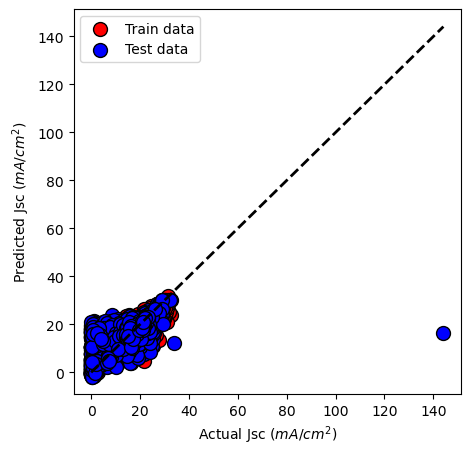

In [21]:
from catboost import CatBoostRegressor


# Convert the data to CatBoost-compatible format
X_train_cat = np.array(X_train)
X_test_cat = np.array(X_test)
y_train_cat = np.array(y_train)
y_test_cat = np.array(y_test)

# Define the model
cb = CatBoostRegressor()

# Define the hyperparameter grid
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.1, 0.3, 0.5],
    'loss_function': ['RMSE', 'MAE']
}

# Define the search object
search = GridSearchCV(cb, param_grid, cv=5, n_jobs=-1)

# Fit the search object to the training data
search.fit(X_train_cat, y_train_cat)

# Print the best parameters
print(f'Best parameters: {search.best_params_}')

# Get the best model
best_cb = search.best_estimator_


model_builder(best_cb, y_train_cat, y_test_cat)

In [23]:
models = [best_rf, best_xgb, best_gbr, best_dt, best_svr, best_br, best_et, best_ridge, best_knr, best_cb] # List of models
model_names = ['Random Forest', 'XGBoost', 'Gradient Boosting', 'Decision Tree', 'Support Vector',
               'Bagging Regressor', 'Extra Trees', 'Ridge Regressor', 'kNR', 'CatBoost'] # List of model names

r2_scores = []
mse_score = []
mae_score = []
rmse_score = []

for model, name in zip(models, model_names):
    if model == best_cb:
        y_pred_train = model.predict(X_train_cat)
        y_pred_test = model.predict(X_test_cat)
    else:
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2 = r2_score(y_test, y_pred_test)
        mse = mean_squared_error(y_test, y_pred_test)
        mae = mean_absolute_error(y_test, y_pred_test)

    r2_scores.append(r2)
    mse_score.append(mse)
    mae_score.append(mae)

    rmse = np.sqrt(mse)
    rmse_score.append(rmse)

    """
    plt.style.use('default')
    plt.figure(figsize=(5,5))
    plt.scatter(y_train, y_pred_train, c='r', label='Train data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.scatter(y_test, y_pred_test, c='b', label='Test data', edgecolors=(0, 0, 0), marker="o", s=100)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Actual El (%)')
    plt.ylabel('Predicted El (%)')
    plt.legend(loc='upper left')

    #plt.legend(loc='upper left')
    plt.savefig(pwd + '/results/figures/'+ name + '.png', dpi=500, bbox_inches="tight")
    plt.close()
    """

In [24]:
df_model_evaluation = pd.DataFrame({
    'Model': model_names,
    'R2': r2_scores,
    'MSE': mse_score,
    'RMSE': rmse_score,
    'MAE': mae_score
}) # evaluation parameters for each model


df_model_evaluation = df_model_evaluation.sort_values(by=['R2'], ascending=False).reset_index(drop=True)
df_model_evaluation.to_csv(pwd + '/Hp_tuned_best_models/Jsc_Model_performance.csv', index=False)
df_model_evaluation # Show evaluation parameters for each model

Model        R2        MSE      RMSE       MAE
0        Extra Trees  0.632466  10.736844  3.276712  1.796681
1      Random Forest  0.631983  10.750970  3.278867  1.796425
2  Bagging Regressor  0.629082  10.835706  3.291763  1.829593
3            XGBoost  0.623212  11.007191  3.317709  1.841406
4  Gradient Boosting  0.617419  11.176416  3.343115  1.862147
5                kNR  0.578282  12.319739  3.509949  1.925578
6           CatBoost  0.578282  12.319739  3.509949  1.925578
7      Decision Tree  0.535624  13.565937  3.683197  2.093745
8     Support Vector  0.445303  16.204496  4.025481  2.386231
9    Ridge Regressor  0.400982  17.499266  4.183212  2.795042

213:	learn: 2.6608089	total: 28s	remaining: 11.3s
214:	learn: 2.6596523	total: 28.2s	remaining: 11.1s
215:	learn: 2.6575905	total: 28.3s	remaining: 11s
216:	learn: 2.6568076	total: 28.4s	remaining: 10.8s
217:	learn: 2.6558231	total: 28.4s	remaining: 10.7s
218:	learn: 2.6528839	total: 28.5s	remaining: 10.5s
219:	learn: 2.6504355	total: 28.6s	remaining: 10.4s
220:	learn: 2.6480795	total: 28.7s	remaining: 10.3s
221:	learn: 2.6467582	total: 28.8s	remaining: 10.1s
222:	learn: 2.6453330	total: 28.9s	remaining: 9.99s
223:	learn: 2.6432306	total: 29.1s	remaining: 9.86s
224:	learn: 2.6414073	total: 29.1s	remaining: 9.71s
225:	learn: 2.6385987	total: 29.2s	remaining: 9.57s
226:	learn: 2.6374239	total: 29.3s	remaining: 9.43s
227:	learn: 2.6359862	total: 29.4s	remaining: 9.3s
228:	learn: 2.6337748	total: 29.6s	remaining: 9.18s
229:	learn: 2.6316365	total: 29.7s	remaining: 9.05s
230:	learn: 2.6305269	total: 29.8s	remaining: 8.89s
231:	learn: 2.6279756	total: 29.9s	remaining: 8.78s
232:	learn: 2.627